In [ ]:
# First to-do : separate the main file into separate texts of selected agencies
import json
import glob
import nltk
import pandas as pd

def collectNewsAgencies(text_):

    list_agencies = []

    for line in text_:
        obj = json.loads(line)
        new_line = obj['author']
        list_agencies.append(new_line['name'])

    return list(set(list_agencies))

def extractByAgency(text_, agency, agency_name, fo):

    for line in text_:
        obj = json.loads(line)
        new_line = obj['author']
        if agency in new_line['name'] or agency in obj['body']:
            fo.write(line + '\n')

def createSeparateNews(news_selected):

    fo_list = []

    for news_ in news_selected:
        
        news_name = getNewsName(news_)
        fo = open('corpus/agency_' + news_name + '.jsonl', 'w')

        fo_list.append(fo)
    
    return fo_list

def getNewsName(news_):
    if ' ' in news_:
        return news_.replace(' ', '_')
    else:
        return news_

def closeNewsWriting(fo_list):

    for fo in fo_list:
        fo.close()
#########################################################################
# ------------------------- main part here -----------------------------

# First, can I get the number of news articles per agency and make my agency selections based on that instead?
#news_selected = ['Fox News', 'Reuters', 'CNN', 'NBC', 'CBS', 'NY Times', 'Forbes', 'New York Post', 'Huffpost']

#fo_list = createSeparateNews(news_selected)

# filename
#for i in range(1,24):
#    json_name = 'corpus/aylien_covid_news_data.jsonl'

    # read the file
#    fo_text = open(json_name, 'r').read().split('\n')[:-1]

#    for news_ in news_selected:
#        news_name = getNewsName(news_)

        # get the correct fo
#        curr_fo = fo_list[news_selected.index(news_)]    
#        extractByAgency(fo_text, news_, news_name, curr_fo)

#    del fo_text

#closeNewsWriting(fo_list)

In [ ]:
import pandas as pd
import glob

files = glob.glob("corpus/x*")

#json_name = 'corpus/aylien_covid_news_data.jsonl'

for curr_file in files:

    # read the file
    fo_text = open(curr_file, 'r').read().split('\n')[:-1]
    
    print(fo_text)
    #export_csv = df.to_csv (r'corpus/data_' + str(files.index(curr_file)) + '.csv', index = None, header=True)

In [2]:
import json
import csv

infile = open("corpus/aylien_covid_news_data.jsonl","r")
#outfile = open ("myfile.csv","w")

#writer = csv.writer(outfile)

for row in infile:
    data = json.loads(row)
    #writer.writerow(data)
    
    print(data)
    
    break

{'author': {'avatar_url': None, 'id': 973106, 'name': 'Gavin Evans'}, 'body': 'On Sunday, British Prime Minister Boris Johnson was hospitalized "for tests" because of "persistent" COVID-19 symptoms\xa010 days\xa0after he tested positive, CNN reports.\xa0\nJohnson reportedly went to the unspecified London hospital after his doctor advised him to do so. A press release from his office called the\xa0move\xa0"precautionary."\xa0\nOn March 26, Johnson revealed he had tested positive and that he had been dealing with symptoms since that date. Britain had gone into lockdown two days earlier.\nSince the 26th, Johnson has been quarantined at his Downing Street residence. He is the first known world leader to have contracted the virus.\xa0\nRoughly a month ago, right around the time the U.K. started dealing with an outbreak, Johnson garnered media coverage for saying he\'d shook hands with coronavirus patients during a hospital visit. \xa0\n"I shook hands with everybody, you will be pleased to k

In [22]:
import json
import pandas as pd
import time

infile = open("corpus/aylien_covid_news_data.jsonl","r")

list_dates = []
list_str = []

df = pd.DataFrame({"date": pd.Series([], dtype='str'), "text": pd.Series([], dtype='str')})

count = 0
start = time.time()
for row in infile:
    data = json.loads(row)
    
    if data["body"] not in list(df.text):
        #list_sentiments.append(data["sentiment"]["body"]["polarity"])
        #list_sentiment_scores.append(data["sentiment"]["body"]["score"])
        
        if (count % 10000) == 0: # reset
            end = time.time()
            print(end - start)
            data_df = pd.DataFrame({"date": list_dates, "text":list_str})
            df = df.append(data_df)
            list_dates = []
            list_str = []
            
            print(count)
            start = time.time()
            
        else:
            list_dates.append(data["published_at"])
            list_str.append(data["body"])
        
        if (count % 100000) == 0: # reset
            df.to_csv("corpus/all_news"+str(count)+".csv", index=False)
            
            df = pd.DataFrame({"date": pd.Series([], dtype='str'), "text": pd.Series([], dtype='str')})
            
        count += 1

data_df = pd.DataFrame({"date": list_dates, "text":list_str})
df = df.append(data_df)

df.to_csv("corpus/all_news_last.csv", index=False)

# max count = 1670000

0.001711130142211914
0
1.305253028869629
10000
7.851441860198975
20000
15.700185060501099
30000
25.353776693344116
40000
35.79223704338074
50000
46.874435901641846
60000
59.293622970581055
70000
75.99733400344849
80000
99.86830306053162
90000
120.79626893997192
100000
5.5020787715911865
110000
8.160270690917969
120000
16.221217155456543
130000
25.922789812088013
140000
36.501795053482056
150000
47.09213900566101
160000
60.11217403411865
170000
77.03063488006592
180000
98.81447100639343
190000
118.31171727180481
200000
5.513536214828491
210000
7.948362112045288
220000
15.756590843200684
230000
25.697227954864502
240000
35.98374605178833
250000
46.8761031627655
260000
59.30246090888977
270000
76.73354196548462
280000
97.1536557674408
290000
118.83781695365906
300000
5.357481956481934
310000
7.90982723236084
320000
15.804763078689575
330000
25.538466215133667
340000
40.00885891914368
350000
46.66524004936218
360000
59.40770983695984
370000
74.87215828895569
380000
94.95864391326904
390000

In [23]:
import glob
import pandas as pd

list_files = glob.glob("corpus/all_news*.csv")
df = pd.DataFrame({"date": pd.Series([], dtype='str'), "text": pd.Series([], dtype='str')})

for curr_file in list_files:
    
    curr_df = pd.read_csv(curr_file)
    df = df.append(curr_df)
    
df.to_csv("corpus/all_news.csv", index=False)

In [38]:
from unidecode import unidecode
def remove_non_ascii(text):
    return unidecode(text)

In [31]:
import gc
gc.collect()

155

In [39]:
import pandas as pd

# lowercase conversion
# tokenize by sentences - each sentence to be separated by comma
# remove punctuations here except for '
# join the sentences by , for the csv file
def preprocessText(text_):

    curr_text_ = text_.lower()

    table = str.maketrans(' ', ' ', '!"#$%&()*+,-/:;<=>?@[\]^_`{|}~\n’')
    curr_text_ = curr_text_.translate(table)

    curr_text_ = curr_text_.replace("´", "'")
    curr_text_ = curr_text_.replace(".", " ")
    curr_text_ = curr_text_.replace("  ", " ")
    return curr_text_

# remove the hour info, we only need the date
def processDate(dates_):

    return dates_.split(' ')[0]


df = pd.read_csv("corpus/all_news.csv")

#for df in reader:
rows_to_remove = []
for i_row in range(len(df)):
    #print(i_row)

    if not pd.isna(df["text"][i_row]):
        if "covid" in df["text"][i_row] or "coronavirus" in df["text"][i_row]:
            df.at[i_row,"date"] = processDate(df["date"][i_row])
            df.at[i_row,"text"] = remove_non_ascii(preprocessText(df["text"][i_row]))
        else:
            rows_to_remove.append(i_row)
    else:
        rows_to_remove.append(i_row)

df.drop(df.index[rows_to_remove], inplace=True)
df.to_csv("corpus/all_news_clean.csv", index=False)

In [ ]:
#----------------------------------------------------

In [2]:
# get the word cloud
import pandas as pd
df = pd.read_csv("corpus/all_news_clean.csv",lineterminator='\n')
print(df.head)

<bound method NDFrame.head of                date                                               text
0        2020-06-20  milan june 20 reuters inter milan coach antoni...
1        2020-06-20  president cyril ramaphosa has outlined the nex...
2        2020-06-20  prince william and his wife kate middleton  ex...
3        2020-06-20  bbc presenter dan walker took to twitter to is...
4        2020-06-20  twentytwo people have succumbed to covid19 and...
...             ...                                                ...
1231551  2020-02-04  radio free asia rfa has tweeted a disturbing v...
1231552  2020-02-04  feb 4 reuters the u s department of health and...
1231553  2020-02-04  gold prices slipped rs 211 to rs 40606 per 10 ...
1231554  2020-02-04   canadian dollar rises 0 1 against the greenba...
1231555  2020-02-04  canadians awaiting a governmentchartered fligh...

[1231556 rows x 2 columns]>


In [2]:
# Creating the Word Cloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
wc = WordCloud(width = 1200, height = 800, background_color ='white', stopwords = STOPWORDS, min_font_size = 10)
counts_all = Counter()

In [4]:
for i_row in range(len(df)):
    counts_line = wc.process_text(df.text[i_row])
    counts_all.update(counts_line)

In [5]:
# Displaying the WordCloud                    
import matplotlib.pyplot as plt

wc.generate_from_frequencies(counts_all)
wc.to_file('bigcloud.pdf')

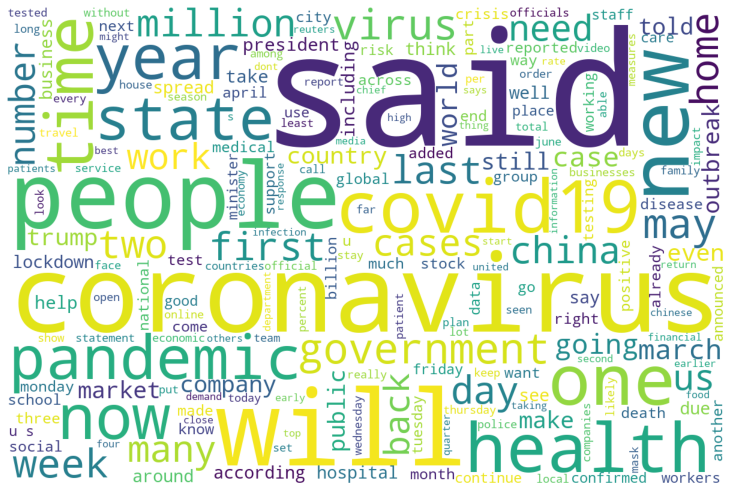

In [6]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [12]:
selected_words = ["election", "economy", "economic", "financial", "racial", "minority", "minorities", 
                  "death", "lockdown"]

list_days = list(set(df.date))

vals_dict = {}
vals_dict["election"] = [0]*len(list_days)
vals_dict["economy"] = [0]*len(list_days)
vals_dict["racial"] = [0]*len(list_days)
vals_dict["death"] = [0]*len(list_days)
vals_dict["lockdown"] = [0]*len(list_days)

for i_row in range(len(df)):
    
    curr_text = df.text[i_row]
    curr_date = df.date[i_row]
    
    if "election" in curr_text:  
        vals_dict["election"][list_days.index(curr_date)] += 1.0
        
    if "economy" in curr_text or "economic" in curr_text or "financial" in curr_text:
        vals_dict["economy"][list_days.index(curr_date)] += 1.0
    
    if "racial" in curr_text or "minorit" in curr_text:
        vals_dict["racial"][list_days.index(curr_date)] += 1.0
    
    if "death" in curr_text:
        vals_dict["death"][list_days.index(curr_date)] += 1.0
    
    if "lockdown" in curr_text:
        vals_dict["lockdown"][list_days.index(curr_date)] += 1.0

In [31]:
#print(sorted(list_days))


list_months = ["2019-11", "2019-12", "2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07"]

list_election = [0]*len(list_months)
list_economy = [0]*len(list_months)
list_racial = [0]*len(list_months)
list_death = [0]*len(list_months)
list_lockdown = [0]*len(list_months)

for curr_d in list_days:
    cl = curr_d.split("-")[0:2]
    
    list_election[list_months.index("-".join(cl))] += vals_dict["election"][list_days.index(curr_d)]
    list_economy[list_months.index("-".join(cl))] += vals_dict["economy"][list_days.index(curr_d)]
    list_racial[list_months.index("-".join(cl))] += vals_dict["racial"][list_days.index(curr_d)]
    list_death[list_months.index("-".join(cl))] += vals_dict["death"][list_days.index(curr_d)]
    list_lockdown[list_months.index("-".join(cl))] += vals_dict["lockdown"][list_days.index(curr_d)]

In [32]:
df_total = pd.DataFrame({"Date":list_months+list_months+list_months+list_months+list_months, 
                        "Item":["election"]*len(list_months)+["economy"]*len(list_months)+["racial"]*len(list_months)+["death"]*len(list_months)+["lockdown"]*len(list_months),
                        "Count":list_election+list_economy+list_racial+list_death+list_lockdown})


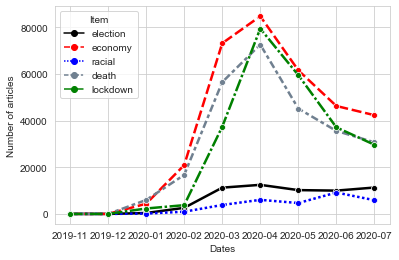

In [33]:
import seaborn as sns

# Initialize Figure and Axes object

sns.set_style("whitegrid")
splot = sns.lineplot(data=df_total, x='Date', y='Count', hue='Item', style='Item', 
                     markers=["o", "o", "o", "o", "o"], palette=['black', 'red', 'blue', 'slategray', 'green'],
                     linewidth=2.5)

plt.xlabel("Dates")
plt.ylabel("Number of articles")
#plt.title("Performance change in 30-days set with feature selection")

#plt.show()
plt.savefig('longitudinal_words.pdf')

In [2]:
# get the word cloud
import pandas as pd
df = pd.read_csv("corpus/all_news_clean.csv",lineterminator='\n')
print(df.head)

<bound method NDFrame.head of                date                                               text
0        2020-06-20  milan june 20 reuters inter milan coach antoni...
1        2020-06-20  president cyril ramaphosa has outlined the nex...
2        2020-06-20  prince william and his wife kate middleton  ex...
3        2020-06-20  bbc presenter dan walker took to twitter to is...
4        2020-06-20  twentytwo people have succumbed to covid19 and...
...             ...                                                ...
1231551  2020-02-04  radio free asia rfa has tweeted a disturbing v...
1231552  2020-02-04  feb 4 reuters the u s department of health and...
1231553  2020-02-04  gold prices slipped rs 211 to rs 40606 per 10 ...
1231554  2020-02-04   canadian dollar rises 0 1 against the greenba...
1231555  2020-02-04  canadians awaiting a governmentchartered fligh...

[1231556 rows x 2 columns]>


In [22]:
#------------- Topic modeling -------------
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
print(len(stop))
# and not word.isnumeric
df["textnostop"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop and len(word)>1]))

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=100)#token_pattern=r"(?u)\b\w+\b", stop_words=None, min_df=, analyzer='word')
dt_mat = cv.fit_transform(df.textnostop)

318


In [23]:
print(cv.get_feature_names())

['00', '000', '0000', '0001', '0005', '001', '002', '003', '0030', '005', '005380', '005930', '006', '007', '007960018860', '008', '00pm', '00s', '01', '010', '0100', '011', '0110', '012', '0120', '013', '0130', '014', '0140', '0145', '015', '0150', '017', '01st', '02', '020', '0200', '0207', '02077824220', '021', '0210', '022', '0220', '0230', '0240', '025', '0250', '0293', '02nd', '03', '030', '0300', '032', '0320', '0330', '0345', '035', '0350', '036', '038', '03rd', '04', '040', '0400', '0410', '042', '0420', '043', '0430', '044', '045', '046', '048', '04th', '05', '050', '0500', '051', '052', '0520', '053', '0530', '054', '0540', '055', '0550', '058', '059', '05th', '06', '0600', '0620', '0630', '0640', '0650', '06th', '07', '0700', '0710', '0720', '0730', '07423720250', '0745', '075', '0750', '07810', '07th', '08', '080', '0800', '0808', '0810', '0815', '0820', '0830', '0840', '0845', '0850', '08th', '09', '0900', '0910', '0920', '0930', '0940', '0945', '0950', '09th', '0b', '0m'

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dt_mat)

Top 10 words for topic #0:
['2020', 'stock', 'quarter', 'company', 'coronavirus', 'billion', 'year', 'market', 'million', 'said']


Top 10 words for topic #1:
['going', 'season', 'new', 'home', 'people', 'like', 'just', 'time', 'coronavirus', 'said']


Top 10 words for topic #2:
['it', 're', 'new', 'work', 'time', 'just', 'said', 'we', 'like', 'people']


Top 10 words for topic #3:
['china', 'new', 'government', 'virus', 'health', 'covid19', 'cases', 'people', 'coronavirus', 'said']


Top 10 words for topic #4:
['pandemic', 'health', 'states', 'people', 'new', 'state', 'president', 'trump', 'coronavirus', 'said']




In [26]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-21:]])
    print('\n')

Top 10 words for topic #0:
['demand', 'new', 'oil', 'financial', 'hedge', 'fund', 'global', 'economic', 'growth', 'china', 'stocks', '2020', 'stock', 'quarter', 'company', 'coronavirus', 'billion', 'year', 'market', 'million', 'said']


Top 10 words for topic #1:
['years', 'know', 'told', 'year', 'players', 'league', 'family', 'day', 'world', 'pandemic', 'it', 'going', 'season', 'new', 'home', 'people', 'like', 'just', 'time', 'coronavirus', 'said']


Top 10 words for topic #2:
['use', 'coronavirus', 'pandemic', 'covid19', 'make', 'company', 'going', 'help', 'think', 'business', 'need', 'it', 're', 'new', 'work', 'time', 'just', 'said', 'we', 'like', 'people']


Top 10 words for topic #3:
['lockdown', 'reported', 'disease', 'positive', 'spread', 'hospital', 'minister', 'outbreak', 'number', 'country', 'patients', 'china', 'new', 'government', 'virus', 'health', 'covid19', 'cases', 'people', 'coronavirus', 'said']


Top 10 words for topic #4:
['told', 'federal', 'white', 'week', 'offici

In [27]:
LDA2 = LatentDirichletAllocation(n_components=10, random_state=42)
LDA2.fit(dt_mat)

LatentDirichletAllocation(random_state=42)

In [28]:
for i,topic in enumerate(LDA2.components_):
    print(f'Top 10 words for topic #{i}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-21:]])
    print('\n')

Top 10 words for topic #0:
['price', 'earnings', 'shares', 'revenue', 'capital', 'investment', '2019', 'sales', '2020', 'year', 'investors', 'quarter', 'billion', 'funds', 'fund', 'stocks', 'hedge', 'million', 'stock', 'company', 'market']


Top 10 words for topic #1:
['premier', 'training', 'teams', '2020', 'pandemic', 'fans', 'year', 'time', 'play', 'club', 'world', 'sports', 'game', 'football', 'team', 'games', 'coronavirus', 'said', 'players', 'league', 'season']


Top 10 words for topic #2:
['growth', 'work', 'really', 'good', 'that', 've', 'vaccine', 'company', 'quarter', 'time', 'million', 'new', 'going', 'like', 'it', 'just', 'year', 'think', 'business', 're', 'we']


Top 10 words for topic #3:
['pandemic', 'cent', 'million', 'outbreak', 'world', 'new', 'markets', 'demand', 'reuters', 'prices', 'market', 'chinese', 'bank', 'economy', 'economic', 'year', 'global', 'oil', 'coronavirus', 'china', 'said']


Top 10 words for topic #4:
['work', 'airlines', 'open', 'lockdown', 'closed

In [31]:
# ----------- Lexical Network Analysis on economy ------------
from unidecode import unidecode
def remove_non_ascii(text):
    return unidecode(text)

# lowercase conversion
# tokenize by sentences - each sentence to be separated by comma
# remove punctuations here except for '
# join the sentences by , for the csv file
def preprocessTexts(text_):

    curr_text_ = text_.lower()

    table = str.maketrans(' ', ' ', '!"#$%&()*+,-/:;<=>?@[\]^_`{|}~\n’')
    curr_text_ = curr_text_.translate(table)

    curr_text_ = curr_text_.replace("´", "'")
    #curr_text_ = curr_text_.replace(".", " ")
    curr_text_ = curr_text_.replace("  ", " ")
    return curr_text_

# Need the big df that has the end of sentence marks intact
#del df # release memory dude
bigdf = pd.read_csv("corpus/all_news.csv")

#for df in reader:
rows_to_remove = []
for i_row in range(len(bigdf)):
    #print(i_row)

    if not pd.isna(bigdf["text"][i_row]):
        if ("covid" in bigdf["text"][i_row].lower() or 
            "coronavirus" in bigdf["text"][i_row].lower()) and ("economy" in bigdf["text"][i_row].lower() or 
                                                                "economic" in bigdf["text"][i_row].lower() or 
                                                                "financial" in bigdf["text"][i_row].lower()):
            #bigdf.at[i_row,"date"] = processDate(bigdf["date"][i_row])
            bigdf.at[i_row,"text"] = remove_non_ascii(preprocessTexts(bigdf["text"][i_row]))
        else:
            rows_to_remove.append(i_row)
    else:
        rows_to_remove.append(i_row)
        
# delete the selected rows
new_df = bigdf.drop(bigdf.index[rows_to_remove], inplace=False)
new_df.to_csv("corpus/economy_news.csv", index=False)

del bigdf # release memory dude

In [33]:
# collect the list of words from the new df - that'll potentially become the network nodes
# after: eliminating infrequent words, numbers, stopwords including "said" and perhaps some other useless words
# compute PMI values between word pairs that co-occur in the same sentences
from sklearn.feature_extraction import text
from collections import Counter

stop = text.ENGLISH_STOP_WORDS # is this a list? if so, add some stuff
#stop.append("said", "it", "we", "they", "their", "told")

print(len(new_df))

full_text = " ".join(list(new_df["text"]))
full_text = full_text.replace(".", " ")
full_text = full_text.replace("  ", " ")

431620


In [1]:
import pandas as pd
from sklearn.feature_extraction import text
from collections import Counter
import numpy as np

stop = text.ENGLISH_STOP_WORDS # is this a list? if so, add some stuff

new_df = pd.read_csv("corpus/economy_news.csv",lineterminator='\n')
# eliminate rows that have dates earlier than 2020-02

list_indices1 = np.where(new_df["date"] < "2020-05-01")[0]
list_indices2 = np.where(new_df["date"] >= "2020-04-01")[0]

list_indices = list(set(list_indices1) & set(list_indices2))


In [2]:
import random
print(len(list_indices))

new_df = new_df.drop(new_df.index[list_indices], inplace=False)

new_df = new_df.reset_index(drop=True)

list_remove = random.sample(range(len(new_df)), 275318)

new_df = new_df.drop(new_df.index[list_remove], inplace=False)

106302


In [3]:
print(len(new_df))

50000


In [4]:
full_text = " ".join(list(new_df["text"]))


In [5]:
#print(len(full_text.split("."))) # 18122032 too many sentences to loop over. 
# With this speed, it will take fucking months to go over all the data and create a fucking network from it
# Just select the month where there was a peak

In [6]:
full_text = full_text.replace(".", " ")
full_text = full_text.replace("  ", " ")

dict_words = Counter(full_text.split(" "))

print(len(dict_words.keys()))

del full_text

438317


In [7]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

list_words = []
list_ignore = ["i", "said", "this", "that", "we", "--", "it's", "we're", "re", "thing", "things", '"a',
              'us"', 'thats', '"were', 'theyre', "we've", 'www', '"as', 'et', 'al', '"you', '"ive',
              '"do', 'da', 'lat', "'doing", '"us', '"this', '"by', '"theyve', '\ti', "fair--", '*>', "we'd", "we'll"]
for curr_word in dict_words.keys():
    if dict_words[curr_word] >= 500 and curr_word not in stop and curr_word not in list_ignore and len(curr_word)>1 and not curr_word.isnumeric() and '"' not in curr_word and "\t" not in curr_word and '(c)' not in curr_word:
        
        list_words.append(lemmatizer.lemmatize(curr_word))
list_words = list(set(list_words))
print(len(list_words))

4556


In [8]:
#new_df = new_df.reset_index(drop=True)
full_text = " ".join(list(new_df["text"]))
del new_df

In [25]:
from itertools import combinations


list_singles_count = [0]*len(list_words)
list_pairs = []
list_pair_count = []
num_sent = 0
list_sentences = full_text.split(".")
print("here")
#del full_text

collected_df = pd.DataFrame({"pairs":list_pairs, "counts":list_pair_count})
for curr_sent in list_sentences: 
    
    if num_sent % 1000 == 0:
        print(num_sent)
        #print(len(list_pairs))
        
        tmp_df = pd.DataFrame({"pairs":list_pairs, "counts":list_pair_count})
        collected_df = collected_df.append(tmp_df)
        
        list_pairs = []
        list_pair_count = []
        
        del tmp_df

    if len(curr_sent.split(" ")) > 4:
        curr_sent = lemmatizer.lemmatize(curr_sent)
        num_sent += 1.0
        list_words_curr = curr_sent.split(" ")
        matching_words = list(set(list_words_curr) & set(list_words))
        if len(matching_words) > 1:
            all_combs = combinations(matching_words, 2)
            for curr_comb in all_combs:

                curr_word1 = curr_comb[0]
                list_singles_count[list_words.index(curr_word1)] += 1.0

                curr_word2 = curr_comb[1]

                if (curr_word1, curr_word2) not in list_pairs and (curr_word2, curr_word1) not in list_pairs:
                    list_pairs.append((curr_word1, curr_word2))
                    list_pair_count.append(1.0)
                else:
                    if (curr_word1, curr_word2) in list_pairs:
                        list_pair_count[list_pairs.index((curr_word1, curr_word2))] += 1.0
                    else:
                        list_pair_count[list_pairs.index((curr_word2, curr_word1))] += 1.0
                        
tmp_df = pd.DataFrame({"pairs":list_pairs, "counts":list_pair_count})
collected_df = collected_df.append(tmp_df)

collected_df.to_csv("node_pairs.csv",index=False)

here
0
1000.0
2000.0
3000.0
4000.0
4000.0
5000.0
6000.0
7000.0
8000.0
9000.0
10000.0
11000.0
12000.0
13000.0
14000.0
15000.0
16000.0
17000.0
18000.0
19000.0
20000.0
21000.0
22000.0
23000.0
24000.0
24000.0
24000.0
25000.0
26000.0
27000.0
28000.0
29000.0
30000.0
31000.0
32000.0
33000.0
34000.0
35000.0
36000.0
37000.0
38000.0
39000.0
39000.0
39000.0
40000.0
41000.0
42000.0
43000.0
44000.0
45000.0
46000.0
47000.0
48000.0
49000.0
50000.0
51000.0
52000.0
53000.0
54000.0
55000.0
56000.0
57000.0
58000.0
59000.0
60000.0
61000.0
62000.0
63000.0
64000.0
65000.0
66000.0
67000.0
68000.0
69000.0
70000.0
71000.0
72000.0
73000.0
74000.0
75000.0
76000.0
77000.0
77000.0
78000.0
78000.0
78000.0
79000.0
80000.0
81000.0
82000.0
82000.0
83000.0
84000.0
85000.0
86000.0
87000.0
88000.0
88000.0
89000.0
89000.0
89000.0
90000.0
91000.0
92000.0
93000.0
94000.0
95000.0
96000.0
97000.0
98000.0
99000.0
99000.0
99000.0
100000.0
101000.0
102000.0
103000.0
104000.0
105000.0
106000.0
107000.0
108000.0
109000.0
110000.0


767000.0
768000.0
769000.0
770000.0
771000.0
772000.0
773000.0
774000.0
775000.0
776000.0
777000.0
777000.0
778000.0
778000.0
779000.0
780000.0
780000.0
780000.0
781000.0
782000.0
783000.0
784000.0
785000.0
786000.0
787000.0
788000.0
789000.0
790000.0
791000.0
791000.0
791000.0
792000.0
793000.0
794000.0
795000.0
796000.0
797000.0
798000.0
799000.0
800000.0
801000.0
802000.0
802000.0
803000.0
804000.0
805000.0
806000.0
807000.0
808000.0
809000.0
810000.0
811000.0
811000.0
811000.0
812000.0
813000.0
814000.0
815000.0
816000.0
817000.0
818000.0
819000.0
819000.0
819000.0
819000.0
820000.0
821000.0
822000.0
823000.0
824000.0
825000.0
826000.0
827000.0
828000.0
829000.0
830000.0
831000.0
832000.0
833000.0
834000.0
835000.0
836000.0
837000.0
838000.0
839000.0
840000.0
840000.0
841000.0
842000.0
843000.0
844000.0
845000.0
846000.0
847000.0
848000.0
849000.0
850000.0
851000.0
852000.0
853000.0
853000.0
854000.0
855000.0
856000.0
856000.0
857000.0
858000.0
859000.0
860000.0
861000.0
862000.0
8

1504000.0
1505000.0
1506000.0
1507000.0
1508000.0
1509000.0
1510000.0
1511000.0
1512000.0
1513000.0
1514000.0
1515000.0
1515000.0
1516000.0
1517000.0
1518000.0
1519000.0
1520000.0
1521000.0
1522000.0
1523000.0
1524000.0
1525000.0
1526000.0
1527000.0
1528000.0
1529000.0
1530000.0
1531000.0
1532000.0
1533000.0
1533000.0
1534000.0
1535000.0
1536000.0
1537000.0
1538000.0
1539000.0
1540000.0
1541000.0
1542000.0
1543000.0
1544000.0
1545000.0
1546000.0
1547000.0
1548000.0
1549000.0
1550000.0
1550000.0
1551000.0
1552000.0
1553000.0
1554000.0
1555000.0
1556000.0
1557000.0
1558000.0
1559000.0
1560000.0
1561000.0
1562000.0
1563000.0
1564000.0
1565000.0
1566000.0
1566000.0
1566000.0
1567000.0
1568000.0
1569000.0
1570000.0
1571000.0
1571000.0
1572000.0
1573000.0
1574000.0
1575000.0
1576000.0
1576000.0
1576000.0
1577000.0
1578000.0
1579000.0
1580000.0
1581000.0
1582000.0
1583000.0
1584000.0
1584000.0
1585000.0
1586000.0
1587000.0
1588000.0
1589000.0
1590000.0
1591000.0
1592000.0
1593000.0
1594000.0


In [27]:
collected_df_new = pd.read_csv("node_pairs.csv")

print(collected_df_new.head)

<bound method NDFrame.head of                                 pairs  counts
0                  ('loss', 'punjab')     1.0
1                    ('loss', 'bank')     1.0
2                ('loss', 'national')     1.0
3              ('loss', 'stateowned')     1.0
4                     ('loss', 'net')     1.0
...                               ...     ...
57288398              ('app', 'need')     1.0
57288399       ('app', 'independent')     1.0
57288400         ('creation', 'need')     1.0
57288401  ('creation', 'independent')     1.0
57288402      ('need', 'independent')     1.0

[57288403 rows x 2 columns]>


In [48]:
import math
#import time

collected_df_new = collected_df_new[collected_df_new["counts"]>4]

collected_df_new.reset_index(drop=True, inplace=True)
print(collected_df_new.head)
nodes1_list = []
nodes2_list = []
new_pmis = []

# remember to compute the pmi's
for curr_tub in list(collected_df_new["pairs"]):
    #start_time = time.time()
    
    list_stuff_tmp = tuple(x[1:-1] for x in curr_tub.strip('()').split(', '))
    node1 = list_stuff_tmp[0]
    node2 = list_stuff_tmp[1]
    #print(node1 + " " + node2)
    #print(list(collected_df_new["pairs"]).index(curr_tub))
    #print("--- %s seconds ---" % (time.time() - start_time))
    #start_time = time.time()
    #print(collected_df_new["counts"][0]) #list(collected_df_new["pairs"]).index(curr_tub)])
    val_ij = collected_df_new["counts"][list(collected_df_new["pairs"]).index(curr_tub)]/num_sent
    pij = math.log(val_ij)
    pi = list_singles_count[list_words.index(node1)]/num_sent
    pj = list_singles_count[list_words.index(node2)]/num_sent
    pi_pj = pi * pj
    lpipj = math.log(pi_pj)
    pmi_curr = (pij-lpipj)/pij
    
    if pmi_curr >= 0.5:
        nodes1_list.append(node1)
        nodes2_list.append(node2)
        new_pmis.append(pmi_curr)
    #pmi_list.append(pmi_curr)
    
    #print(pmi_curr)
    #print("--- %s seconds ---" % (time.time() - start_time))
    #break
    
    print(list(collected_df_new["pairs"]).index(curr_tub))

<bound method NDFrame.head of                                 pairs  counts
0               ('museum', 'african')    13.0
1              ('museum', 'american')    11.0
2             ('african', 'american')    19.0
3       ('international', 'american')     5.0
4        ('international', 'african')     5.0
...                               ...     ...
247936            ('global', 'world')     6.0
247937          ('economy', 'impact')     6.0
247938             ('killed', 'sars')     5.0
247939            ('stock', 'nasdaq')     5.0
247940     ('chinese', 'coronavirus')     5.0

[247941 rows x 2 columns]>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
29
56
41
58
42
60
61
62
27
32
65
66
67
68
13
39
28
72
73
74
75
12
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
11
116
117
118
119
120
121
122
123
124
1

1793
1794
1795
1796
1797
1798
1799
82
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1195
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
148
87
1868
1869
1870
1871
1872
1873
42
11
1876
1495
1878
1500
1880
21
1882
31
1884
256
1378
29
212
720
1353
87
27
1893
1894
1895
1480
1897
1898
1065
1900
1901
1902
1903
1904
1905
1282
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
82
42
103
1920
1921
1922
1923
1924
1925
1926
1927
1846
1929
1930
1931
1932
1843
1934
1935
1936
1937
1938
1939
1818
1941
1942
1943
1944
116
1946
1947
1948
1949
1950
1951
1952
1953
1828
1955
1956
1957
1702
1801
1960
1961
1962
1963
1964
62
1966
1967
1968
1969
1970
1971
1972
1622
1974
1975
1976
87
1978
1979
1980
1630
1636
1983
1984
1985
1986
1987
1988
1989
1990
1991
1793
1993
1994
1995
1996
1195
1842
19

3522
3523
3524
3525
3526
3527
3528
2621
3530
3531
3532
3533
3534
3535
1195
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
1995
3555
589
3557
3558
3559
3560
3561
3562
2002
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
1842
3589
3590
2212
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
1941
3606
3607
3608
3609
3610
287
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
1828
3657
3658
3659
3660
3661
3662
3663
1922
3665
3666
3667
3668
3669
3670
3671
3672
3673
597
3675
3676
3677
3678
3679
3680
21
3682
3683
3234
29
3686
87
3688
1907
3690
3691
3692
2138
3694
3695
3696
3697
3698
3699
3700
3701
3702
1035
3704
1224
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
549
3721
3722
3723


5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
757
5262
1228
1282
2212
473
2926
973
5269
5270
5271
5272
28
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5116
1801
5297
5298
5299
5300
5301
1756
941
998
5305
1855
5307
29
5309
87
5311
2062
1126
5314
903
5316
104
5031
473
5320
2324
5322
22
42
78
120
5327
1050
5329
1489
756
5332
5333
39
2257
717
923
5338
5339
3733
5341
5342
5343
5344
65
5346
5347
950
108
5350
21
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
280
2758
1780
1017
1048
5382
2101
5384
5385
5386
29
39
1410
2374
2613
1378
58
5394
5395
330
61
2929
4375
5400
5401
1920
5403
5404
5405
5406
5407
1244
5409
997
56
935
466
4952
42
5416
923
5418
353
4111
3728
333
716
1048
1076
5426
5427
5428
27
3794
28
5432
5433
31
5435
155
5437
5438
5439
5440
5441
5442
334
5444
5445
5446
5447
5448
5449
5450
5451
1005
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5

6952
4764
3133
548
6956
3072
3076
6206
6960
709
2217
3155
3156
3063
1558
3065
3066
3067
3068
3069
3073
3074
3075
5859
3053
3122
6077
3049
3094
6226
6982
87
107
6985
3012
3120
6988
5925
3123
3124
3125
3126
5933
3127
3128
3129
1560
3098
3132
3104
5779
3135
6020
6023
3141
3143
3145
6064
3146
3147
3148
6229
707
3052
6071
1553
1554
6085
1555
6230
6233
6234
3176
4225
4991
3151
3041
3167
3168
3154
3152
7033
3153
7035
7036
3158
3159
6081
5800
3060
6188
3172
7044
645
7046
7047
4255
3160
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
3086
3087
3118
7063
126
7065
2177
7067
2827
7069
7070
7071
7072
7073
923
29
58
4054
2770
21
7080
7081
5730
720
7084
7085
7086
324
325
7089
7090
7091
578
7093
29
2559
7096
87
405
7099
1215
7101
7102
7103
2564
1472
2003
1050
7108
989
7110
4271
82
42
103
7115
106
1497
7118
168
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
2284
7142
330
923
4816
7146
7147
3503
7149
7150
1410
7152
4054
7154
7155
29
31
4216
87


8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
5716
8673
8674
8675
8676
181
8678
8679
8680
8681
168
96
119
8685
8686
8687
947
3328
232
8691
8692
8693
220
8695
25
8697
8698
8699
8700
8701
1353
29
8704
958
74
155
21
8709
8710
8711
8712
8713
250
107
108
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
3721
1062
8730
8731
8732
8733
8734
967
75
2596
97
100
8740
964
8742
8743
29
108
939
1164
1497
2011
466
212
1489
74
208
75
8756
65
155
168
27
8761
938
8148
126
1264
8766
8767
83
2062
944
2317
85
96
1369
8775
545
56
3214
87
2685
8781
8782
8783
551
6939
8786
8787
2166
8789
42
1220
2045
1353
1512
93
298
8797
405
1447
716
8801
8802
8803
8371
568
8806
3178
8808
903
417
8811
8812
8813
8814
8815
8816
8817
8818
8819
106
128
8366
1410
8824
8825
8826
8827
8828
8829
5655
8831
948
8399
1032
8835
8836
8837
343
8839
21
1353
29
168
575
4464
1482
42
8848
8849
8850
212
2724
5259
8854
1755
1472
8857
8858
8859
8860
6649
1761
8863
8864
8865
6288
87
8868
8869
8870
147
8872
716
8874
8875
8876
548
8878
887

10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
29
1369
13
10331
4125
10333
10334
10335
10336
1353
10338
1209
10340
10341
10342
10343
10344
10345
716
5440
87
1365
1410
10351
3970
417
473
19
10356
10357
10358
134
5667
93
9604
1309
112
923
10366
10367
2315
3433
3434
1902
10372
10373
10374
3436
10376
4020
4021
10379
10380
10381
10382
3798
10384
10385
10386
1355
10388
10389
10390
10391
998
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
2460
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
7147
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
86
10453
10454
10455
21
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
1413
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
1903
10488
104

11826
11827
9629
6442
11830
6447
9644
6440
11834
11835
9646
11837
9630
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11843
11808
9633
6445
9635
6439
6440
11896
11897
6443
11849
11848
11850
11822
689
11823
11824
11842
11826
11827
9629
9630
6442
6434
6435
11830
11854
6438
11806
11855
11856
11920
11789
11819
11220
11790
11820
11788
11791
11744
11716
11872
589
692
11858
11934
11801
11880
594
11860
11939
11803
11941
11942
11943
11944
11945
11946
11947
11948
11875
11876
11951
11952
11953
11954
6444
11861
9638
7302
9646
11862
6441
11815
1497
1045
126
29
168
87
11969
27
11971
4271
42
4247
11975
1050
21
1702
11979
11980
11981
11982
11983
11984
11985
11986
11987
128
575
417
11991
21
11993
11994
1922
4764
4645
11998
10753
12000
12001
29
280
1150
4

13327
13328
13329
13330
13331
13332
8124
13334
13335
392
157
31
405
341
5599
13342
1368
707
13345
1558
1555
5025
5805
709
13351
287
3798
13354
12221
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
11655
13367
13368
13369
13370
22
87
29
13374
5386
13376
39
13378
13379
21
2212
13382
13383
1228
13385
717
13387
4267
13389
13390
350
3296
42
13394
82
13396
1282
13398
13399
986
13401
13402
13403
13404
13405
13406
13407
13408
43
13410
13411
2559
1048
13414
1017
964
1076
1077
1099
13420
87
1224
13423
13424
13425
13426
13427
1126
13429
1799
13431
5333
298
417
13435
13436
13437
13
13439
13440
13441
42
40
1228
717
13446
7263
13448
11241
22
4607
13452
39
350
13455
5416
13457
29
10873
2591
13461
1209
13463
13464
11236
13466
13467
61
6811
2264
13471
13472
3777
2241
13475
1972
292
2594
716
3497
13481
13482
4632
13484
13485
13486
13487
13488
13489
1471
13491
629
13493
1289
13495
13496
289
13498
3559
13500
13501
637
657
667
8258
13506
13507
13508
13509
13510
13511
13512
11706
13514
13515
597

14878
14879
14880
14881
14882
14883
730
14885
3439
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
819
14912
3354
14914
3244
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
1419
14933
14934
2301
14936
1129
338
2591
14940
29
87
81
1153
14945
14946
5275
1391
250
923
1126
14952
14953
14954
2
14956
14957
14958
14959
14960
14961
1404
14963
6711
14965
14966
14967
14968
14969
14970
14971
14972
4267
14974
30
1209
14977
13550
14979
14980
839
14982
1495
129
107
1311
1001
417
716
1591
335
14992
3329
14994
5705
14996
14997
14998
14999
15000
15001
5339
2975
295
15005
5116
15007
15008
4243
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
6856
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
4630
15051
15052
15053
15054
15055

16440
16441
6898
16443
11641
212
87
4540
42
16449
1353
16451
417
16453
22
720
56
168
61
1410
16460
16461
2685
272
16464
919
2708
16467
16468
16469
16470
16471
11244
13
16474
1486
16476
16477
16478
16479
16480
16481
4708
13039
16484
16241
16486
16487
101
16489
4538
2788
16327
16493
16494
87
494
16497
16498
491
489
16501
8205
16138
39
13126
16506
16507
56
16509
997
223
41
473
923
1664
29
5228
61
330
16520
569
46
22
417
1893
66
16527
16528
3291
16530
91
2591
27
16534
16535
13
4574
16538
16539
16540
16541
16542
15515
16544
720
16546
721
2585
16549
722
16551
2587
16553
1410
16555
16556
2031
2052
3559
16560
2212
16562
4945
1309
287
4234
15181
74
168
21
212
1398
1001
3945
16575
405
2062
154
7247
634
3996
392
16047
1050
12178
14906
160
16588
16589
16590
1972
3497
2962
16594
3758
16596
16597
1750
2758
16600
16601
16602
1282
16604
56
2166
51
997
1670
14658
2724
16612
14305
29
103
21
16617
1972
1702
4318
16621
1353
168
40
41
13
16627
16628
4229
16630
16631
16632
16633
16634
569
1447
16637
5228
16

74
3733
546
2011
1050
18054
154
1032
18057
18058
78
42
1353
18062
87
56
135
29
18067
12056
16189
225
9407
17944
250
17951
716
18076
18077
3210
4871
14287
13362
20
325
13357
13359
18086
16162
8349
14635
15859
18091
15891
15890
18094
18095
10233
18097
18098
720
18100
18101
18102
765
773
774
18106
18107
18108
5652
131
18111
18112
1894
1126
2456
18116
18117
17354
1395
18120
18121
18122
18123
18124
139
18126
18127
18128
18129
18130
18131
87
42
2062
1228
266
31
27
3296
21
2155
18142
10873
466
1873
14138
4636
18148
1514
18150
18151
18152
18153
18154
1700
18156
18157
18158
18159
18160
5652
2785
18163
1353
1369
17646
17650
2181
298
473
3970
212
18173
56
18175
15310
3721
18178
18179
3511
18181
18182
18183
1471
18185
18186
18187
18188
18189
18190
18191
13142
18193
4398
18195
18196
18197
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
12547
18209
18210
18211
18212
18213
13813
18215
18216
18217
18218
18219
18220
18221
18222
18223
4632
18225
18226
18227
18228
4229
9445
18231
1410
29
31
1

19046
31
19289
466
74
19587
3378
944
19590
19482
19391
19188
87
3792
52
1894
3982
5222
168
17277
44
8711
417
1045
16413
975
19608
2375
6288
19611
13039
9744
266
1489
4464
1920
18728
250
17944
17950
2456
298
2476
2899
2264
569
19481
19629
2400
19461
19632
5599
16791
18309
18285
19277
19638
19639
19640
19477
19642
4636
1711
1353
716
8200
2409
19649
19650
11979
11986
281
1369
2317
14294
19657
1902
19444
19660
10373
19417
2561
7247
18743
19666
2465
2327
2330
19670
19671
2667
5675
5593
716
4632
8885
13795
87
14387
19681
4241
19683
13806
19685
19686
19687
19688
19689
13179
19691
19692
6559
2394
9113
10592
569
2258
13839
19700
14073
19702
4229
19704
19705
19706
13803
19708
19709
19710
19711
19712
2181
19714
1001
3558
19717
1922
27
19720
19721
19722
1759
19724
19725
19726
19727
19728
19729
19730
19731
19732
1514
13829
13834
4460
2256
9425
6571
4398
13855
19742
1984
19744
19745
4762
19747
19748
1410
14888
29
3244
1353
134
19755
168
93
19639
19055
19034
19392
19762
11979
18743
250
19484
19767
19

101
1361
2001
3580
1799
1937
21147
160
21149
21150
21151
12997
16520
87
42
66
3758
1670
21
21160
29
417
21163
1282
903
1966
21167
1153
21169
13042
21171
21172
21173
21174
2181
590
703
21178
21179
4871
21181
287
21183
588
589
592
593
594
595
21190
21191
596
597
21194
21195
4607
21197
21198
21199
20130
62
21202
21203
21204
21205
8801
21207
8329
2317
14954
2324
29
1425
1495
1305
3798
56
17874
212
350
2229
2353
21223
126
21225
21226
21227
21228
5528
87
2169
774
5652
778
21235
21236
21237
15976
21239
21240
21241
21242
21243
21244
16928
21246
21247
21248
14138
21
21251
546
2166
21254
333
575
1114
21258
26
12178
39
30
21263
119
8618
404
21267
4903
3733
83
16261
1369
1401
21003
20130
4122
15639
21278
466
21280
21281
21282
15694
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
1264
21297
21298
21299
21300
83
155
22
29
41
942
1244
1410
1355
13
21311
1534
21313
3285
2705
2317
1369
212
417
21320
21321
21322
103
74
27
42
21327
1138
1326
21330
575
21332
1398
52
21335
82
21337


716
22665
22666
2212
546
944
22670
225
1664
1282
1119
2785
298
12761
1489
31
466
22681
14697
22683
22684
83
14138
548
27
19974
19975
22691
22692
22693
22694
709
22696
1995
1799
1934
87
1922
14957
22703
22704
22705
22706
22707
27
1495
4657
22711
1966
22713
10569
22715
22716
1818
22718
2623
1784
4783
1846
6328
13935
2253
1812
22727
22728
22729
1773
12508
1810
18392
4692
21875
17384
22737
4776
17829
1938
22741
4331
9231
4773
4336
22541
9793
4864
1942
1983
3329
17347
29
61
1903
4227
9889
22758
14531
22760
29
107
87
6649
473
1369
2970
22768
6952
1489
12960
921
1244
61
22775
287
11079
637
22779
923
22781
11869
22783
22784
5904
22786
590
22788
2212
1496
22791
2029
5554
15694
1353
168
7173
13609
32
21
12301
1471
19542
22804
22805
22806
22807
546
2960
292
22811
12155
1873
148
14746
15639
5675
22818
22819
22820
14697
469
13876
22824
22825
3329
22827
27
16188
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22015
22846
22847
22848
22849
22850
22851
22852
2

2631
3213
24228
24229
3362
24231
24232
3728
11412
13568
4521
94
24238
24239
24240
24241
24242
9811
4443
9802
10807
154
24248
24249
24250
24251
24252
24253
24254
56
12261
17348
24258
4076
1495
24261
24262
24263
24264
24265
24266
24267
24268
24269
16799
168
716
56
392
15746
5407
14933
1353
148
2596
104
1214
24283
2264
24285
24286
1966
17962
31
1378
2569
129
29
4272
41
30
87
293
417
19336
24301
24302
1209
1226
405
1244
997
1425
2281
15634
24311
2461
24313
24314
4241
2181
24317
24318
24319
24320
24321
24322
24323
24324
24325
29
24327
11704
24329
24330
1391
4089
990
87
5228
467
7247
634
4154
56
220
1410
24343
24344
24345
16527
1472
3056
24349
24350
2594
721
24353
21
1702
24356
8933
24358
24359
24360
556
24362
24363
24364
24365
10358
24367
24030
23663
65
74
23664
12281
191
11099
3988
1326
24378
24379
24380
24381
24382
24383
24384
24385
24386
6746
6747
6703
24390
6748
24392
24393
24394
12190
13938
24397
24398
1370
24400
2155
24402
24403
11023
24405
562
11475
4956
22026
24410
11479
11481
21915

25793
1780
4764
9445
25797
25798
25799
25800
21981
25802
25803
1840
25805
25806
4298
4680
25809
25810
25811
25812
2720
1799
4773
25816
25817
25818
22611
6324
25821
11207
14234
9025
12586
1934
1810
21755
1827
4848
1812
10643
25833
25834
23729
4708
6328
140
1932
4809
4731
4271
25843
25844
1826
18367
25847
25848
25849
25850
25851
25852
4725
25287
1651
3598
25857
40
25859
1953
25861
25862
20369
1843
20240
25866
25867
25868
25869
4313
4363
25872
25873
20578
25875
25876
25877
25878
25879
25880
25881
25882
25883
25884
25885
25886
25887
5935
25889
2044
25891
25892
716
41
25895
1410
13493
18876
25899
25900
25901
25902
25903
1286
29
3798
25907
25908
25909
25910
1311
31
26
27
10492
1353
5593
2394
25919
14286
25921
25922
575
4522
24
25926
19979
87
25929
12311
25931
25932
12310
9811
18057
2788
17348
25938
18157
401
9075
25942
12471
25944
25945
25946
25947
31
25949
25950
3953
13
25953
25954
25955
19911
56
15610
25959
225
2587
1410
2899
474
39
27
25967
25968
25969
25970
4272
4427
396
42
66
25976
29
2

1228
2062
2570
1338
8618
9744
394
27317
8286
8334
20883
1418
1365
27323
3285
27325
8176
27327
27244
2177
27330
27331
27332
725
27334
27335
212
94
219
31
27340
27341
98
27343
27344
8270
7957
27347
16538
27349
27350
3210
1894
14138
2735
27355
24218
27357
466
27359
27360
12155
21067
27363
1966
3973
27366
27367
27368
27369
27370
27371
27372
9710
27374
27375
42
27377
27378
27379
27380
155
3238
27383
8042
720
126
148
27388
2773
87
25096
27286
14120
5222
128
2317
27397
395
27399
2117
2989
27402
27403
27404
56
27406
21356
27
40
2461
140
42
27102
1410
29
31
16138
26297
27038
417
78
263
6748
27424
27425
20701
21993
19333
27429
27430
27431
27432
5223
154
1326
720
3817
22048
1664
27440
12628
20878
2394
2685
3446
212
25110
128
16538
22827
1211
87
14786
27454
1846
1353
103
5327
104
2929
6892
1326
27463
2785
2705
5652
27467
2230
12627
56
21
1209
22907
720
1398
4491
1901
546
28
148
2259
27482
27483
27484
13039
27486
1426
27488
3798
27490
27491
1972
1115
27494
27495
1248
1411
22223
27499
1894
1114
1582

1966
720
2587
108
28883
1226
1369
28886
9710
28888
89
16162
28891
212
27
24214
12520
93
12555
126
225
27514
1115
5736
5586
5677
28905
28906
1759
28908
28909
4243
28911
28912
28913
12555
3511
29
87
15614
464
1495
15458
2767
2569
13067
168
16464
11480
28928
25
1234
21
1419
4323
28934
575
19911
1032
93
139
27780
30
28942
27
9744
28945
3982
1907
28948
28949
28950
6753
3970
293
28954
2623
5007
28957
12119
27614
16327
28961
28962
28963
27543
13039
28966
468
28968
9751
27875
20639
27906
28973
28371
28975
28976
298
27
29
480
21934
495
10737
28984
2724
2285
42
1119
87
405
74
1369
13
41
13179
16057
1228
2052
25205
14659
14635
29002
2461
29004
29005
1584
1900
17651
29009
903
29011
29012
29013
29014
29015
4657
168
29018
29019
6499
10492
29022
29023
29024
29025
29026
29027
29028
16179
29030
29031
29032
29033
29034
29035
29036
4125
1699
29039
4877
293
29042
29043
29044
4636
29046
29047
29048
4243
28826
1759
208
15746
903
29055
29056
27
4271
29059
29060
18594
23754
29063
29064
4351
6369
18392
20212
2

1596
12989
25789
4243
4464
3973
2049
4682
6111
1759
8897
4398
3514
28806
4229
4871
292
3544
11118
30445
30446
27205
1778
21227
1670
30451
28678
20201
20200
20202
30456
1857
30458
30459
6369
1799
30462
30463
30464
30465
30466
4822
30468
30469
30470
30471
30472
30473
30474
30475
30476
30477
30478
6391
30480
30481
30482
25873
1791
30485
30486
1865
21938
30489
30490
11130
5904
4335
30494
3567
30496
4331
6292
1923
13903
6397
22564
30503
1793
1776
29099
30507
30508
4818
4733
1953
3484
30513
30514
30515
30516
30517
30518
4793
20521
30521
4806
30523
29177
30525
2705
30527
4351
30529
4773
13935
1825
6340
1818
2758
1834
30537
30538
30539
30540
30541
30542
30543
30544
30545
30546
30547
30548
30549
30550
1934
30552
2911
3610
30555
30556
1850
4852
4347
30560
30561
22563
4728
1416
30565
1920
30567
15839
18614
30570
9038
6382
30573
30574
20293
1810
30577
1826
1812
13929
1815
14254
30583
4846
18566
30586
4645
6328
30589
30590
8017
30592
4765
4755
30595
30596
30597
30598
30599
1922
30601
30602
9039
306

31273
1426
10584
31285
7362
7369
75
31946
31947
2444
31949
31950
31951
4054
31812
32
31767
31956
31957
15505
31959
31960
31837
31962
31963
31964
2334
31966
31967
31772
8639
2512
31971
8048
21960
31841
5614
5599
2773
31978
31742
11979
2375
2379
6897
31984
31264
31986
12515
31988
12516
31990
31991
31992
31993
31994
31494
31996
31997
31998
31999
32000
31437
32002
31519
31456
31213
32006
31520
32008
16693
287
32011
32012
31193
31132
1244
31445
32017
15804
31245
56
12281
32022
32023
26108
32025
31230
32027
31275
31373
1384
32031
2288
32033
17877
31260
12278
32037
32038
32039
32040
31831
4538
32043
32044
32045
126
923
3186
32049
68
31465
32052
219
32054
31259
31223
32057
32058
93
32060
8091
155
32063
19573
94
958
27344
5350
29791
32070
32071
32072
32073
3557
23651
1391
191
32078
32079
32080
32081
31466
32083
31161
10342
32086
32087
32088
32089
15239
3733
32092
32093
32094
15753
5183
32097
4272
17525
32100
32101
2788
5635
244
32105
903
14786
32108
32109
19454
20874
32112
2372
32114
32115
3211

33400
15917
33402
11311
13193
19681
33406
2926
1987
33409
33410
33411
33412
33413
33414
33415
33416
12845
1979
33419
1636
33421
33422
33423
33424
33425
9425
33427
33428
33429
4229
2256
13855
13834
4460
12940
33436
4453
33438
941
4658
6559
4648
2927
33444
14355
4659
5400
33448
33449
33450
2394
33452
4726
4727
1851
3526
1750
1776
4838
33460
24155
30616
4829
33464
33465
4678
4331
1938
4246
33470
4828
1935
3880
33474
33475
33476
33477
33478
33479
4454
569
3526
12989
33419
28826
9166
33487
33488
25376
33490
19742
1696
33493
4350
941
24045
6260
4453
10657
28283
33438
10660
33503
13673
31748
3537
1405
33508
2181
1766
33511
2394
33513
23685
23686
13996
33517
774
13999
10696
33521
14001
298
13948
33525
33526
14003
10700
13952
33530
33531
33532
1979
13187
13193
33536
33537
13813
33539
16816
33541
12845
33543
16829
1042
33546
4229
1664
33549
33550
9196
33552
33553
30210
33555
12983
28321
4632
1987
33560
25754
474
30193
33564
33565
33566
33567
1665
33569
2905
33571
33572
1725
1741
14093
2926
4657


6443
34867
34868
34869
34870
34871
34872
20481
4733
28666
34876
34351
34878
34879
1664
34881
13224
34883
9196
24130
2001
569
6443
56
12281
950
212
2770
31161
32781
14712
34757
34898
5435
157
208
2788
34903
17382
12379
575
42
34734
5350
19969
4880
12173
12255
34914
32947
25120
31702
11081
4234
31291
31710
33291
1426
12207
31168
8628
12187
25127
28402
74
33810
31439
14936
250
8639
13
5635
359
31596
1360
2512
31275
31264
23651
1391
33082
21944
62
1480
31426
32926
31
31193
34954
2962
31430
2196
34020
12178
10633
31493
32942
32633
989
65
32572
1903
7247
20874
31437
1319
12280
83
12516
34975
32977
2346
32097
15239
31456
16795
5183
2359
34984
31176
41
34987
34988
191
12550
5599
29906
1725
32332
168
34996
34997
16791
8386
2591
31866
12515
350
35004
295
35006
35007
1663
2394
4632
4636
35012
17283
35014
35015
35016
35017
35018
4723
35020
941
35022
35023
35024
9432
35026
1603
35028
35029
33199
35031
35032
35033
35034
35035
16877
35037
2926
2927
35040
20276
35042
35043
1630
35045
16773
35047
35048

36359
36360
31782
36362
11431
36364
941
1245
2436
31240
32097
2591
31537
36372
36373
36374
1903
12956
36377
11080
36379
36380
2444
24381
12515
35259
1426
36386
62
8639
1472
31238
236
36392
31161
36394
36395
31278
31282
31279
31283
31287
18714
32928
2788
32764
31265
5435
36407
36408
923
1903
250
18704
36413
36414
19186
36416
31283
62
31287
19285
2408
16795
56
31456
3970
12280
31266
220
32
1373
28466
12207
31230
36207
36435
91
31413
31596
2409
36440
31205
32395
31460
36444
31493
31748
10584
32400
1384
2512
5350
21944
31861
1358
36455
8628
31430
36458
31264
31265
32926
4272
12516
19969
5635
104
31866
33865
32338
168
1512
108
4088
36474
17092
2444
32449
36478
36479
15287
35259
2949
2029
2436
31223
36486
32466
31465
31817
15753
35294
31588
36493
36494
31180
36496
36497
31278
31282
31279
26758
36502
36503
31276
31803
31277
36507
31901
36509
474
298
31267
35457
36514
36515
41
36517
1413
36519
36520
10342
10338
1045
36193
1226
5183
13609
36528
2591
4149
36531
34279
3996
29834
29906
2400
31243


37819
37820
37821
31164
32083
37824
37825
37826
37827
31284
37829
25047
31438
37832
37833
37834
36888
36780
32601
37838
32338
220
32593
37842
2301
5756
31381
10462
23651
12104
359
32782
37851
1245
37853
37854
37855
37856
37857
37858
34636
17382
37861
37862
33827
2628
104
32057
989
12178
31367
37870
22820
37872
30334
37874
37875
37876
37877
35457
32641
37294
37881
37882
37883
37884
37885
37886
37887
37888
37889
37890
37891
37892
37893
37894
37895
37896
1308
37898
37899
37900
37901
37902
31115
31457
37905
37906
37907
37908
37909
20
31169
37912
37913
37914
246
37261
37917
32337
37919
37920
31831
31261
31458
37924
37925
37926
37927
2407
2340
37930
32435
32184
37933
37934
31176
29906
37937
37938
1813
31400
1979
37942
37943
12255
36623
37946
37947
37948
37949
10345
32296
37952
31315
10342
37955
37956
236
37958
37959
10633
37961
37962
37963
37964
37965
37966
37967
34061
33840
32163
37971
37972
31171
1504
2406
37976
37977
37978
37979
4274
35484
37982
37983
37984
35748
26614
37987
37988
37989
3

39268
39269
39270
89
39272
16189
36892
39275
39276
39277
39278
39279
18086
39281
39282
39283
34643
93
34265
15804
39288
33253
1413
38921
15355
31291
11377
3503
1384
2288
212
62
950
39301
8628
31282
31283
31287
34996
39307
12516
31392
28
13
19969
39313
3137
26
31367
18102
89
21
2324
39321
39322
1119
42
34447
4271
9593
31290
31291
29834
2400
12516
39333
39334
39335
39336
39337
39338
39339
39340
39341
10485
39343
31071
39345
39346
1226
39348
8584
39350
39351
39352
1413
13618
39355
212
2770
20594
950
41
31166
3996
39363
923
31259
31260
8639
31223
4088
39370
93
31381
12280
39
15804
168
1512
32933
72
33708
73
989
31168
31702
14936
39386
31
32977
32978
39390
39391
12178
28402
65
39395
33742
39397
39398
39399
39400
39401
32569
32572
39404
33739
1365
39407
6513
31554
56
7173
30714
3503
31193
185
31230
12104
6831
20
39420
31170
8628
38718
31392
36458
12278
31265
31266
34256
31267
12187
12207
28
13
5635
39436
359
1416
2788
32921
16111
157
26619
31367
9276
32926
103
19969
19046
33749
4272
31465
31

31224
14786
32764
40733
40734
32942
23
12104
12278
13938
8885
40741
40742
40743
1282
40745
40746
19093
13179
293
23873
40751
40752
23907
23919
10661
2044
10707
40758
15130
40760
40761
40762
40763
40764
40765
40766
40767
40768
40769
40770
4398
3039
12547
40774
19691
40776
2256
6064
40779
2181
40781
2258
40783
40784
16781
9399
40787
40788
40789
40790
40791
40792
40793
2394
31034
20103
40797
40798
40799
40800
40801
7093
12573
569
8887
6571
4229
263
33395
2001
40811
40812
2116
4636
1984
6340
40817
4664
20422
40820
40821
40822
1691
40824
40825
40826
40827
40828
25810
8379
40831
40832
40833
40834
40835
40836
40837
2298
219
31161
32332
3213
40843
40844
32097
31159
31134
19450
5407
37552
31445
36601
31134
35259
31206
12516
12281
40858
3761
31193
185
31230
35343
8639
34495
32863
33871
2591
40869
39760
37520
31997
37521
31998
31999
32839
32000
37525
37512
31993
32833
31994
31494
32836
31996
37518
31170
8628
38718
34073
37531
37530
37533
3248
756
12187
12207
31437
32002
56
31519
32942
32594
33134

42261
1489
42263
104
21583
18725
42
1228
29
42270
42271
42272
42273
14345
14332
941
4896
27
42279
42280
1416
42282
42283
5560
42285
42286
42287
13687
1447
42290
212
26802
42293
1873
42295
42296
42297
42298
42299
42300
42301
42302
42303
42304
42305
424
42307
20956
1402
42310
42
29
1369
212
473
42316
1419
88
2770
191
32515
42322
22
1920
280
1780
4382
103
3798
126
42331
4412
42333
4318
66
3567
2327
42338
250
2330
42341
18762
42343
42344
42345
42346
42347
34833
38979
12508
35239
42352
42353
42354
1411
5116
42357
27827
42359
42360
42361
42362
17805
42364
42365
42366
13179
42368
42369
42370
42371
42372
42373
42374
42375
42376
42377
42378
42379
42380
42381
42382
2988
4771
18641
4760
42387
4401
1495
2002
1932
1934
1920
42394
1857
1983
14266
11298
18647
4412
1195
42402
42403
42404
29145
82
42
42408
103
42410
4336
4318
1923
4350
66
1803
1818
2705
17651
8135
1995
4773
1799
2911
11207
4735
17688
42428
18378
9793
28657
1826
1953
42434
4342
4741
4846
12758
30606
42440
14244
1840
18582
42444
42445
42

989
155
43808
56
2591
1447
546
43813
466
14387
24040
43817
43818
43819
126
19469
28777
1698
427
429
43826
43827
43828
43829
43830
2155
43832
18972
250
43835
43836
14727
14697
43839
1411
29
6513
13204
11081
950
10618
10358
7247
1410
14314
341
8078
5705
14996
2587
33
1234
31
32
29055
43861
720
250
2715
27
19778
721
722
1932
93
28942
3798
30193
19681
2181
43876
43877
126
15248
83
1846
2001
8876
29830
181
15973
569
43888
43889
43890
43891
1980
10488
43894
43895
19139
1979
43898
43899
43900
43901
1554
43903
4243
1964
28316
43907
43908
43909
43910
40725
4863
1938
11216
1923
4892
2001
36146
4868
1934
42481
711
4664
1750
1810
1953
18847
4809
4243
4727
43931
20223
3567
43934
1446
29098
29092
4464
103
43940
20259
20261
4412
43944
23875
6328
40
10657
1554
1317
1832
4350
20288
1846
1811
1195
4335
1793
18581
30251
43961
43962
1922
4818
43965
1818
1820
1801
18582
13935
1670
1920
4474
43974
30415
30095
1860
1799
6292
43980
43981
62
569
2181
10664
5344
43987
1840
2327
250
2330
3339
42689
298
1471
6368

45328
45329
45330
45331
45332
45333
45334
45335
45336
21060
45338
45339
45340
45341
45342
45343
45344
45345
45346
45347
45348
45349
45350
45351
21094
17058
45354
45355
45356
2055
45358
14627
45360
45361
21090
45363
45364
45365
45366
45367
45368
45369
45370
45371
45372
45373
45374
45375
45376
45377
45378
45379
45380
45381
45382
45383
45384
45385
45386
45387
45388
45389
45390
45391
45392
45393
45394
45395
45396
45397
5623
45399
45400
45401
45402
45403
45404
45405
45406
21092
45408
45409
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
45427
1343
45429
45430
2545
45432
25
45434
31088
1211
45437
45438
45439
45440
45441
45442
45443
45444
21044
45446
45447
45448
5435
246
4272
45452
45453
19972
21083
45456
45457
45458
21018
8200
45461
45462
45463
45464
45465
45466
45467
45468
45469
45470
45471
45472
45473
45474
45475
45476
45477
45478
45479
45480
45481
45482
98
45484
45485
45486
45487
21091
12155
10388
45491
24031
8761
45494
6945
45496
4549

1934
4773
1803
46758
44475
6363
29112
30616
46763
2621
4331
4358
6397
1923
46769
46770
1610
4350
1653
4820
18976
4733
20376
28657
46779
1815
22541
1953
6443
4298
6319
30425
4728
1842
1857
1846
46791
46792
1042
12580
46795
46796
46797
46798
46799
46800
46801
250
46803
106
7211
11038
46807
11039
46809
46810
46811
637
680
46814
46815
46816
13525
592
593
594
83
20948
15634
1496
244
46826
2946
1497
46829
46830
6622
46832
46833
46834
19727
13201
46837
46838
9166
13780
46841
13539
15639
46844
21673
46846
46847
36139
62
6408
1801
3039
46853
30200
46855
46856
4636
1698
9089
293
10637
46862
46863
46864
46865
46866
23526
12575
46869
46870
46871
46872
46873
46874
5031
46876
46877
4243
46879
2813
1966
13932
20496
46884
1750
46886
13179
13839
12977
46890
46683
19726
46893
46894
13675
46896
33663
1661
30193
25376
46901
10753
12859
33400
46905
1701
2258
1766
46909
9173
15375
569
12968
2181
9113
46916
46917
10657
33395
46920
35847
1691
1759
941
4657
2926
2927
16356
13812
4454
13828
3178
46933
1984
4727

48275
48276
24841
16874
8902
2724
48281
48282
48283
263
48285
48286
48287
48288
48289
48290
48291
25201
48293
48294
48295
48296
48297
48298
48299
48300
48301
2049
720
48304
3973
46419
27
2360
48309
48310
48311
48312
2473
2330
250
2327
9412
8885
48319
48320
48321
12856
24848
9421
48325
48326
22473
48328
48329
48330
2623
48332
1173
48334
16852
48336
48337
48338
48339
48340
48341
48342
16424
48344
30840
48346
48347
48348
48349
48350
48351
16776
48353
48354
48355
48356
48357
48358
48359
1976
48361
48362
48363
48364
48365
48366
48367
48368
48369
48370
48371
48372
48373
48374
48375
48376
48377
48378
48379
5228
30
48382
46137
720
721
722
48387
2597
13948
48390
87
2212
546
29
212
42
914
48398
48399
1873
22878
35839
30095
48404
48405
30158
48407
6569
48409
48410
48411
3048
154
9649
9650
707
3052
3053
41602
3063
1558
3065
3067
3068
3069
3073
3074
548
3075
41805
3122
6077
3094
6211
3155
3156
3123
3125
1560
709
5779
3143
3147
6085
7679
3060
3165
3171
3172
2217
48451
48452
107
2587
18306
18559
4845

1474
2587
18108
12143
139
49827
5222
6477
132
17530
49832
42
20846
20847
3210
16338
16476
49839
13326
49841
48162
3864
49844
49845
49846
49847
9803
1326
49850
27723
168
49853
49854
49855
49856
1064
41
49859
19049
49861
49862
49863
49864
1907
49866
19973
49868
49869
2705
2002
140
4762
1471
29
1230
569
464
106
1353
87
1972
4400
1312
4683
27
46721
3759
2327
250
2330
19034
18728
17944
18279
49896
2456
17950
17951
2477
42343
38979
720
139
42548
49906
49907
49908
49909
28371
49911
29511
49913
29508
49597
29507
29509
18159
18160
5652
1209
4609
1966
466
49925
22859
104
287
49929
48678
49931
6443
1894
774
18106
49936
49937
4243
2049
10658
1514
12970
49943
10753
1979
49946
49947
49948
49949
49950
49951
49952
49953
49954
43901
1980
14077
4727
49959
21985
4728
49962
6363
49964
1987
1832
13935
1935
49969
29
49971
2031
1428
17472
42
21
298
8352
49979
8271
31
49982
2217
17471
4010
287
3996
3137
49989
49990
637
49992
49993
49994
289
587
588
589
590
592
595
1497
707
548
1558
50006
709
7056
33841
1472
5

51351
51352
51353
51354
1353
29
157
281
61
82
4395
31
154
212
350
7195
2
39
148
14241
129
20
325
28
21
27
75
4394
51379
248
546
1937
903
51384
9407
87
32033
1139
126
2623
42680
10642
19681
17930
48091
51396
83
7050
7051
7052
7053
7054
7055
4501
51405
1145
10210
1154
56
3945
15181
19681
10210
6545
12547
417
51417
51418
51419
51420
12095
51422
51423
41
4054
31871
51427
51428
51429
51430
51431
3798
51433
51434
51435
87
51437
256
27307
27
154
29
1799
51444
51445
298
10216
5593
53
648
250
2456
18728
17944
17950
17951
720
287
1489
51460
51461
19236
2315
3247
398
51466
21898
7073
1285
12277
3864
12094
3287
51474
923
11591
51477
51478
24695
589
51481
51482
51483
51484
590
24172
51487
289
19420
17162
51491
51492
3342
1894
51495
83
6767
717
51499
6137
6646
51502
29640
51504
1326
24386
24381
711
51509
23468
51511
51512
208
23515
298
29
250
13327
716
1045
35317
51522
51523
5629
51525
51526
49470
51528
51529
51530
51531
51532
2124
51534
51535
51536
51537
8495
51539
5631
51541
51542
51543
15224
5154

52896
52897
2908
52899
52900
52901
17161
52903
52904
52905
52906
52907
52908
52909
52910
52911
52912
10485
52914
52915
52916
52917
16799
3230
2190
1149
1441
52923
1493
52925
31
5239
52928
6622
52930
52931
52932
49177
3234
35940
52936
52937
52938
52939
16231
52941
11238
10535
10536
1145
1146
1147
50721
23237
52950
52951
52952
52953
5555
52955
86
52957
52958
6569
52960
7118
3209
52963
87
52965
34867
52967
52968
52969
21327
52971
52972
5747
40326
4054
126
52977
52978
83
28
8148
52982
47518
48091
15332
52986
52987
52988
52989
2626
52991
52992
52993
52994
52995
52996
52997
52998
27602
53000
53001
53002
53003
394
53005
2317
14458
53008
27652
12155
53011
53012
53013
53014
53015
53016
53017
53018
53019
53020
53021
53022
53023
53024
53025
53026
14831
53028
53029
53030
53031
53032
53033
53034
53035
10010
53037
53038
53039
53040
53041
15382
53043
10008
53045
598
53047
53048
53049
53050
53051
53052
53053
12785
53055
53056
53057
53058
53059
53060
53061
53062
53063
53064
53065
53066
53067
53068
1277

24219
46026
27580
53748
53750
53751
54353
53752
25945
54356
53848
82
1126
4104
42
23296
53831
53755
53756
53757
3971
2705
32493
103
25950
53835
54373
903
24242
54376
2788
53838
10128
54380
54381
1032
54383
4443
54385
5713
54170
29651
54389
54059
54391
54392
54061
54058
54395
54087
54397
41536
356
54086
54401
54402
54256
54257
54405
54406
54407
54108
6787
54410
54411
54412
53897
54414
54415
54168
54417
54014
54419
54420
54421
54422
54423
54424
54133
54134
54136
27244
54190
54192
53800
54432
53801
45560
203
204
53570
2735
53782
54277
54441
53740
208
53799
982
54446
4080
8818
54449
54450
54183
54188
54189
54454
54184
53968
3296
54458
53971
3294
1471
53974
54018
17054
21095
28
53858
54468
42883
24627
14627
2055
32918
944
53813
32961
32083
54478
54479
53843
53847
53759
54483
53762
37861
4521
53860
54011
53861
53864
16111
154
46336
53867
54495
53869
53949
53871
53873
53874
54501
16942
53877
53876
54505
53878
54507
53880
53832
54510
2062
53906
53884
53885
49937
53886
101
54518
54519
54520
101

6831
20
325
28
4514
24218
1413
341
55935
14025
55937
55938
55939
477
396
12689
28153
1934
87
1126
2166
551
14266
1378
29
334
13
55954
464
923
1353
1209
10366
774
10777
27
335
17435
15622
1410
55967
30821
5661
139
15889
15890
15891
1282
341
15859
144
55978
55979
168
55981
1119
55640
55984
1398
21
548
4125
26019
709
6250
1558
1560
55994
55995
55996
55997
55998
10163
56000
569
14959
56003
464
42
56006
3017
5967
707
3052
5859
3053
548
7396
1553
1554
4255
1555
3133
43207
47553
47554
7884
3072
7885
5807
5808
5809
3063
5811
5812
5813
1558
3065
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
3066
5830
5831
5832
5833
5834
3067
5836
5837
5838
5839
3068
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
3069
3073
5853
5854
5855
3074
3075
6024
56078
41802
56080
56081
56082
41805
56084
56085
56086
56087
56088
56089
5778
7900
56092
3098
3122
56095
56096
21246
56098
6042
56100
56101
41815
56103
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
3057
5877
5878
5879
5

57467
5824
20288
57470
2985
1195
4740
6319
4311
12758
57477
57478
57479
2831
57481
57482
57483
57484
57485
57486
16864
720
12967
3514
774
35995
10697
10701
13996
13999
57497
298
21821
1471
20034
9924
21829
57504
57505
5344
57507
57508
57509
13971
57511
10696
14001
13948
25765
10700
10704
57518
57519
57520
57521
22124
280
57524
57525
57526
57527
57528
43738
4354
2909
24125
20380
14013
57535
57536
57537
57538
1369
1495
2049
9412
8885
2181
2394
10558
13948
6787
57549
25206
12857
4241
1340
1972
57555
57556
57557
9242
57559
57560
57561
19726
57563
12669
22482
46640
1979
7884
12547
4636
12845
4229
2256
30071
569
941
57577
57578
6292
13204
4727
11335
25799
30971
1810
1776
10643
12973
57589
16356
13780
33652
29
57295
6288
1553
707
3052
3053
548
709
1558
3073
3122
3124
3127
3128
1560
3143
6064
3152
3060
57613
7886
57364
298
44448
10058
19885
2244
6622
10753
13201
13803
12849
11122
46680
57628
14014
57630
298
57632
57633
4779
1941
4298
1938
57431
9793
57640
29466
57642
46719
4755
13435
1942
4318

58978
58979
23089
19691
88
5597
58984
58985
32487
6620
8489
58989
58990
58991
30377
58993
58994
58995
58996
58997
58998
430
59000
59001
59002
59003
59004
59005
59006
59007
59008
59009
59010
59011
59012
59013
59014
556
19336
42
59018
417
59020
1153
464
29
56
4156
87
168
1309
4089
1226
6247
12960
12214
59034
59035
1129
923
8286
3945
720
2181
11851
4645
2147
28638
59046
59047
569
1404
1145
1146
1147
1305
15973
139
51592
417
166
3329
3982
52
2705
59063
59064
13619
1460
3967
1244
1369
16331
923
58
58265
9390
59075
59076
59077
8286
59079
59080
5593
16090
59083
59084
59085
59086
59087
59088
1422
59090
59091
59092
126
59094
59095
13550
59097
2166
29
59100
2029
1209
28
1228
1405
466
8520
2301
21225
1616
59111
20956
12241
22
1495
103
334
42
6925
27
31
40
74
59124
59125
1238
59127
59128
2862
59130
59131
2317
3953
2580
1480
546
87
59138
59139
17202
59141
298
341
1353
5222
720
59147
165
59149
59150
59151
163
173
42800
13
4464
575
3291
2062
1226
2591
168
59163
59164
6466
42487
12362
3197
2949
59170


2899
11558
29564
25237
60523
60524
60525
703
309
60528
60529
14659
12632
60532
22119
22345
18306
49047
139
60538
15399
39195
10726
50131
4618
51053
49131
60546
60547
60548
60549
60550
60551
60552
60553
60554
26319
50374
60557
19857
60559
60560
60561
60562
22045
60564
60565
60566
60567
60568
60569
60570
60571
60572
60573
60574
60575
60576
60577
60578
60579
60580
60581
60582
60583
60584
10010
10008
53057
27495
60589
49108
60557
60592
60593
19857
60595
60559
60597
60598
722
60600
49047
22045
60603
42522
60605
39195
15399
60564
60609
60610
60565
60612
60613
60614
60615
60616
60566
60554
60619
60620
26319
60622
50374
60514
60625
60567
60627
17793
60629
9803
50926
60568
60633
60569
60635
60570
60637
60571
60639
60640
60641
60642
60643
60644
10726
60646
60572
60648
60649
60650
60651
60573
60653
60654
53057
10008
60551
60658
60659
60552
60553
60662
60663
60664
60665
60666
60667
60668
60669
60670
3975
60574
60673
60575
60576
60676
60677
60678
1398
60680
60681
60682
60683
60684
60685
60686
50882

62002
62003
46863
62
62006
29
1472
709
50120
1553
1554
4255
1555
1558
3073
548
1560
3019
3076
3085
3086
3087
3088
3049
3095
3101
3109
707
87
107
5149
6064
3147
3168
1979
3176
3151
6137
3060
3181
1353
14460
168
22010
62046
21787
1234
1001
21
17202
3945
1514
62054
1471
14387
1966
42
2062
1312
546
14156
2166
2181
549
10202
4522
30656
11480
6711
5491
2052
62073
62074
62075
62076
22505
8885
62079
45005
4460
62082
6558
8924
13803
62086
6558
62088
62089
263
62091
62092
5343
62073
62075
62076
62097
62098
48289
62100
62101
8924
1129
7294
29
168
62107
87
598
62110
13363
3298
1894
16535
2788
569
49032
31
335
1413
24435
1195
396
2456
392
250
74
16962
4272
62130
212
5635
3953
1436
42
1369
1361
62138
29683
62140
62141
58942
62143
29685
62145
10873
62147
17460
921
12748
34253
13441
13437
356
87
716
396
1489
62159
62160
298
81
29
35783
9734
41
33658
11377
7319
43474
62171
62172
8865
62174
28724
62176
13529
4249
62179
3503
62181
62182
12061
12752
17709
6513
62187
36626
31560
4462
12520
7170
28723
62194

18636
4401
21985
4351
36680
1942
3526
1818
1615
1923
1810
20543
61310
4376
4775
4298
4892
2001
6331
63589
1855
1934
4863
36145
44589
12679
44583
4864
25805
1953
4683
1828
52642
1856
3567
63605
1938
6292
6363
4360
1916
4716
63612
3559
4708
42835
37020
4868
12761
4771
29098
42444
63622
20288
18582
18372
51286
13990
11298
63629
63630
1801
29112
1842
2909
4773
9285
4267
1793
4666
63640
63641
280
63643
11191
63645
2155
42870
63648
63649
63650
7263
3366
63653
63654
63655
63656
63657
63658
63659
63660
63661
63662
63663
63664
17058
17054
140
1594
63669
4771
1983
1687
1801
13938
35966
774
35968
1960
298
13948
1471
13952
18228
10657
43901
10660
54213
4678
12967
13955
13957
63692
1596
63694
63695
63696
63697
21985
4775
2926
941
2927
2244
63704
63705
63706
4648
36139
2044
2905
2181
7953
13996
13999
10696
14001
14003
10700
63719
569
63721
63722
1663
63724
1042
33395
63727
1975
1979
63730
22514
13990
14093
2901
1766
9435
1759
27115
1987
14013
1923
20383
63743
36066
36070
21602
57563
11215
4776
4748


65040
3497
4648
1824
1425
1005
2758
5451
65048
52
903
21
29
335
575
42
417
2049
3598
14531
65060
65061
65062
1353
168
65065
65066
774
10697
10701
46
14138
87
298
1471
9924
716
1975
65078
1934
65080
65081
65082
140
15783
18227
65086
78
65088
2899
1116
65091
23213
2192
13876
65095
65096
65097
65098
65099
35966
65101
35968
65103
65104
25769
25774
42164
2926
941
2927
4892
4664
65113
6346
10643
1935
14013
14974
13948
36066
36069
21832
280
1799
1812
1829
1828
4829
1987
2001
65095
65096
65097
65098
65099
35966
774
65101
10697
35968
65103
65104
25769
10701
25774
61166
11335
25799
4773
59408
61381
1953
20369
22878
65155
18185
59520
298
65159
1938
6353
4350
6402
4864
18636
1988
4343
18372
1820
1832
21985
545
7884
4325
1195
1922
3484
59850
569
82
21787
1960
13938
35839
12844
16671
1664
942
87
11969
1209
13619
1365
212
56
168
29
27
1050
392
6767
35064
65203
65204
43898
12991
65207
65208
65209
55253
16872
47098
65213
65214
36010
47122
33567
10658
1979
65220
65221
65222
1064
65224
19973
27861
2330
4

66506
4892
66508
6369
4733
13931
8965
1799
1828
3608
66516
4737
66518
66519
66520
18412
1932
29115
1920
66525
6402
4683
1495
66
4298
1818
1832
11191
1853
1938
64855
66537
4291
6295
4773
30616
4755
1195
47053
1921
1803
4351
43723
66549
14246
4848
4798
61166
11335
25799
20259
1923
43443
64187
52655
29173
4716
18441
66564
65952
22612
18647
4340
66569
63811
1941
20380
66573
36608
57521
66576
1986
1987
13208
1842
4664
4467
6340
46779
66585
20288
20367
4401
20369
20366
21985
25206
33582
10661
1742
66596
7833
66598
66599
66600
66601
66602
66603
66604
57589
63793
1554
3669
12848
66610
66611
474
1842
1818
4350
4298
1921
20212
1799
44598
20237
4773
66623
4376
4727
4863
6331
1810
1934
1826
1853
10713
18394
20214
1830
66636
4795
1801
66639
1987
1832
13909
21734
12558
4400
35983
66647
12547
13996
66600
774
13999
10696
66601
14001
298
13948
66602
66603
66604
14003
10700
13952
2001
2905
66666
1993
36065
36066
36070
1935
6390
10558
4823
61381
20369
66043
22715
66679
20572
24155
1922
66683
12971
1986
1

27
405
35858
3517
67999
68000
13485
68002
68003
17652
68005
49708
68007
68008
68009
68010
68011
68012
68013
68014
68015
68016
68017
68018
68019
68020
68021
68022
68023
68024
68025
68026
68027
68028
68029
58038
68031
68032
14543
68034
68035
68036
68037
68038
68039
68040
68041
68042
68043
68044
25543
68046
68047
68048
68049
68050
68051
68052
68053
68054
68055
68056
68057
68058
18183
68060
68061
68062
68063
68064
68065
68066
8486
48952
2857
2858
68071
2850
2852
2080
68075
49384
3721
68078
68079
22
546
68082
774
6477
9281
52
21
212
27
29
1317
2788
4272
1369
3798
26189
41451
4054
38384
5675
46
88
1126
22
126
10488
417
1922
3329
1495
840
3247
13
46533
61
68116
1913
466
392
68120
68121
68122
68123
4247
333
31
68127
42
87
15564
464
2018
68133
1410
68135
13876
68137
68138
68139
68140
68141
68142
1972
2256
1309
9173
12725
14668
68149
3039
9599
334
104
68154
22924
68156
68157
8967
78
30302
68161
68162
68163
68164
2947
27
398
3798
774
575
68171
68172
68173
68174
119
3988
12761
68178
68179
68180
68

3287
3291
87
17348
27327
2623
29
168
27
15816
69544
69545
15804
994
212
69549
6831
2597
6477
56
16497
1775
298
69557
69558
49544
69560
2062
1937
16087
139
2785
18266
31
720
721
722
1398
2587
27344
8048
94
1495
103
32105
1209
41
255
69582
148
38
13
548
709
7693
6103
1558
69591
69592
10488
1282
1228
10884
42
69598
2212
69600
1230
17277
69603
69604
12030
27325
69607
69608
4274
69610
69611
10833
69613
69511
69615
69616
69617
21044
69619
69620
69621
69622
69623
69624
69625
69626
69627
69628
69629
69630
69631
69632
69633
69634
69635
69636
69637
69638
69639
69640
69641
69642
69643
69644
69645
69646
69647
69648
69649
69650
69651
69652
69653
69654
69655
69656
69657
69658
63706
69660
69661
69662
69663
69664
69665
69666
69667
69668
69669
69670
69671
10144
69673
69674
69675
69676
69677
69678
69679
69680
69681
69682
69683
69684
69685
8469
69687
69688
69689
69690
1230
42
1903
29
69695
69696
46589
69698
12832
44007
51327
35855
298
7417
1413
1001
2591
69708
1893
61
21
6479
87
100
69715
13550
14138
25


71087
71088
38022
64126
2926
941
2927
66179
63696
63891
71097
71098
71099
71100
71101
71102
12547
2181
12670
48509
71107
71108
30971
4725
1766
13990
24106
1935
71115
71116
71117
71118
71119
71120
71121
63772
3598
18392
1853
1832
65953
12758
6260
4351
1799
71132
1803
4773
1773
1842
71137
87
31
29766
8967
27
2675
1591
910
71146
43402
71018
2596
14415
28928
12960
56
38
157
126
4156
21993
2219
17745
1472
71162
71163
71164
298
71166
25500
28082
12520
71170
5241
11377
71173
71174
10608
71176
71177
25218
15634
11228
42
71182
1404
71184
71185
61
8359
16538
81
29
2031
3798
5597
2217
1153
1368
27
23404
4538
5435
2166
49470
334
74
5439
4156
13
4871
94
6925
87
2062
29531
48892
21
71216
22
1389
720
1466
964
31
126
71224
128
1228
4574
50774
71229
71230
15912
3230
71233
46495
9788
29766
71237
14120
1894
71240
71241
61855
1017
4816
13461
12460
14
87
1153
16476
71251
18058
56897
71254
71255
56898
1563
44873
33395
71260
71261
71262
71263
9894
507
71266
948
12580
71269
2181
71271
14034
71273
71274
62814


3608
1941
1923
1934
36918
44512
72556
3580
10718
65883
44817
6558
20357
72563
72564
6064
13204
4241
1979
10753
33378
1759
4657
64158
4225
1042
20199
4822
6369
1995
1938
4848
4340
2001
3567
280
4798
1793
12580
72589
4863
1832
1988
1818
1923
12670
6260
4725
1934
4774
60940
1960
59880
4886
24176
72605
4892
4664
4868
72609
20272
63772
33395
20212
1799
2002
1921
4817
13887
941
1932
14248
3511
392
42
87
13948
13938
27
21821
298
21828
72632
31
48539
1953
29
774
28
21
64160
18181
64116
55839
18183
64120
64123
64124
2926
64128
25373
2927
64133
25372
72654
72655
72656
72657
64164
4454
13996
10696
37012
65382
1978
72665
13990
72667
64151
72669
13863
64177
64178
37014
37013
4776
61381
64245
4846
3583
59456
14013
66043
4773
4861
30521
13888
36066
72688
72689
13913
64212
64214
20383
72694
72695
36071
36070
72698
34615
64247
72701
6288
1215
14460
21
20
325
575
1915
1983
3511
298
13948
1471
18228
5272
29581
1225
87
4271
27
13780
1801
9781
4764
4247
72727
18995
2982
68749
72731
31
29681
74
1596
12989
1

40539
16874
24858
24843
16766
12851
263
24349
5548
1554
14674
6139
74076
74077
74078
74079
74080
16877
8516
74083
45179
74085
45180
70533
74088
74089
74090
74091
74092
74093
74094
48334
74096
74097
74098
16630
12913
74101
74102
74103
74104
74105
74106
74107
74108
74109
74110
33555
48264
74113
74114
48265
74116
74117
67722
48266
74120
74121
74122
8701
74124
74125
74126
74127
74128
16882
74130
74131
74132
74133
74134
74135
74136
74137
58084
22420
1410
61
4401
4728
212
16189
74146
29
1937
1353
168
93
36711
59737
1234
126
1050
1489
19106
1138
17347
40
87
923
2212
74165
4733
7319
4386
3484
74170
18562
1934
74173
4296
4041
2001
74177
10584
11638
4816
53596
1972
74183
5386
4607
74186
1495
74188
23170
74190
15622
74192
15634
15632
15638
17617
6673
2281
43600
74200
74201
74202
74203
74204
4822
11059
6402
30629
4851
74210
13484
44785
2001
4323
4394
1938
12752
23989
1934
74170
9781
1780
9799
298
74225
30821
74227
23673
39
42
10733
56
13
3287
8709
74236
2623
74238
350
31
22981
553
74243
74244
7424

6328
4807
62396
71330
1934
75548
75549
71339
71355
71356
1921
48775
18524
52851
71385
44512
1793
71391
71397
30190
57642
1059
1756
3526
71440
71441
140
75570
1622
1960
1153
75574
27
12057
75577
75578
2569
75580
1365
74
29
973
5471
1410
20074
1577
75589
212
23182
1126
42
75594
31588
1436
386
4318
5433
2166
21
75602
75603
41342
75605
75606
29005
75608
75609
75610
75611
1413
2217
75614
545
11993
75617
720
1228
10358
43519
939
5127
19
58300
2685
73772
75628
2770
1426
1398
1411
63238
25074
15471
143
2598
2587
168
39195
2585
1539
35850
75644
20874
106
335
75648
75649
75650
75651
75652
58921
44229
75655
58477
75657
75658
75659
6892
5437
1209
5007
303
69431
55410
1512
48607
4474
75670
75671
75672
75673
37601
75675
31
75677
2074
75679
75680
6807
75682
51034
75684
75685
75686
5432
75688
6860
75690
119
575
75693
9874
18455
154
575
17502
1001
1953
5222
1591
3798
212
23263
6925
81
469
53052
546
29
27
42
3994
2029
4272
2166
3210
16338
87
466
396
994
2315
1353
168
3861
42578
1489
280
31
2579
18349
15

77125
77126
77127
24126
77129
1935
4773
60298
47112
4454
1987
1938
1799
1922
1832
14262
1840
4775
4774
1824
13780
11216
4350
2001
12969
1810
1934
2911
1953
6323
4864
1195
19946
10707
4809
10058
1876
48892
774
1979
13179
29
87
280
12048
1378
1230
4632
13939
13938
77175
3511
23896
8885
1657
77180
14429
3514
23684
2181
2394
62
4241
61090
12989
33419
12837
33490
9138
36032
77195
60969
569
46917
12970
9419
77201
77202
1966
2926
941
2927
4657
1447
77209
77210
12977
77212
19691
6408
6617
77216
28311
7190
77219
40783
77221
4460
16872
65213
47122
77226
72087
12991
2256
10753
2258
4664
13839
77234
44448
77236
67818
2116
4727
4351
1920
77242
4829
25416
298
77246
15394
77248
19725
17195
13954
298
1471
13939
87
4241
19727
77258
2258
2181
77261
1425
77263
77264
13201
12986
16872
47098
36010
9425
2256
5548
10541
4229
4398
569
32687
20165
6265
4376
1195
1934
1799
5596
4773
4755
17198
10058
77289
18122
77291
77292
77293
77294
77295
77296
25376
27262
77299
73286
77301
77302
3508
77304
77305
77306
77307


1428
464
78650
87
78652
8200
78654
78655
78656
78657
392
40109
94
78661
965
12207
22015
840
3247
32976
219
4054
12362
2229
78672
78673
10384
1305
11638
29
14387
2591
31128
39812
1309
6689
17695
4683
1610
575
994
1972
1282
16141
473
27
417
78695
23567
5540
921
172
1466
78701
4682
3733
2324
41058
1922
9777
32
6711
78710
78711
14970
1391
4816
15859
78716
13399
31
78719
1907
6645
11376
13193
9781
3497
22683
5633
4947
3798
78730
964
17056
78733
17874
967
78736
30304
78738
78739
78740
78741
28006
78743
23188
78745
13
32352
5614
78749
78750
12215
78752
78753
78754
78755
78756
39981
83
78759
48892
56
27
2675
22
154
42
87
20575
4247
18455
405
1050
1425
25478
575
1419
1244
168
4054
29
6477
4229
22841
22015
22848
1380
1579
2049
1618
4111
3728
280
78793
4243
78795
263
15694
8897
4241
10658
14436
9425
4398
12970
21091
78806
73232
58095
3683
78810
6545
78812
78813
78814
46632
78816
24834
78818
5549
48286
8905
25201
78823
15368
78825
78826
78827
19990
78829
78830
1514
2423
78833
21064
78835
78836
788

4806
4767
21632
59396
80186
6443
64228
43443
64187
65872
80192
80193
19885
80195
57192
57193
80198
2181
298
26794
333
128
16538
8787
575
17431
27
127
14138
3287
1670
13
2831
212
1489
41
9744
80219
66999
2685
104
55064
80224
16799
10764
87
42
1966
2488
6925
80232
29
107
21009
1311
1305
1228
31
66032
80241
80242
41366
8359
13713
3285
330
1418
83
126
417
5222
54
8222
2166
32672
466
59141
80259
80260
39
6477
1384
7932
15248
69233
80267
10630
8808
2896
23233
80272
2770
569
15383
405
250
2327
41755
80280
43876
53
59097
8048
1369
80286
80287
648
9593
15684
55626
1289
80293
80294
3559
590
637
8258
80299
287
80301
80302
19420
13481
1322
80306
80307
68157
212
335
80311
8284
80313
80314
27789
80316
27224
13938
3511
87
154
1421
61162
1312
1514
80326
569
80328
80329
80330
80331
80332
80333
40
2831
1966
41042
28806
80339
80340
80341
80342
80343
1766
2258
36139
80347
80348
2181
9173
37115
19958
474
80354
80355
80356
16823
80358
80359
80360
80361
80362
80363
46625
1721
20578
62
80368
80369
80370
10753

5132
12845
1636
13857
68133
6634
4657
23974
10658
44291
22541
5824
81698
293
81700
10753
12987
81703
33400
12989
46879
81707
13834
4460
4453
2211
17807
81713
10676
10667
295
21010
33198
12547
81720
11291
81722
81723
24085
81725
14415
81727
11289
81729
9439
81731
44091
4242
1962
64277
81736
81737
16773
12986
30193
1975
1978
4454
2049
81745
81746
81747
81748
81749
81750
16877
18948
64823
81754
81755
81756
64916
1766
81759
1799
14250
1856
81763
1923
2001
4776
1759
3567
4762
81770
4350
1851
81773
81774
3526
1126
82
10643
1960
4446
13938
24384
3511
910
5560
81786
81787
81788
81789
4923
81791
48501
64058
21434
62082
5805
47086
81798
81799
1979
13834
16671
81160
81804
28290
81806
33380
81808
81472
81810
24042
63696
63891
63869
87
10658
10639
1378
291
885
72524
24065
39999
18725
4462
9734
51329
81828
13976
13141
14066
2901
81833
4667
3559
1657
81837
9089
6443
28954
81841
1621
12670
45311
81845
81846
64604
4241
4632
81850
67229
81852
38022
75158
10657
73312
13183
68133
2253
70000
81861
4702
725

3515
19867
19868
23977
941
5778
83155
63724
1986
87
29972
2926
2927
83162
4727
4726
82639
23728
83167
23729
1820
9964
83171
83172
83173
83174
1803
1042
13990
83178
1037
83180
14435
1776
1759
5805
17626
4657
4229
83188
10058
1980
12547
83192
12970
10660
4241
1979
10753
11300
83199
83200
83201
83202
33552
83204
83205
83206
20183
83208
64859
13954
23741
23742
13996
774
13999
10696
75233
83218
14001
298
13948
29954
10691
83224
14003
10700
75260
13952
30001
20347
24385
33658
62208
33092
12986
569
4460
64392
2181
13142
48500
77195
4725
1775
16887
12558
6064
1960
19727
57559
6260
68804
64555
3514
13863
20357
77748
14014
3598
14019
1832
6292
2926
941
2927
1601
83267
79274
12670
1766
23974
30257
47050
4775
14013
20383
13876
46936
11335
83280
6328
13938
3511
83284
51658
59361
13955
64553
10054
83290
3372
83292
83293
83294
83295
73286
3508
68225
6380
83300
83301
44216
30271
83304
83305
4449
27262
20293
23728
23729
12580
1803
18847
87
4829
1799
8968
21683
280
1984
81205
83322
1942
83324
19885
8332

84631
44817
21985
4296
4298
1810
1860
1938
1851
44555
2049
13931
61087
1853
20205
4376
12758
4453
4720
3544
3798
27
1894
1391
1473
10488
20701
2315
942
39090
774
1978
1979
4454
14497
14499
6649
68996
84669
84670
84671
3497
84673
84674
2181
84676
1718
84678
84679
79842
9159
64332
20183
84684
84685
73701
84687
84688
73707
84690
84691
84692
84693
84694
84695
15909
12520
84698
12752
84700
84701
84702
84703
84704
6569
1857
4892
4868
13939
4446
81454
67025
1980
18178
84715
17195
3514
81412
1876
84720
13954
51658
10054
14429
2049
83284
84727
55839
18227
18228
84731
1471
25710
84734
12968
16059
84737
16063
16064
16065
16066
16067
84743
1657
25206
12857
10058
84748
84749
23689
84751
84752
35925
64119
298
9978
13999
57497
14011
80180
9924
19727
83329
4243
12846
12856
5548
23968
1378
57559
46640
16356
9073
48500
6064
13855
2181
4460
83335
83336
4241
12547
9173
4636
83338
30389
83339
63706
31596
83341
83342
83343
4229
25376
569
10657
81472
12670
6260
4725
1766
1042
11987
7884
12842
83347
83348
175

1824
4350
22529
6288
4351
6354
1818
1923
1995
86113
1934
4809
86116
6328
86118
1938
600
77907
86122
86123
4247
86125
86126
21030
1935
23876
86130
18581
1594
86133
6292
86135
3279
29543
66
1126
39
78989
86142
86143
86144
25482
2585
139
335
358
3728
13568
86152
1398
3723
18266
86156
12143
86158
5511
5513
22008
18108
39107
39110
3864
52371
13398
1907
24410
86170
11098
86172
86173
40
24661
86176
86177
86178
86179
50436
42883
86182
86183
13996
774
13999
10696
14001
86189
298
13948
1471
14003
10700
86195
86196
13952
9924
47089
13939
3497
24065
9089
4453
1554
4657
4678
1611
9419
263
12574
1759
86213
3544
2001
1923
1934
3567
86219
86220
3511
941
4723
29
4658
4454
86227
30258
86229
44442
1801
36077
20357
44930
4829
1818
21
18428
4350
2685
14180
156
86243
59361
20183
86246
28723
17715
4726
86250
86251
86189
298
1471
86195
86196
9924
1984
1985
23974
21583
4773
52642
86264
44430
2049
13948
35925
14001
61085
64764
86272
774
13999
9399
4771
1759
1826
20227
4246
1935
86282
18178
46598
119
1353
87
140

87618
3598
87620
335
14206
2781
87624
29
87626
31
14674
87
2587
720
1894
1398
4104
42
103
19155
3782
87639
87640
87641
1226
87643
14671
87645
14673
87647
62174
87649
2758
19724
1514
3683
87654
78247
74399
4657
1611
4453
1979
464
140
13
10733
82
8352
14449
911
87669
87670
87671
87672
87673
87674
87675
280
11298
4725
87
10058
4727
5609
2989
25799
18772
24130
73456
12758
4829
1938
1994
4846
2705
2002
569
4298
61166
2001
34813
87700
1799
68944
17198
87704
87705
87706
87707
87708
87709
87710
87711
87712
87713
87714
87715
87716
87717
87718
87719
87720
27
8286
82184
87724
87725
298
1471
44479
9924
4247
57561
6559
14435
10663
65963
68982
65964
66753
87739
87740
87741
14013
20383
77592
87745
21837
21842
21838
87749
87750
59396
140
40
20357
14015
14020
83802
80158
87759
1932
1425
29
1252
8284
119
74
157
154
33742
208
35497
87772
64144
87774
64764
10718
1922
3864
1799
44
1416
1937
1113
15614
52388
9811
49384
87788
2117
2001
87791
6292
30773
4360
20237
4331
1916
1855
1923
4335
87801
1921
87803
100

89101
36010
25812
545
89105
89106
89107
89108
89109
89110
89111
14014
14019
89114
1934
18566
4376
1653
4846
71632
79894
4644
36918
1793
298
89126
4775
1938
1818
1799
1840
63772
23741
23742
9005
4780
25789
68804
4340
18178
46598
13948
4446
3511
10558
33348
3514
13954
10058
24029
89151
89152
89153
89154
80527
23697
1759
23699
89159
1657
89161
67905
6064
89164
5223
1378
4241
4247
59077
82
89171
89172
89173
89174
89175
89176
22514
89178
89179
88476
24044
89182
46642
89184
12301
22485
89187
58172
14435
20272
1766
31034
1637
1979
5661
60235
12547
89198
57559
89200
4692
27
2181
4726
1985
4246
77022
9417
35079
3598
140
1832
89213
4325
63696
89216
6767
89218
89219
4733
30425
89222
2018
89224
890
89226
4657
6533
12970
9419
5259
30284
89233
89234
31
14405
4636
14429
51658
89240
10558
87
37115
1980
10058
2253
40792
4443
89249
68905
1911
12555
62
12987
30971
2628
551
1922
89259
6260
4725
89262
1042
89264
89265
89266
33363
47154
1554
58531
89271
16811
68225
1960
23968
1979
9425
35356
1514
1984
4727


14138
38384
2705
2212
774
10697
10701
90581
6787
14940
929
298
67330
4771
13938
3511
1596
12857
9128
70883
21828
13948
25765
35925
14001
90599
59362
10704
64764
86272
64765
90605
85638
13999
90608
63996
14003
90611
90612
1514
1282
78716
6672
1759
4717
1921
4809
1934
1923
1793
1938
1818
1799
4755
4776
20367
20369
4817
67484
90633
13955
85616
1984
2911
1942
4376
1843
72372
1988
14260
4334
90645
44531
58095
36065
36066
36070
90651
1842
13883
67577
4773
21440
4846
82637
90659
90660
4828
90662
14025
90664
33596
90666
33597
33599
90669
33600
33602
85222
90673
6558
2001
47089
6137
90678
17745
12570
87
90682
90683
70632
90685
90686
53745
24834
48274
7233
16876
263
25215
5548
66236
24843
16766
90698
70532
16874
90701
70681
70682
90704
90705
90706
90707
90708
66167
90710
74102
90712
74106
90714
12856
24848
90717
29582
78814
90720
40539
16877
90723
1472
90725
69860
90727
50006
5241
14187
90731
1526
58104
8927
8860
90736
2724
90738
90739
90740
74080
74058
74060
74116
52498
90746
90747
90748
48334


7707
92048
92049
13948
12836
4776
92053
42
92055
31
3988
9810
774
92060
103
1410
1480
92064
92065
34515
2212
41
1496
3967
29
16535
480
92074
14387
10861
92077
92078
549
67356
298
1471
9924
1312
2212
4247
1234
92088
92089
92090
92091
92092
3339
4764
92095
1602
10639
12261
87
29
212
92102
6479
24219
1225
1389
2570
92108
65095
65097
92111
13996
774
92114
14001
92116
14387
6811
29942
85358
29953
14430
25376
12968
1979
19727
10753
1554
4449
6064
4242
12981
16816
2062
4104
42
2788
4229
4225
18332
12508
4267
2001
82
78
333
62
28563
1413
1755
5239
50560
562
11480
92155
6715
9502
50231
24410
4959
4956
92162
28562
1045
92165
66
7225
92168
92169
250
12761
287
19577
569
92175
92176
92177
61
21
14387
29
16535
139
27
1355
62435
168
32
1471
589
417
4104
5145
92194
590
1413
92197
13938
55240
126
972
1495
92203
55626
1289
92206
92207
11455
3721
92210
52925
92212
92213
92214
92215
44172
3544
3506
3507
83781
23863
3508
27262
29564
87
1514
101
92228
92229
92230
15181
12967
92233
92234
82166
92236
92237
92

65823
59456
12758
4691
25805
65761
1799
1657
93551
65804
35906
35912
1984
34615
1938
1942
6292
1983
27
244
21787
33596
33597
89039
33599
33600
89042
33602
65757
89045
1596
3567
4350
103
82
87215
21
1935
14001
10700
13938
41
19681
36271
1514
93588
87
9744
1050
2049
45087
77319
93595
93596
25765
21825
10701
10704
25777
3945
93603
93604
93605
6767
93607
93608
16874
16875
83329
93612
76706
93614
93615
17834
10639
1699
4454
93620
24836
12574
93623
93624
93625
93626
93627
93628
93629
73050
19900
93632
84890
93634
83987
1489
5661
20997
16631
1496
29
93642
19681
4449
13939
12570
2049
12845
298
13948
10054
93652
12856
24841
93655
263
22420
12847
13955
13957
10657
1312
1978
63793
1979
4454
93667
61090
14435
7884
1980
4754
18178
20542
2623
28697
15157
43813
1378
9399
6443
93682
17836
1657
4229
28806
9425
569
4400
12981
13851
13848
62082
43207
14430
13834
93697
86967
61881
12573
4657
93702
1721
10753
93705
93706
4727
29173
6363
43443
93711
1842
4795
88965
14013
6331
14974
66753
3598
3581
4376
1832

64385
12555
95006
95007
95008
17805
95010
95011
73542
95013
64383
95015
95016
95017
95018
35074
95020
95021
74717
95023
95024
95025
67335
79234
9422
95029
10592
61087
95032
95033
13833
35056
77423
35089
13913
1621
9022
65880
95042
19727
64618
95045
10753
13828
95048
95049
95050
95051
95052
95053
13228
2258
46652
105
53451
13675
95060
20962
95062
13829
10707
95065
79636
89731
95068
95069
95070
73144
95072
95073
95074
95075
95076
72761
95078
95079
95080
82514
95082
95083
13812
95085
95086
95087
95088
79238
91456
12989
74416
33419
81720
81700
30065
83174
95098
81033
79203
95101
28826
95103
95104
64900
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
82522
19726
11335
93405
545
4727
1623
1922
95132
981
3511
95135
31511
95137
87
51444
330
95141
9777
6477
5597
417
31
1422
29
5675
8358
23404
5736
1657
1514
77091
24936
23369
24938
21503
1484
95161
128
2394
298
35120
8817
4229
1471
9924
1181
1076
70938
95173
1017
964
48967
95177
90224
9

71271
78716
96462
10639
96464
54074
88724
6443
96468
13803
75492
96471
96472
13193
15639
96475
21770
9166
22485
96479
96480
13857
13180
96483
28321
66714
96486
30398
96488
94943
9425
78522
4229
2256
85292
16811
79184
13225
28338
6064
1978
64029
71632
84886
96504
96505
1985
1810
61229
14098
4664
13887
4809
96513
33596
33597
33599
33600
33602
21787
20380
3598
96522
1799
1826
96525
1651
14014
14019
20367
13996
13999
96532
96533
8571
16381
96536
293
43894
96539
96540
96541
64745
64746
19885
14017
2623
140
2181
13996
13999
298
96552
566
3514
96555
17962
13948
96558
2029
1285
1164
1311
13378
4156
1489
9399
87
3210
2116
1471
31
569
4229
4398
14430
9425
40776
29
18717
22811
16527
5661
939
87549
14206
11638
21
96588
1228
96590
7047
14674
4871
3197
5259
26046
12842
20977
96599
96600
22068
96602
14387
22630
4271
5736
96607
96608
96609
96610
96611
96612
1972
16506
28625
15622
11605
96618
74202
6673
96621
96622
96623
96624
43600
78716
96627
96628
15909
104
57768
20979
8709
1496
96635
58730
96637
33

88085
8213
126
16039
58194
923
3798
28530
41
97975
8228
8372
86608
56
16538
3503
49443
60796
1496
7178
97986
1209
97988
97989
2375
1045
97992
19412
19422
31317
97996
97997
97998
32360
98000
98001
32361
98003
98004
98005
10333
98007
330
29
21
98011
13876
7319
1413
22046
3446
98017
154
98019
98020
68704
6753
81
4272
20
2579
1312
352
1471
4538
98031
2773
31264
8271
21
126
720
98038
2587
1411
31206
12516
12281
5736
1398
27
3798
212
16995
280
941
774
98053
98054
1596
13996
10696
57497
14001
92557
298
13948
98063
10700
21825
98066
92560
98068
9924
18228
98071
2181
70751
70847
2926
64128
33668
64132
98079
2927
30193
33438
64465
1972
73542
98086
10657
6064
9166
4460
2049
1759
1979
4648
1766
569
98097
33645
98099
60235
98101
98102
35064
33663
35145
19732
1630
98108
98109
20273
16762
1657
98113
98114
1962
12845
16356
84571
98119
98120
98121
98122
89161
12991
81909
16829
1725
1978
13990
21837
21838
21842
98133
23931
5705
392
14996
23287
2031
29
1244
61
1001
30656
2758
30657
1309
98148
56
212
923


64160
35968
1596
3628
87905
44841
99470
63996
3635
59362
99474
13952
59312
18228
14429
99479
99480
6787
33348
37012
37013
24044
23697
99487
23699
551
87
10054
1514
12989
12983
99495
23684
47089
14387
28317
17836
81885
1750
96338
1972
2001
14077
99507
99508
99509
99510
99511
57130
11130
65694
45087
3526
10657
1312
1657
16829
33663
1978
99523
34836
44430
4657
10563
30470
13179
4838
77226
44043
1960
20272
2821
63374
1647
99538
30456
99540
1857
22541
68227
1799
30481
99546
93942
4793
30490
30494
4767
30489
14254
1810
1825
99556
99557
30616
4795
77748
1942
20227
4350
4829
99565
35930
30542
4331
4856
30415
4335
30518
93945
98907
29177
77475
99577
20505
6397
43443
82534
65391
99583
99584
11207
25404
73718
99588
20212
49964
4868
13931
66525
4351
64507
4401
99597
99598
99599
91911
4340
30773
29113
4830
99605
91642
99607
1840
30638
99610
1803
1986
1935
14013
82253
21532
29076
1801
4806
1615
59555
64228
6390
99624
99625
29100
4789
4352
98778
6402
99631
64187
20237
20283
1594
4826
20383
6353
99639

100916
24894
22630
100919
100920
17617
13702
30050
100924
100925
100926
100927
39550
5228
1938
1820
1812
154
405
74912
3001
8968
1657
4776
25816
1596
3511
68899
87
10658
94146
12845
1960
27
1972
100951
2256
4460
9399
18944
14460
1514
551
100959
119
33671
100962
20812
100964
46341
2623
21640
11684
4398
569
4400
16874
4657
1554
20270
1759
20271
4454
72545
30071
1766
100982
941
12670
100985
38022
4892
2001
4868
1935
33560
1832
6292
13903
100995
4351
22564
65953
1810
101000
21671
13880
1776
13884
4664
4775
67229
4862
4807
4733
101011
7165
1803
1921
4298
1934
1811
1853
4666
1824
21688
12758
6319
101024
18847
1941
6260
4725
1042
1799
4863
11216
101033
3567
4708
2621
1829
18372
21782
21552
1942
4823
4762
4376
4695
9793
4774
98326
101049
101050
1615
3526
4401
21541
101055
24034
4331
4350
14244
6328
6340
4780
4291
280
1856
64441
101067
14248
20272
101070
12679
90774
30193
63773
2916
4816
101077
101078
63721
101080
63722
28642
1984
43931
22548
4716
73542
21696
2002
1934
4716
941
280
4678
1988
19

466
4725
102401
91800
13948
1471
102405
18228
19934
12574
21440
16829
64815
9425
7046
4454
64817
12669
12547
80125
80129
88823
64119
13876
64228
43443
64187
43931
1983
1934
4846
57497
10696
102432
102433
51658
774
14001
10700
21825
101
51624
32
2181
10697
25765
10701
10704
25777
65095
95592
65097
96228
102452
65099
921
4241
10753
102457
102458
19726
569
64148
102462
22349
4727
3210
64016
64745
64746
2587
16527
102471
967
102473
18951
10696
13939
18178
13954
13996
774
13999
14001
298
13948
14003
10700
33348
13952
14429
82970
1471
92452
9924
92454
6787
55240
9399
13828
13827
6545
13803
13204
4241
1979
10753
12836
74469
569
16389
74389
102511
82514
96471
10658
102515
23395
10058
1514
27
140
1759
36139
19727
102524
293
26098
91203
16381
46893
102530
13179
25789
81720
4243
12983
12982
13972
102538
102539
64625
25757
102542
49925
1964
51974
81729
16762
4657
3048
941
4400
14542
6443
4691
102555
60969
1651
28316
36917
1742
1984
2001
4664
4775
4298
1856
1615
1799
474
100252
1995
1811
4267
10079

68545
103819
21342
14138
103822
103823
103824
103825
52
103827
103828
720
721
103831
1121
15825
42690
14946
2619
21332
9983
62851
9986
103841
9987
9990
103844
103845
56568
103847
56570
103849
103850
103851
598
65293
11403
11404
6835
10026
9921
22008
24462
9998
9999
24497
11010
103865
103866
49359
13743
103869
5475
68563
103872
103873
103874
103875
103876
3444
103878
10028
861
52012
52015
58862
103884
103885
103886
103887
103888
23820
103890
17770
103892
103893
17771
103895
103896
103897
103898
103899
103900
103901
103902
103903
103904
103905
103906
103907
17772
103909
103910
103911
103912
103913
103914
10003
52026
52042
52048
103919
103920
103921
103922
103923
103924
103925
13999
103927
71859
71860
103930
71760
103932
103933
103934
103935
103936
103937
103938
103939
103940
71836
103942
103943
103944
71845
103946
103947
103948
103949
103950
10697
103952
25128
15399
60616
29640
103957
18712
18762
1411
2845
2330
17951
2478
2477
103966
5736
103968
103969
2844
2327
250
1425
103974
103975
12

61506
105242
105243
556
1497
396
105247
281
105249
8280
42
417
3982
61191
7196
997
3218
392
6260
4744
105261
105262
10858
2155
59803
105266
52535
24601
480
468
105271
105272
22630
2259
105275
42
1421
1139
1154
997
3245
56
204
1960
4449
16671
31024
64786
65088
1664
1353
105292
105293
105294
21
105296
105297
105298
1138
29
2074
105302
105303
105304
105305
26020
105307
105308
105309
105310
51258
105312
105313
105314
105315
105316
105317
48283
105319
31
105321
6296
105323
1424
474
1354
31588
17807
27
14204
105331
1410
5659
1539
44280
2797
32
464
27110
12761
4713
950
105343
74
27307
69526
756
219
545
2345
28
23550
398
10054
105355
105356
105357
83
51974
1001
1209
5228
2181
81132
88939
722
2826
23669
720
105370
105371
338
105373
105374
10122
105376
105377
105378
105379
19732
105381
105382
59286
5450
95749
4513
35239
64128
14214
105390
31024
1554
105393
1335
22718
16671
19732
70853
105399
1756
105382
105402
16377
105404
105405
105406
105407
6137
105409
105410
105411
105412
105413
105414
10541

36668
23468
35052
36699
18951
16767
16772
34836
20276
106690
16824
84077
33357
106694
106695
106696
12547
1975
13183
106700
67256
33355
16869
35354
13208
106706
20273
10659
30971
45087
14207
33198
16762
106714
106715
13972
106717
1773
29
106720
106721
79118
3244
106724
105980
25984
106727
106728
106729
106730
67281
106732
31
1900
155
74
38558
24229
236
3210
3244
106742
3238
70578
212
32950
94
958
39805
26640
219
55283
32952
205
1053
948
3214
16967
106759
353
4111
105771
13556
3728
18057
87
1228
8356
244
106770
3192
55284
106773
75
106775
3378
2708
106778
234
18076
39321
93
157
18058
13
343
14888
1486
2735
106790
466
79403
1489
8695
32338
1499
1065
546
89
1882
103677
22
41
34212
13087
29
154
27731
106809
4060
2788
4538
38
20
4088
3973
3955
1373
63517
27694
16520
106822
211
218
2773
9781
4521
3220
6575
13568
62
4078
2055
405
1211
5572
42
4084
21
16087
8048
106842
32083
3327
5635
120
106847
17347
26680
32054
6521
575
1398
8358
4054
7234
106857
57952
106859
126
8365
106862
28966
106864
106

128
417
2773
1873
3214
13
96
947
212
108159
108160
230
2960
155
405
231
94
79991
89
216
219
108171
1493
108173
3815
20448
3973
108177
5659
53842
54152
108181
18455
108183
108184
108185
54244
944
7693
6103
3491
548
108192
1560
108194
709
5805
1558
3151
8295
4350
4296
87
716
1447
1153
720
11403
108208
775
22008
107458
1115
1398
108214
721
722
108217
2585
29
2947
106133
15478
49193
108224
7165
49244
108227
2169
964
2587
21
108232
108233
108234
108235
108236
108237
108238
108239
108240
108241
108242
108243
108244
108245
18306
548
709
1558
42
29
80711
89
108254
127
87
5222
93
10492
108260
126
2585
90
6477
108265
234
19370
28942
85
108270
3239
12898
108273
2353
108275
466
1228
88163
65237
28465
66768
1213
13556
27
2324
28
52
5522
1447
168
19
17354
5597
10356
212
128
54
575
1033
2781
55664
108302
6137
716
5736
720
139
2062
722
721
108311
4500
71420
923
14954
21
108317
4871
1903
39220
2831
108322
61535
108324
108325
108326
108327
108328
3327
707
2217
6103
709
548
1558
42747
7693
108338
2230
66

109642
209
65048
109645
109646
109647
109648
1233
19120
1234
109652
109653
5450
1398
21332
5386
1353
1053
30
1326
1119
1114
22008
18108
49850
109667
773
1894
721
5652
139
109673
109674
2080
6860
109677
50056
109679
7084
1215
1115
14657
6856
109685
774
109687
109688
109689
24462
9740
7885
417
62972
62973
14659
19333
43895
8358
144
1872
109702
109703
418
424
143
707
548
1553
1554
1555
1558
3067
3073
3094
62006
709
3060
9220
109720
7714
3152
3151
109724
28423
109726
16534
109728
109729
9977
109731
480
476
109734
4318
53740
101
4401
546
1799
1932
103
109743
109744
2001
29
4336
1209
4267
298
5386
109752
720
4612
21
107012
2080
1398
139
65242
1670
3511
8135
23303
42
545
3733
5450
109769
108923
1114
1405
773
774
21332
109776
2049
1812
109779
87
43901
1514
8885
44448
2394
12967
13955
12547
109789
14077
109791
9242
93894
109794
22394
29528
60225
14052
109799
36970
84361
109802
44452
941
33663
97607
48351
109808
109809
109810
1972
21626
16864
109814
1340
35821
1766
109818
81527
81528
109821
9399

111081
111082
5921
111084
65722
111086
111087
111088
111089
111090
109394
111092
111093
13304
111095
111096
109325
111098
111099
111100
111101
111102
111103
111104
111105
111106
111107
111108
111109
111110
111111
111112
6015
6016
6017
6018
6019
6020
6021
1560
6022
6023
6024
6025
6026
111126
111127
111128
111129
111130
111131
111132
111133
111134
111135
111136
47675
111138
111139
111140
111141
111142
111143
111144
111145
111146
111147
111148
111149
111150
111151
111152
111153
6053
6027
5149
6029
6030
6031
111160
6033
6034
6035
6036
6037
111166
6039
3137
6042
7897
6043
6044
6045
111174
6047
6048
4940
3025
111179
6052
111181
6054
6055
7898
6234
7899
6056
6057
6058
6059
6060
6061
6062
3145
6064
3146
3147
3148
6068
6069
6070
3052
6071
6073
6074
3149
6076
6085
6087
7679
6230
111212
3060
111214
48828
6942
3708
41811
7454
47991
43020
111222
42013
3150
41602
6078
6122
6141
3164
6117
6113
6114
6115
6116
111235
111236
111237
111238
6118
6119
6120
6123
6125
3041
3153
6130
3023
6132
6133
6134
6135


40427
112545
112546
112547
2106
2249
112550
11781
6104
25096
56
104694
3210
112557
17874
29
112560
2715
6144
1391
3095
997
112566
967
417
112569
1209
716
109092
2324
94
4952
1486
112577
112578
112579
405
281
1050
112583
87
3728
218
212
82
7902
112590
65242
21
110817
3244
112595
110815
112597
112598
112599
112600
1365
20685
27
1472
3137
112606
112607
112608
112609
28073
466
112612
18289
112614
47985
5797
707
55119
3052
47989
5859
3053
548
47994
1553
47545
1554
4255
1555
7404
8558
3160
3155
3156
709
3063
3073
1558
3068
7900
6077
3094
6226
6211
5862
5868
1560
3141
3143
3147
3148
3168
5011
3060
6942
3072
7901
7693
6103
3167
7707
3154
3152
6081
5800
7750
6234
309
3067
3165
3171
3065
3172
7819
3158
3159
112677
1558
3073
548
3094
5778
3155
3156
707
1560
709
112688
112689
14607
3143
6064
4632
1554
3060
9220
3048
3151
1979
3160
77842
77845
48120
2049
5593
466
29
551
1209
112710
112711
112712
112713
112714
68268
112716
112717
112718
83
2166
21
6288
4871
42
839
112726
106243
66888
14959
112730
11

114003
31869
14933
6645
114007
111527
114009
250
250
2078
4809
22532
1209
31146
87
5593
464
3733
1591
23526
4522
212
29
1228
42
1410
114029
114030
114031
114032
30351
1489
114035
3004
114037
4664
6328
1799
9793
7247
114043
114044
4776
101338
114047
98524
12926
114050
98593
4858
53561
114054
3137
289
689
114058
102816
114060
8294
18212
3671
590
114065
114066
114067
29
5228
45307
330
975
21355
87
114075
16594
114077
1471
575
21
14659
2212
76228
114084
114085
114086
114087
114088
37821
21150
7101
7102
7103
114094
114095
114096
42680
1472
114099
114100
2217
114102
20646
114104
114105
16646
114107
114108
8293
114110
114111
114112
1045
212
1960
87
16799
49177
1472
40
2117
4247
3798
717
114125
114126
5031
3160
2947
5407
997
756
29
298
14607
19994
114137
148
1338
14659
18519
466
1209
112063
707
3053
41602
3066
548
1558
1555
5025
3073
1560
709
82
3060
7693
6103
114160
114161
114162
546
114164
114165
110815
114167
114168
31888
35356
12056
1230
114173
114174
7957
16535
997
287
1001
1353
1226
1489

115460
11412
115462
115463
40
32105
8284
4708
466
29
707
3052
3053
41602
1960
115475
7035
1553
3149
548
1560
709
1555
4255
5805
7884
3072
5807
5808
5809
3063
5811
5812
5813
1558
3065
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
3066
5830
5831
5832
5833
5834
3067
5836
5837
5838
5839
3068
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
3069
3073
5853
5854
5855
3074
3075
48387
5859
7900
7888
6077
3049
3094
6226
48036
7429
6982
6211
3155
3156
7438
7439
7440
115555
7441
7443
5862
111025
5863
5865
5868
111029
5869
5871
111032
5874
3057
111035
111036
5880
111038
111039
94651
111040
111041
111042
111043
111044
111045
30232
90090
111048
10643
89313
111050
111051
111052
111053
111054
111055
111056
111057
111058
68135
111060
111061
111062
111063
111064
111065
111066
111067
111068
111069
111070
109376
56167
111073
42747
111074
111075
111076
111077
111078
111079
111080
111081
111082
5921
111084
65722
111086
111087
111088
111089
111090
109394
111092
111093
13304
111095
111096
1

115912
115924
9649
115915
9650
116904
115917
115918
5797
115920
115921
115922
115923
116912
116913
116914
116915
116916
116917
115925
116919
115927
115928
3052
115930
115931
47988
115933
116927
115935
116929
115936
115937
115938
115939
116934
116935
115940
115941
3053
115943
115944
47990
115946
116943
116944
116945
116946
116947
7844
115948
115949
115950
116952
115951
116954
115952
116956
115953
47993
115957
115959
116961
116962
115961
115962
115963
115964
47995
115967
115968
115969
115970
115971
16507
30284
52587
3050
41467
115281
115978
7896
3077
115981
1960
115982
115983
115984
27054
1209
11035
115987
115988
115989
115990
115991
115992
115993
115994
115995
115996
115997
115998
290
2217
23478
115475
7103
116004
116005
116006
116007
117011
111359
111360
64363
117015
3149
11750
7418
3056
7898
9752
117022
116021
113175
6095
113177
7899
3133
6250
68269
113179
117032
115413
3071
62945
1555
117037
117038
7404
116683
43207
47553
47554
1554
7885
5807
5808
5809
3063
5811
5812
5813
5816
5817
5

111150
111151
111152
111153
6053
6027
5149
6029
6030
6031
111160
6033
6034
6035
6036
6037
111166
6039
6040
3137
6042
7897
6043
6044
6045
111174
6047
6048
4940
3025
111179
6052
111181
47854
118316
47856
118318
6055
118320
7899
118322
6056
6057
7651
6059
118327
6058
6060
6061
6062
3145
7658
3146
118335
3147
3148
6068
7663
118340
6069
6070
3052
6071
2049
111359
111360
118348
118349
118350
118351
118352
118353
118354
6076
3053
6077
118358
118359
7672
118361
6074
3149
6085
6087
3060
48828
3155
7900
6942
116618
118372
116619
3156
41811
82
81950
42155
42157
7902
42158
116628
118383
118384
116355
48830
43023
9386
3152
7702
6123
7886
6129
48176
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6124
6125
6126
6127
6130
3153
42052
6132
6133
6134
6135
2996
3159
7035
48097
3158
7751
7912
3141
7903
116788
7904
3143
7905
116791
7906
6143
7907
118433
7908
7909
7910
7911
118438
309
118440
6145
6146
6147
3162
6148
6149
3042
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166


119747
86727
477
18480
119751
88715
4202
88657
88658
479
88675
483
4201
4199
13760
119762
48966
492
4200
2947
119767
500
501
502
119771
2862
104
17890
119775
523
522
17840
108645
488
489
490
518
494
16210
495
519
119788
497
524
13758
119792
119793
22647
119795
119796
517
14659
520
510
79
504
511
2833
45694
119806
30798
484
119809
485
487
491
493
496
498
13126
505
506
507
508
509
512
515
516
119825
28
119827
17607
119829
11987
15548
1209
469
1410
1153
1333
20007
19907
1486
31
1213
3285
119843
119844
157
720
721
722
18459
464
29
15973
9281
64802
154
22008
18108
107188
139
43684
18091
15891
15890
22345
42796
11376
287
11377
11381
3504
7319
55891
22
21
52
3864
1894
765
773
5647
87
119882
2715
266
24516
119886
3988
27
4538
113937
405
2062
546
1369
2315
113664
466
211
119205
972
30122
219
1480
3798
3244
3210
32
81
1228
28
1489
3192
1225
5693
19059
9407
1226
19060
65242
103148
20
325
14635
119924
119925
12143
24601
418
480
119930
119931
119932
119933
638
119935
27425
119937
119938
119939
1199

121234
121235
590
120523
9196
20481
8954
1378
1913
114087
121244
121245
121246
121247
121248
49674
14120
3863
121252
39140
250
18738
2478
2477
3207
121259
1233
1404
42864
29
1214
716
466
107
250
108
21
27
128
1416
8200
1471
129
87
20754
14138
121280
121281
121282
3860
8027
121285
12494
8129
1115
720
97319
1353
121292
31
4309
765
1932
42
1920
44
121300
1153
5401
121303
103
4465
1495
121307
1937
4378
4318
121311
121312
121313
121314
66121
121316
121317
121318
121319
121320
121321
121322
121323
121324
121325
121326
121327
121328
1675
62
87
2166
11149
13436
417
3192
1067
6622
2147
17117
8276
29
46946
30302
121345
1404
212
392
94056
11742
121351
121352
37116
689
11745
121356
121357
589
43352
11736
6497
1299
713
3669
121365
287
121367
24695
656
121370
11708
1121
2797
18738
2456
398
121377
68161
250
18682
13609
121382
598
121384
63555
3759
18704
18279
18714
2477
121391
18735
18762
1484
121395
121396
3557
28905
42
4272
87
29
126
15461
405
121406
2710
30102
466
1153
1209
66321
923
8399
13609
12

6144
3163
3165
3095
3158
3101
3159
3172
6197
3076
122725
104
546
2585
1234
1050
4981
39537
1353
122734
13587
1410
122737
122738
338
464
73365
122742
46203
52532
5272
1282
110113
3019
3085
3086
3087
3088
122753
3151
122755
122756
4461
3864
122759
122760
103690
122762
122763
122764
122765
106862
122767
122768
122769
122770
122771
122772
305
122774
122775
122776
122777
122778
122779
122780
122781
50810
122783
122784
18438
122786
122787
122788
122789
69431
122791
122792
122793
122794
122795
69162
1558
645
1410
41
29
21
2461
1365
212
87
4632
10373
14561
122810
122811
7234
2181
13780
1664
100840
1045
122818
122819
122820
3561
126
5153
1145
1146
1147
23237
52950
5549
13056
3234
2244
122833
122834
83
122836
122837
78877
122839
89467
122841
122842
587
122844
597
287
122847
122848
3679
122850
122851
648
3669
122854
122855
121649
122857
41288
15093
122860
122861
122862
122863
8825
122865
122866
122867
29
122869
6513
122871
122872
17717
4816
3497
62182
12520
86678
9590
27110
2049
2044
105588
1353


2217
124180
124181
30204
22715
2394
84
114316
15564
546
1439
1884
1353
124192
48608
3076
4255
124196
1558
548
709
4632
4398
19691
31024
3285
8286
115907
124207
115908
124209
115909
124211
124212
124213
115910
521
124216
124217
124218
124219
124220
115913
124222
9649
115961
9650
115962
115917
124228
5797
115920
115964
124232
41602
124234
47995
115924
124237
124238
124239
124240
124241
124242
124243
124244
105178
124246
124247
124248
124249
124250
124251
707
124253
115927
124255
3052
115930
124258
124259
124260
124261
124262
115934
124264
115967
124266
124267
124268
124269
115969
12116
115970
124273
115971
124275
7887
115940
124278
3053
115943
124281
124282
124283
124284
124285
115947
124287
124288
3071
14813
30284
2031
52587
16542
3050
124296
124297
124298
124299
124300
124301
124302
124303
124304
124305
124306
124307
117468
124309
124310
124311
124312
124313
115953
3076
33086
124317
124318
4255
115956
124321
79491
124323
124324
124325
115958
3137
7896
124329
3077
124331
124332
12326
12

4247
49384
15614
16238
9811
9206
18058
3285
25655
8176
6925
125648
27325
128
9740
717
51061
3210
1495
73655
1282
125658
4296
1934
6513
1496
12635
125664
125665
1395
20905
330
29
720
722
7084
125673
1502
82
84
4417
469
42
22
11
135
6898
31
8337
2062
1419
3988
3207
5647
10289
125692
12632
125694
18095
81375
125697
54760
59208
2229
125701
105303
5461
125704
119445
417
12761
1447
2169
49177
1045
1051
69708
125714
19
55403
1579
125718
125719
110741
125721
125722
125723
125724
125725
125726
125727
125728
125729
125730
125731
9807
125733
125734
125735
125736
125737
125738
19236
125740
1228
125742
125743
125744
125745
125746
126
5522
78
125750
125751
105553
3503
14345
125755
125756
2272
13617
87
42
125761
50006
2217
536
9523
118361
125767
6087
34829
125770
6188
10777
17740
7899
68269
23211
56085
125778
548
6942
3072
3076
6206
6960
709
3059
3060
5807
5808
5809
3063
5811
5812
5813
1558
3065
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
3066
5830
5831
5832
5833
3067
5836
5837
5

295
8673
87
1495
123183
3759
18076
250
1119
104830
14888
29
13
244
15518
17976
27
21
20
325
32
6521
62
82
140
42
93
109925
89
2685
22
8286
128
1484
4227
5127
127174
4247
49069
30756
125756
88
6659
1209
127182
127183
1499
424
127186
127187
80354
127189
127190
127191
24601
418
480
38
6622
1282
1209
122867
716
21
545
29
12537
2324
126
27486
5705
18102
720
3446
139
14996
1234
93
31
74
2585
87
127220
127221
127222
127223
127224
127225
127226
915
6487
1228
1536
16087
22037
1114
1398
2587
722
764
765
127239
773
721
5652
127243
5677
778
779
738
127248
1121
42
50365
6521
575
74370
1447
82
1353
107773
41248
14287
212
3982
127263
2682
127265
12460
42887
96199
19795
127270
127271
13420
127273
127274
105980
127276
127277
707
548
1553
7056
3155
3156
1558
288
767
18457
127288
127289
127290
41544
19220
2685
15730
127295
127296
139
89
12155
211
94
123602
127303
127304
109925
127306
3511
31
74
21
8100
101
4247
22
87
127316
238
29
93
12207
212
109647
1234
2166
127325
119601
3973
2169
1554
168
4619
13
633

128233
26599
63265
15702
128243
128611
8616
60037
3230
14244
128254
93154
128258
5500
68899
42838
128231
4335
18581
68702
1934
29170
2821
128629
1994
4846
128632
12758
128273
128635
1480
212
972
1114
2587
1474
31
26280
128644
19220
3207
41544
7707
3708
39109
128651
105479
1215
22167
52
212
12040
128658
18938
5228
2249
29715
128663
128664
87
2052
1553
1554
707
548
1558
709
2049
42145
42146
128676
29
10613
74
923
60391
6787
21
720
128685
157
6319
14277
1001
2585
1480
774
1114
76145
773
127120
128697
128698
722
128700
248
1115
128703
33206
1398
624
128707
128708
894
590
128711
35821
128713
10660
12670
6260
81661
24085
128719
52874
10658
128722
2049
128724
16762
28675
2901
63727
128729
28686
128731
128732
1972
20218
13132
13965
128737
81864
16864
94397
128741
1612
128743
128744
128745
80342
128747
128748
120940
82692
1514
9087
1153
22516
128755
128756
31034
128758
128759
128760
16869
128762
10657
1980
10058
128766
128767
4702
128769
94570
28642
128772
128773
67355
64374
128776
128777
12877

27289
61
130106
212
21
2217
973
22436
12635
130113
17746
22786
2926
3230
89376
890
130120
3151
68899
2211
57368
23494
1698
5560
54591
38340
3503
57054
1558
548
709
8827
18312
130137
130138
130139
130140
130141
474
1404
1389
405
49797
7225
29
18819
466
87
2570
21787
14659
5560
4603
14446
16799
2926
941
2927
23407
553
473
293
1591
17535
187
184
130170
130171
130172
18535
12570
2181
20
325
10061
130179
7134
130181
130182
1411
2795
130185
97403
99277
130188
130189
130190
130191
3460
130193
130194
2301
2591
130197
6081
40948
168
118966
130202
2029
2949
396
921
32
20432
923
21
130211
130212
130213
130214
1747
13936
106919
29
707
3053
548
1553
1554
3160
3155
3156
1558
3066
3073
3122
2217
1560
709
6103
3060
3095
3101
7696
3034
108110
211
4871
68650
1209
34518
35125
130247
130248
20074
66221
942
2256
1129
1353
20639
44374
720
22092
2080
129192
7247
1410
21174
23425
130265
6547
9451
6548
52823
3043
52803
6550
9455
6551
52829
6552
52799
6553
9459
120006
9460
130282
9461
52839
6554
52804
6555
2192

45379
16453
68
2715
27
4272
3244
131560
131561
1119
1398
722
21225
131566
1894
721
52013
15973
127
131572
2587
98038
131575
23372
49775
20054
2585
5597
6477
24502
131583
131584
139
3446
22
131588
24613
211
212
62
975
10592
3220
3733
39071
466
131599
22167
24954
44485
2813
1045
1664
1353
74
405
5043
168
716
17890
4201
477
504
486
480
49540
479
4199
483
484
485
487
488
489
490
17882
491
492
493
494
495
496
497
498
2685
2800
464
5007
1410
469
468
500
501
502
39113
39109
474
503
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
1591
942
32297
1932
4945
1129
396
4089
2217
204
75
5673
131683
17763
3955
71863
11072
131688
131689
41
2074
51032
131693
131694
131695
131696
127263
3241
131699
131700
131701
131702
131703
131704
131705
131706
131707
131708
131709
131710
21093
131712
8209
12531
20
39200
131717
131718
131719
39187
131721
131722
18623
4412
78092
131726
131727
1584
5127
1228
46342
131732
13131
131734
1920
9929
4146
3287
87
212
1576
10093
42
2062
131745
417

107173
131561
42
1311
4054
1370
1326
87
132976
132977
14871
132979
2824
132981
157
56
132984
14872
14904
132987
132988
14920
132990
132991
132992
82207
1873
21
100895
1491
30
132999
24
1215
133002
26
19868
33074
28
148
39
23372
2929
76233
133012
8489
133014
133015
133016
13
133018
133019
133020
350
119
133023
133024
28865
47073
133027
133028
14647
133030
133031
133032
133033
2785
133035
49033
133037
21
466
24218
2324
148
12574
28
78989
74
212
133048
133049
1353
29
168
133053
133054
56
43748
42
2062
474
1425
2675
132819
133063
3446
133065
114580
133067
132810
720
721
722
133072
133073
107173
133075
2585
106080
1115
2587
107204
133081
133082
133083
52864
15973
56592
132157
133088
132812
133090
87
139
1326
109899
5705
1114
107
88
774
18122
41058
133102
1670
1398
108
133106
12836
48213
464
133110
133111
133112
292
29193
941
133116
133117
78745
133119
133120
133121
133122
1471
87
27985
21
975
720
25128
42
39
121417
13
3581
1425
133136
29
133138
4054
5386
133141
717
5518
903
4271
133146
128


3847
126
1238
134423
23670
134425
134426
3214
23303
2705
298
5714
29
575
2031
168
1353
3728
2169
52
13429
48892
87
64726
21
20
46
134447
720
721
8422
775
106080
1115
2587
106081
134456
12494
133081
134459
134460
204
74
26640
132101
4607
212
121416
1664
31662
131498
134126
1326
773
139
102915
67675
1145
1102
16404
13056
31504
101527
762
8121
8415
8416
627
8418
19333
22907
29
3982
2049
35821
134495
134496
134497
134498
22
82
1126
42
903
91
17832
5500
109731
2685
4464
134510
134511
55666
30965
30966
18728
17944
250
18279
2456
17950
17951
2478
2477
18683
2474
350
154
23296
281
5501
17658
157
16047
272
59097
126
128
119522
5386
27
134541
134542
134543
134544
134545
45531
119
22981
122018
134550
23303
134552
46026
134554
134555
134556
47073
134558
17391
79
82385
30
16111
134564
134565
134566
3982
52
417
27
134571
1126
3214
31206
2773
1119
721
139
16087
3244
10095
2031
15954
168
396
4054
6477
134588
2016
1153
129
5228
330
10833
31
154
1106
28934
134599
40048
134601
42
5597
79491
1226
2585
121

135931
135932
3138
3139
135935
135936
135937
135938
135939
135940
16331
135942
14288
498
135945
135946
87
1317
40
17651
21030
148
31
3287
42
66
3949
57760
135959
2708
1001
2591
129
29
1244
1391
17472
91222
10485
26343
12351
50006
1591
7417
2031
15804
2715
16138
1421
3181
135981
396
8048
1228
1050
2264
135987
41
27
19785
135991
2785
135993
56
12339
8756
38
2074
13
61
17369
13568
18120
16327
136005
135795
128
352
24040
72
73
65
12516
4880
350
34734
5386
223
39
15753
26108
3860
6545
134899
3945
136026
6477
720
721
2585
722
2587
20165
25530
136035
136036
134841
30335
20
325
136041
1413
136043
10472
136045
10476
31147
168
467
8066
136051
12250
12689
136054
136055
423
135592
39220
136059
136060
136061
24604
135593
136064
16198
16195
468
35850
78243
14635
5237
3996
1618
136074
136075
136076
1464
21163
134943
2685
212
83
7115
298
22
546
417
3970
1398
8349
135749
12212
392
74
1495
136096
5572
136098
20708
12328
32346
3503
136103
8633
19161
16087
12119
12231
3009
134911
134897
14816
598
134904
1

8286
106742
137477
128
103
2166
21
137482
62318
137484
137485
3970
9277
137488
137489
137490
1410
12342
31456
137494
137495
137496
137497
54823
330
3329
325
137502
1418
100959
31
3988
24517
20
1484
137510
28379
16535
137513
137514
137515
137516
137517
139
74
2585
6477
2675
2587
137524
467
468
15832
11355
61
18290
21077
135701
25895
62248
16330
16423
2177
30787
38558
49544
56
1311
1410
41
154
15624
562
17529
40
3806
17740
4309
42
2597
25994
137496
2212
27
944
157
244
8344
1369
2217
63448
4956
29
137568
22
137570
135
13
929
137574
137575
137576
137577
136841
137579
575
66
2189
68609
575
2166
1126
31
17636
22
2929
44
29
87
16261
13
1228
392
137598
108422
2758
137601
137602
137603
58498
30794
137606
137607
137608
137609
136752
136753
137612
137613
137614
137615
137616
137617
137618
7165
49551
137621
86564
137623
137624
1057
137626
42
137628
49543
137630
137631
137632
137633
137634
29890
137636
2249
49518
50405
137640
58502
2781
137643
944
3244
8356
72123
244
23
137650
8344
55284
32959
5244

139018
20632
20633
20634
20635
20636
16195
20638
139026
20639
20640
20641
24505
139031
24507
24508
24506
11072
11073
139037
139038
139039
11074
139041
39281
93
39252
78308
39279
2031
17776
22048
15696
13067
71888
24480
11007
139
12143
27966
80393
18266
12250
14635
139062
2587
135795
20708
1311
38719
12113
139069
2579
139071
139072
105794
30
3296
154
3001
139078
405
9285
1398
52041
1121
128651
139085
16087
89995
12084
212
13
157
2788
2809
117455
903
68
5635
15804
134911
12351
14816
12231
26661
1226
12190
8584
134919
62243
35437
1050
83017
12347
32983
1309
139115
3945
18057
4146
334
12187
4540
140
87
2062
1228
156
15614
19
3329
8447
3181
6545
20432
139134
88
6477
42
101125
1198
1425
29465
29
14671
126
20
35245
3782
2264
9196
27
4271
76566
139153
139154
22136
139156
139157
18120
423
12689
7372
139162
4064
136227
139165
1119
22008
16549
17369
139170
139171
24475
139173
2597
12255
139176
139177
40118
29968
121932
139181
2929
139183
139184
139185
139186
127710
139188
139189
24
68742
139192
1

80224
39
49384
140546
140547
140548
8787
140550
140551
97331
914
52532
57378
154
140557
140558
7696
1116
16241
130573
16799
140564
140565
28716
2049
4771
140569
140570
36680
2002
140573
140574
44178
1938
1932
1922
42
20237
14264
140582
140583
12589
20007
1369
2685
6477
1480
154
140591
3445
31
2310
72949
1353
29
168
74
3728
716
41
2597
396
2345
140606
480
488
2391
6827
30794
140612
42877
16327
20636
20638
140617
16195
20640
140620
20639
140622
105166
20634
20708
140626
140627
56
3446
140630
2591
1319
212
2758
140635
15785
21
972
23470
140640
8416
140642
47521
140644
140645
6229
140647
140648
20
24349
45307
140652
50140
30271
5548
16634
17312
17313
4229
12573
12558
29520
44163
6260
3511
45282
46342
43216
6787
44157
15940
14271
31
56
3970
16535
392
61
20074
42
140681
903
13
2406
140685
1425
29
41
1495
110845
212
112001
19724
280
16195
20639
15565
15832
13030
4464
140701
140702
140703
140704
111744
110766
140707
105842
2284
12589
66
154
4271
4247
27
76235
140717
1322
140719
140
23198
78
40

139
142064
6477
14138
10307
3291
142069
5052
575
1447
136932
142074
9993
19026
142077
142078
138856
142080
2408
42
142083
23198
1317
40
22
3955
1471
4271
10128
1972
298
9924
1489
1211
41
11079
634
1514
16138
4522
142103
20074
1616
87
16047
2929
22068
2031
168
2029
2380
2384
2785
2360
142117
142118
142119
19785
69592
61
142123
2383
141407
12752
2334
27
24418
1460
16754
16418
2379
16427
142135
1902
70860
2362
142139
137496
1244
126
2315
45307
70114
2272
83
91788
142149
142150
142151
105716
56
720
2585
2587
396
16539
142159
142160
142161
37803
142163
16434
142165
142166
27
23964
142169
38488
21
31
298
142174
142175
142176
142177
142178
142179
135025
1353
29
168
2591
1480
142186
142187
25609
134972
111147
134973
6220
142193
27134
21009
548
1560
709
707
3052
5859
3053
3155
3156
9752
6250
1555
3158
3159
1553
4632
1554
7884
3063
5813
1558
3065
3067
5839
3068
5849
3069
7417
3095
3101
3167
3168
29091
3137
3147
3148
6081
6085
7679
5800
3060
3143
3599
3176
3152
3141
6234
309
3163
3165
3073
48125


4089
1045
35850
16082
2564
287
15181
14436
330
2597
1471
143567
143568
143569
4522
89360
4816
21620
143574
143575
49547
143577
143578
143579
12508
143581
72949
143583
143584
143585
9909
9910
143588
62145
28787
6443
103557
2031
60815
16560
12949
1512
168
4088
2029
3198
36207
1311
38719
16528
1309
31189
4035
921
923
12752
26616
1045
1353
29
2597
136994
35236
2715
392
2569
716
27
16709
21009
26
19
143628
2324
1422
246
3945
2788
16434
55403
334
131091
5667
41366
143640
128
22015
2960
126
212
975
1369
1410
4154
12689
70032
9744
1282
44025
143655
1228
4271
1482
17472
143660
21
3329
1001
8286
3244
60326
8213
143668
4540
21053
13
16138
335
143674
143675
16199
143677
139
106033
3333
39
3994
6477
143684
15832
16039
3375
3815
1050
12241
143691
31168
2591
4249
15908
140
20639
20708
143699
16937
20
325
12143
63448
42
16140
1873
17968
27134
143710
45
143712
3283
468
143715
143716
37434
121725
2078
143720
16633
143722
89720
143724
143725
143726
3268
42687
1876
15677
120255
10718
41
1045
168
67709
141

13812
144476
145073
145074
15785
27
145077
2488
75
41
157
2788
8618
12362
60711
1422
1369
31
328
548
1560
709
2212
145094
145095
1558
48625
138308
202
145100
138872
145102
145103
8408
145105
145106
145107
145108
2217
1759
145111
548
6942
3072
16541
997
756
1309
145119
921
32
6499
168
66105
76300
109899
1495
78
140
7885
145131
27134
18120
22048
15696
24482
20708
15804
12143
334
2002
145142
68429
2283
2284
28038
145147
13
14635
2177
3375
145152
15832
280
24210
74
157
154
49816
2587
145161
25609
134972
111147
7103
134973
6220
142193
145169
720
21009
7898
1560
145174
7899
709
41811
7905
3156
3080
3076
3160
5800
1553
4632
1554
145187
1555
145189
43207
47553
47554
7884
7396
3063
5813
1558
3065
3067
5839
3068
5849
3069
3073
3145
3146
3148
6068
707
3052
6071
5859
3053
6077
145215
135025
105136
33378
8863
145220
6020
3167
116788
6023
3168
116791
5011
4323
6031
3025
3141
9351
55166
3143
6057
6059
6064
3147
7679
3060
111214
3151
3048
7714
3152
3154
64058
3159
3128
7035
3158
6081
3163
6176
3046
31

4386
146573
1922
146575
11191
1664
997
1370
41
29906
56
168
3970
1471
2591
35614
16541
146589
417
146591
923
20074
2284
105794
16560
4945
146598
1244
2031
2564
2345
330
31206
18992
146606
31567
3970
56
3375
2821
36145
298
997
17092
13
54093
59187
21821
54927
146621
20034
22542
84938
133752
48775
18645
4298
6319
6340
1953
146632
146633
36765
146635
78139
146637
3608
9056
19969
3557
146642
146643
2001
146645
146646
143578
146648
1934
21981
146651
42
140736
146654
12516
146656
146657
146658
14786
146660
146661
146662
146663
146664
146665
98751
146667
97460
35935
14014
146671
14019
29987
10562
146675
2770
3329
146678
146679
12758
71420
146682
3982
398
6679
146686
1317
5520
1466
29
32
2585
840
103
27
4054
1309
41
1369
25128
14138
40
133345
923
144903
146706
4945
146708
2031
8213
22174
1410
168
334
28
89720
1413
2217
720
417
1340
29
1183
154
146725
146726
12261
16138
10356
15804
146731
921
32
146734
20
325
1050
21
466
4920
61
468
5031
16507
1398
1894
146747
146748
31
146750
42
29322
1911
27


1369
39
3728
575
13
42
27
30876
19
18439
8048
21009
12084
14453
14454
212
83
2797
12207
1050
66
148097
548
1560
709
148101
148102
148103
148104
148105
1558
1126
1305
48175
12173
31206
19795
6487
87
104
24218
9111
3504
11377
20
31261
325
21
12104
3210
16338
3497
2221
3230
17162
3503
12752
5080
2217
473
1472
22
309
4991
2219
3170
6646
29
52532
941
148146
1759
89702
56
64343
24381
18645
720
15832
21
82
548
1560
709
3072
3076
1558
1555
707
3167
3168
1553
1554
3060
3165
3073
1139
41544
19220
12689
49214
148177
148178
2031
1489
139767
3291
148183
8048
18241
330
3798
6477
921
1464
22
15338
14138
14241
66
12758
2002
5572
41
59320
396
21
27
13697
2685
7696
720
148208
2585
2587
16327
68
2862
148214
516
148216
488
14659
479
4196
491
502
50405
148224
1604
1017
964
2591
29
3890
87
2188
1121
154
74
61
24053
1410
148239
45
1391
548
1560
709
1553
1554
4255
1555
1558
3067
33378
1759
8893
64158
3167
3168
707
3053
3060
13780
3152
3176
3151
3150
3165
3073
212
39175
14503
2926
44032
119640
6649
29582
941
3

149523
149524
149525
21915
149527
24410
149529
149530
149531
149532
149533
149534
149535
149536
149537
149538
1228
38252
42
720
721
2585
722
2166
6477
1591
12212
212
32950
26640
41
4871
47390
10727
3210
1369
3798
20
325
12207
1050
56
1489
62970
155
74
16967
3955
2597
396
3296
3721
17677
17652
29
405
25110
27
469
1317
39
2315
13
244
149587
61
17347
3327
1213
3970
8756
3953
82
126
2788
149598
29766
8222
12261
21044
15799
94
15239
2708
6952
4380
2715
2062
15565
149612
149613
31
157
38055
4522
39321
32338
149620
3285
548
709
1555
1558
13131
3009
944
208
149630
19990
14327
1285
3244
2031
3296
1482
2408
6492
149640
2315
2597
2715
56
25942
154
350
23296
48468
30302
126
108461
12351
149654
149655
26773
149657
21044
8054
41
8968
1410
4089
68
4272
466
8761
212
20594
1489
149671
75297
149673
38488
149675
1343
21
1425
149679
29766
1317
43320
139
2324
66
39
7123
27
149689
149690
12689
2594
29
1604
2580
61
27440
2587
168
6477
17607
111976
10873
4390
69280
2685
149707
149708
17739
18058
3210
16338
33

15908
28169
151043
25482
722
2408
7247
3329
634
1050
716
4272
3210
6545
2031
6492
1489
1211
923
42
23296
21
15730
23303
16047
13
2264
27
143655
11641
720
721
137685
20060
12516
396
220
20
325
2788
9285
7084
1398
212
15696
13067
14635
151088
1198
168
5736
129870
40
25987
3181
151096
151097
29581
18306
28549
24597
53497
22008
39221
151105
151106
151107
12689
2767
150658
136055
42724
2587
12589
352
469
151117
151118
150376
151120
15832
15565
28265
18086
93
28359
12143
27966
14635
1421
31
12261
61
258
50374
17193
720
32
13
398
79987
6477
3728
150236
13568
29
2785
30086
31683
1591
774
129870
139
54
1419
52
1489
151158
151159
151160
42
151162
151163
151164
151165
151166
151167
151168
83284
151170
151171
151172
151173
151174
151175
151176
151177
151178
151179
8358
2166
151182
119504
41
7093
123150
133122
1471
298
15338
2715
18332
2809
39
108265
546
396
12040
19498
87
994
13358
20
325
2315
5572
125470
103
8761
19946
83
5635
30302
136667
139223
133054
298
87
29
3504
1471
151222
8021
151224
2169

152537
152538
287
152540
295
590
152543
152544
152545
12555
152547
1911
3230
152550
13550
66
152553
152554
16541
12351
152557
152558
152559
152560
2166
78456
152563
152564
145108
152566
152567
152568
152569
3982
152571
152572
24218
152574
152575
138856
152577
152578
152579
152580
152581
152582
60815
152584
89360
152586
17430
152588
152589
152590
14848
152592
135598
139239
152595
10643
43089
152598
152599
152600
152601
152602
152603
4181
964
148
29
13
39
722
22163
1476
8709
333
334
42
8447
2591
56
61
330
152622
8135
1504
1920
1447
2031
168
16327
468
1001
6711
15783
562
21
9615
27
26046
152639
152640
154
78
1353
41
49214
23702
94512
104518
152649
26169
141578
17593
152653
212
1480
140
152657
150319
152659
152660
75961
28746
152663
140334
152665
152666
152667
49302
26001
43121
44630
151549
152673
10884
556
20594
2685
15565
104
50405
11425
10733
19057
1425
13687
16693
1410
20845
7123
4142
14203
1369
152693
101921
10999
20864
152697
43119
152699
68161
152701
12351
152703
61820
1901
152706
1

4427
405
1353
168
398
6491
154034
154035
154036
154037
1425
140
103
8135
55049
2717
12231
154045
27
23198
1317
78
40
96306
154052
1311
22015
134733
4247
154057
154058
39
154060
2947
244
280
3329
13953
1285
26649
2029
41
143020
60815
12347
2031
56
994
21
12351
2594
2597
2570
3291
720
16535
16138
1244
1460
1410
1365
19428
154090
23251
15565
964
154094
17062
154096
154097
9755
15954
154100
154101
154102
154103
5635
56
108998
154107
212
179
180
31205
181
2031
12362
950
5409
154117
2306
40
13
35571
964
154123
12089
103
903
4272
3291
41
4247
575
910
953
28
12281
12207
15239
12377
244
154140
12439
154142
4940
3733
935
31283
62
31287
42
2770
18542
154152
75
19573
15696
423
12689
22137
17118
144002
29
989
350
127890
16600
154166
16602
16601
6491
1489
923
21
1410
468
3728
154176
2767
154178
18120
41
21
1811
29
42
2029
154186
154187
28521
14453
14454
154191
154192
154193
154194
154195
61136
83
154198
154199
153888
14908
154202
18120
18754
14668
19113
154207
75931
22137
16326
135795
720
721
44114


3982
52
56
155567
155568
155569
27529
2459
155572
155573
2249
155575
12150
12149
69248
29888
2758
155581
2212
50349
720
2685
330
2947
15338
16702
16047
74
2585
2031
155594
2597
957
15998
80873
6477
135874
1214
21
1317
405
2217
1471
774
29
16327
168
75931
152002
2029
24513
15832
28363
135795
468
16199
18120
27
58573
31
1369
30787
29906
56
12689
20632
20633
20634
20635
20636
16195
20638
20639
20640
20641
1050
941
2206
716
1045
212
15831
155646
75906
20708
466
392
23097
17357
358
1398
2587
1391
1410
23497
1698
1701
2181
23468
19420
4636
927
155666
929
26607
22947
6487
74453
3209
155673
330
56
22827
13876
468
2717
1410
1311
2591
29
2585
50006
10373
1759
295
27
1378
16790
3375
2029
21077
168
8213
126
3798
41
1418
13687
16327
1512
9744
25895
2062
30787
13609
1244
1369
16861
29558
16630
417
405
17511
396
10384
575
87
17626
49518
97760
97761
97762
100821
298
4657
350
30656
14436
2758
1312
15333
8054
153273
5272
48382
26
17716
155741
153199
155743
28311
6787
16877
48260
155748
17472
155750
7881

157049
157050
157051
157052
155167
12689
168
2785
157
154
21
31
8358
139
1398
15380
1317
140
13
396
16138
1389
1252
29
108
5705
48849
41
140438
8968
280
10873
146269
4247
1113
42
2597
32
2773
157088
19
157090
157091
84140
467
6620
104
68736
997
27
40
79181
157101
157102
157103
157104
130688
5675
29
469
2169
1353
168
2597
41
1244
88705
720
2585
22008
2587
18108
12143
139
721
722
49816
1410
6477
16551
2031
4274
2315
8358
27486
4104
140
22
14522
997
17502
102766
4945
31172
13467
157144
293
2258
67306
11641
2785
21
1873
2256
212
3218
61
1226
4089
56
309
319
320
3230
154
2345
16630
152280
64785
90683
16867
90686
48265
157172
263
9427
16874
24841
24843
157178
152263
152265
22496
16632
16634
48286
157185
91216
25201
157188
157189
12856
1471
716
3996
157194
21091
1489
1211
16528
4547
56824
157201
58106
10536
58112
58113
157206
157207
33640
106033
334
4616
128092
3285
3375
16520
19113
17740
157218
923
13091
21503
42
39
1311
157225
157226
13675
91129
91131
15008
4243
23924
157233
157234
28668
91

158599
158600
4538
158602
136288
158604
41667
13550
136298
112321
16327
168
15832
46
68
14635
158615
8048
76400
12190
23198
1353
16195
130065
157526
158624
950
20636
153290
20638
135795
15565
20639
76566
20640
20641
158635
39
16464
140626
2767
16198
12143
130062
130063
158644
158645
130064
130066
19795
2579
16520
417
5735
2512
151988
12516
158656
39220
12689
158659
158660
13228
293
35055
3970
16799
553
36338
158668
1691
158670
33663
1472
2217
77423
10753
158676
158677
9399
33400
569
3137
5080
1721
473
136035
158686
158687
1489
79
31
16047
2929
7103
25209
25210
6787
48260
158698
158699
158700
29
87
61
27
1353
39
3945
2569
212
4054
135
25
566
21
720
5705
41
158718
1410
158720
158721
466
41585
16541
104
3502
158727
158728
158729
158730
158731
73701
12520
158734
158735
3504
70644
65714
17715
62182
158741
10754
4632
13813
263
4229
13812
95088
79238
59652
158751
12558
13948
1471
18228
158756
298
158758
1801
1410
5221
16331
2345
330
29
469
9111
2597
21
13
918
100959
20602
4054
41
158776
56
42

13857
263
160023
160024
160025
41572
160027
160028
160029
160030
14246
74866
160033
6265
48763
160036
160037
160038
160039
160040
160041
160042
160043
160044
6064
4243
55253
4727
3511
6260
4247
1653
3566
30193
28675
2049
12758
4733
1934
25799
2181
1972
4858
2001
21859
30466
1776
61166
160069
12580
3544
1801
1554
250
1758
14077
18704
2327
17944
18279
18714
18738
2330
18740
17951
2478
2477
3758
18703
160090
160091
18712
160093
160094
12508
720
721
1894
722
60683
6292
160102
160103
160104
160105
160106
160107
160108
160109
5338
160111
160112
42465
15380
68135
160116
160117
160118
36713
160120
160121
4350
4725
1042
35821
9430
12845
1979
1636
13198
13225
9399
569
128170
120802
765
773
5652
5677
5736
5647
31024
13939
33348
14429
12967
93608
2256
1978
10054
16874
5548
4453
33438
12863
941
4648
4657
4659
4658
4449
64786
160163
9242
23684
47089
4863
11216
1815
1986
1987
774
777
23213
61198
124948
160177
84915
160179
28300
29593
12669
10753
4726
7884
140
4241
10055
160189
10679
157178
25201
545


13969
161438
161439
161440
161441
161442
1621
161444
13839
10563
161447
161448
64151
37046
161020
33671
12670
161454
65324
64953
1766
1042
22459
474
590
161462
28675
35821
12669
63727
161467
2905
161469
106549
42152
13976
161473
7884
12970
88625
67355
53817
292
30193
66714
21934
11638
9590
5707
160163
64148
7832
27205
45079
4241
7833
161493
47107
28283
973
4636
9087
161499
64103
84748
161502
13939
1980
81249
10058
3514
23974
16872
1978
16780
4454
36008
48518
64437
9425
11339
4632
160998
128772
14066
18178
161523
161524
78838
75158
64102
10055
161529
161530
13937
161532
88309
61085
4835
98101
161537
98097
160353
161237
9435
4242
12981
1742
65740
1554
6767
6787
80527
33378
1759
4453
66179
161554
44436
2926
941
2927
4657
13210
1725
161562
13954
85988
4727
161566
1938
1818
20246
280
161571
14248
161573
84624
21985
63563
36145
4892
2001
4861
4868
4696
1824
4350
62
4298
22522
22588
1853
1687
33355
4850
30257
77554
1860
4291
43961
4863
11216
161600
43962
4773
1934
94047
161605
1995
1832
50411

8200
83
162835
2587
135035
1411
19188
950
162841
23380
15707
1154
5450
162846
162847
76124
53663
162850
417
76190
68695
18994
162855
35239
151097
2022
62
162860
131406
42
39
13
104
21
4272
716
6497
1514
87
3982
1353
923
973
298
61
168
66321
13467
162881
17001
5346
127
70938
29
1244
139
5222
162890
964
162892
14980
14957
28514
14956
14972
14958
146098
162900
162901
22703
22705
162904
8222
162906
1318
95173
1181
9973
1076
1182
1048
162914
162915
14737
16477
129616
56700
3503
31471
31876
7178
1960
87
1353
716
147
1234
33883
33880
29
162933
162934
162935
162936
417
6645
162939
1209
97917
162942
97840
51495
97899
843
3517
1934
4868
162950
13996
162952
774
13999
10696
162956
14001
298
13948
162960
14003
10700
13952
12967
10054
4229
9425
4398
72354
8924
13855
14066
162973
9419
13857
162976
52582
16671
1554
6746
12983
6747
94603
6748
162985
1759
65333
162988
162989
162990
10754
79161
162993
6064
13141
13204
78719
64796
4454
163000
68163
4632
163003
64058
4924
16816
163007
163008
28314
163010
3

65024
13990
6617
25375
19731
96103
12989
96090
108101
164259
164260
164261
164262
164263
164264
2908
164266
1665
164268
9419
94955
164271
70725
4720
164274
164275
164276
164277
52909
164279
164280
164281
164282
164283
164284
13135
164286
164287
44596
164289
164290
1979
164292
4722
14355
4659
164296
164297
164298
164299
79083
34836
18982
164303
164304
1864
164306
164307
4829
4771
164310
164311
13990
1988
1938
140
14387
87
168
18327
14635
164321
721
720
97319
13705
1353
106
164328
12143
27966
28355
14908
15696
13067
16322
28363
49006
20893
15638
16195
20641
212
16198
130062
130063
130064
130065
130066
24514
164350
139
16199
164353
66105
76298
76300
157526
135795
15832
15565
20708
22133
39278
164364
164365
39107
39110
11425
164369
164370
164371
22008
1114
41544
19220
164376
2585
4054
164379
164380
164381
15602
164383
35092
21
164386
1326
15820
29
16811
1139
164392
3815
466
31687
135128
18266
164398
145865
67306
153074
158227
112321
164404
2587
8362
68
107691
66307
2049
9425
51258
44229
16

73504
138929
165693
165694
1591
23
126
87
9744
12958
2166
2456
8286
2317
1126
11638
4271
112470
165709
107408
42
78997
575
29
52
82
165717
19236
4500
36787
1775
3299
165723
132
110
128
21242
720
139
1398
165731
417
394
5624
18210
50387
1960
165738
3580
4378
165741
6369
1932
61436
11298
4376
1983
20223
1934
4340
3511
1923
4350
3567
18623
29170
4666
1195
15839
1799
4331
1938
4771
4773
4868
1843
11207
2911
1953
1920
4412
14260
129933
1876
6394
4311
6319
165778
165779
6402
941
1846
18641
18634
2001
4848
165787
99610
1935
1942
18441
57640
21985
165794
4325
50411
1842
18647
43742
22561
165801
29109
1993
1850
4335
4360
1840
1853
1994
18615
13204
20524
4336
165814
165815
1914
24034
4716
2002
4318
64663
90135
81376
66683
64441
1554
6353
2926
2927
1121
21
139
14954
774
165256
165836
18122
1810
165839
1471
59442
165842
65981
66010
21821
13948
99669
65982
165849
66013
21829
18228
5532
298
165855
21828
9924
70751
165859
165860
87191
70847
1657
263
4657
165866
1922
165868
165869
165870
4453
1979
180

83829
1603
167093
40783
14691
293
167097
160350
64618
24386
167101
167102
167103
167104
5904
28664
94782
1632
39999
167110
16773
35031
167113
89459
9435
35032
167117
167118
63897
167120
167121
167122
3039
1723
167125
10153
167127
47111
47112
167130
10753
96770
36010
76677
47122
33567
167137
167138
167139
16780
167141
23968
167143
167144
16369
43910
167147
14204
33532
27116
31024
64151
48501
167154
167155
67367
167157
167158
167159
167160
167161
10945
1365
123404
167165
159710
91456
81700
66360
67256
114391
86059
16823
86086
57952
61332
3526
6292
80585
13179
1750
36009
81703
33400
1497
167186
42152
167188
46985
167190
167191
167192
28759
79203
167195
9169
167197
167198
167199
167200
94774
33541
167203
167204
167205
167206
167207
167208
167209
167210
167211
167212
12970
61136
292
12555
24537
12669
48509
167220
167221
35053
13172
119931
10657
136231
2044
167228
167229
17617
167231
12670
100675
58092
4461
1987
167237
36699
6064
13803
167241
102947
167243
19093
167245
167246
1966
167248
225

168450
168451
168452
1960
168454
114976
1856
1820
4708
2423
5778
1687
1955
545
4736
17384
102947
4636
1844
3665
4376
94712
168472
3544
73572
22209
6368
280
168478
1983
61037
4325
168482
889
64640
4728
25404
1724
4298
6558
168490
1811
46763
168493
1941
9381
1630
168497
129674
168499
18965
102346
1725
14262
84838
5824
1614
168507
13931
168509
168510
4776
9022
14248
3467
36705
168516
1828
34813
4775
168520
168521
168522
22522
2893
168525
64170
168527
168528
168529
4725
168531
67104
168533
168534
168535
941
263
48744
70749
168540
22548
168542
168543
168544
168545
168546
3598
168548
4758
1803
2049
4446
7833
85638
14436
111680
168557
466
91255
168560
1211
343
41
31
8381
1065
42
1404
1149
134919
87
12845
263
74455
79234
1064
2685
29
12574
2256
9399
70507
1425
65242
1440
1441
168587
168588
168589
168590
168591
168592
12570
5548
62088
25201
16874
24841
24843
16766
94926
4460
6834
168604
168605
10657
168607
9427
1171
4229
12836
168612
4242
64358
6767
16765
16877
95016
12573
16867
24834
16631
906

4776
1934
1920
24573
1938
4318
2904
4376
2901
13935
42
28
298
4780
67110
57208
1801
85222
21470
169764
13948
44597
4809
63767
1921
21985
25872
20237
6292
4803
4829
1818
46779
42404
1799
4378
1855
1994
169901
48693
1495
1812
4736
1828
14248
12999
36129
4807
169911
22612
146402
129933
67196
6319
4325
43799
64441
3567
4351
6443
18620
64687
21606
280
47052
13888
4298
103
18602
1955
21796
4762
1195
66639
1935
1803
4350
14013
1653
4846
2001
1975
98805
169946
21787
33596
33597
33599
33600
33602
4863
11216
6331
44589
44583
4401
4412
4795
20306
1995
20357
13938
1960
35966
774
35968
64160
88875
88876
169972
3517
35995
10697
10701
4726
1985
13996
13999
21821
20034
37012
30257
3526
77554
6260
1042
80103
4712
169991
89795
169993
4267
129017
44529
14017
14014
14019
29987
90550
90551
90552
90553
90554
10718
82184
88878
10696
14001
25765
10700
10704
9196
107617
170016
37020
4666
20367
20366
64235
20369
1853
4696
4773
170026
13913
4866
25287
67104
24034
67575
4828
1843
85767
14018
64201
73477
36146
424

1988
11216
171280
52547
1846
1953
43471
23468
171286
12547
4241
21985
20367
64245
3598
171293
4846
76718
13903
1042
6443
12758
2820
12589
1935
64847
11298
4795
65784
171307
14013
20383
160799
171311
14014
64201
13996
13999
57497
4351
6645
1987
171320
4267
4401
1853
3484
28675
65507
65508
65509
65510
65511
65512
6341
1934
64682
4779
65853
1801
171338
1828
1812
1942
20543
30552
3210
21
62268
16671
65333
1907
171350
171351
37012
171353
2138
6260
4725
171357
141861
104565
171360
2212
171362
4727
171364
171365
171366
298
1471
1832
1622
1610
12669
4632
18227
474
75958
18178
87
29
2258
2570
123292
171383
171384
143796
26259
23251
21451
9090
1410
29687
165258
95137
3378
171395
56
170204
5736
88798
17607
101570
35026
1663
64923
1402
1404
4678
2181
2394
4636
85841
16872
36008
35079
171415
171416
171417
95660
13828
44433
12628
1664
171423
5031
1497
46985
171427
171428
144226
171430
30193
57470
122088
171434
171435
171436
171437
87671
171439
47111
171441
12981
171443
16840
6558
171446
171447
17144

4298
1922
1941
24034
3526
20513
1938
21736
11191
44602
6340
4664
1615
1799
4695
59880
4886
4351
172691
74173
3580
163692
2001
4041
1935
172698
2212
1824
61332
35983
1853
172704
172705
4803
1651
2044
105024
6339
21796
64687
172713
122892
3796
398
172717
30398
4629
172720
172721
127901
58555
2394
569
21
172727
76473
172729
2570
81
266
137130
29
172735
25232
27527
3279
172739
2758
7991
172742
172743
172744
172745
172746
172747
172748
287
172750
88725
172752
172753
3230
172755
172756
172757
172758
172759
172760
96137
10608
172763
3210
21
29
8135
103784
64277
1471
12585
1759
1793
21656
2001
36146
12679
20223
42481
172780
18582
4336
1995
10643
24123
4401
2002
11176
1934
4394
1820
3567
90134
418
423
12758
420
4716
30
1937
18178
1960
4446
81454
13939
64102
172807
64103
89425
77175
13954
1596
85359
9419
13857
263
70061
72095
78719
72354
6746
94603
6748
12464
65333
172826
52547
4454
6645
9430
13836
1979
43206
10754
1907
16816
33390
172838
71583
31024
172841
172842
64058
4924
12863
52628
77404
17

64058
64363
174097
174098
38219
12983
94603
174102
76709
2049
174105
64441
13836
16762
9424
9425
2256
13183
4725
72354
14066
2181
174117
49951
1979
87253
174121
174122
22459
263
9422
15917
174127
68133
128844
12940
9419
6746
6747
6748
28321
65333
1554
53914
31024
72069
28314
64796
9167
43206
174145
68163
1907
474
35145
160163
174151
174152
94825
66231
6064
30193
82474
13972
174159
1923
4311
1987
4350
1980
1842
174166
1853
21581
37051
4861
1934
4846
174173
28320
1921
43901
70824
57640
18367
1935
4351
37022
2001
33541
1986
84874
61242
84894
48760
22548
86855
4298
1994
166674
60063
10714
174197
75652
23914
4823
100650
21985
34846
1653
35116
6260
1042
14248
18765
1766
1596
174212
7925
33380
174215
174216
174217
18951
33416
9165
174221
9166
1725
174224
174225
174226
174227
72504
4648
941
22455
6696
10754
94760
5778
9159
174237
95024
551
174240
163572
174242
44474
28675
74705
44805
1687
174248
1593
33623
4632
174252
174253
174254
174255
174256
168548
174258
174259
1756
174261
48351
174263
44

175498
175499
175500
175501
175502
175503
175504
175505
175506
164689
30954
175509
175510
175511
175512
175513
3868
175515
175516
175517
175518
175519
175520
175521
103914
175523
175524
175525
148789
150369
175528
175529
175530
52439
175532
175533
175534
175535
175536
175537
175538
132544
24471
49374
153303
103888
175544
24473
175546
175547
175548
175549
175550
175551
175552
175553
175554
175555
175556
175557
175558
175559
175560
175561
175562
175563
175564
175565
175566
175567
175568
175569
175570
175571
175572
175573
175574
175575
103884
94984
103896
175579
132540
175581
175582
175583
175584
175585
175586
175587
175588
175589
175590
175591
175592
10008
10009
10010
175596
175597
10028
175599
10029
10033
131376
175603
131377
175605
60276
175607
22008
66298
175610
24462
107465
175613
175614
175615
175616
175617
175618
175619
175620
175621
175622
175623
175624
175625
175626
175627
175628
175629
175630
3036
175632
175633
175634
4243
5155
287
637
594
175640
175641
83131
653
588
589
590
591

176902
65358
155449
156739
569
2001
4764
13990
176910
176911
17821
176913
176914
61369
176916
176917
3996
61
1471
29
87
2362
2375
2376
2379
1045
104139
65546
168
15832
4054
78438
29701
126
1228
716
6781
166331
23187
287
176942
21
57774
34515
176946
176947
176948
173087
173086
58163
110776
176953
176954
176955
176956
176957
176958
176959
74828
176961
48468
54221
51592
18462
87
106
18303
29
176970
176971
176972
9781
126
125
18728
2327
17944
250
18279
18717
2456
17950
18735
2330
17951
2478
2477
101715
103642
176991
1471
176503
176994
31398
298
50778
115037
10546
177000
63263
177002
177003
29494
177005
177006
1504
1209
716
32286
105415
177012
177013
29
417
1354
15804
4054
177019
135
1158
177022
2124
4816
14746
177026
139955
6689
1159
1162
1166
1167
1168
1169
1170
1171
1172
1174
1175
1176
3329
31
8709
140
104
106847
2117
250
56
126
32221
32222
923
92718
4247
104139
65546
1309
31249
1177
25232
1045
65237
106915
27211
121687
16082
103647
21770
177070
177071
120860
177073
177074
177075
29618
1

44835
3134
11035
178387
125068
23743
178390
7139
178392
8767
72228
132101
8530
178397
178398
178399
178400
178401
178402
17060
45379
178405
178406
8519
103349
178409
8541
54421
8521
178413
41
720
160
29
178418
722
721
178421
87
2049
13876
10718
4645
6767
1685
12686
12682
12687
14436
14674
178434
28133
178436
178437
15614
4474
2315
126
2297
178443
178444
396
22
5327
178448
3244
27985
121896
101718
178453
178454
178455
101715
178457
178458
178459
101725
143568
178462
101714
178464
178465
18940
178467
2049
4725
29
139
18303
126
466
8200
10367
467
12547
87
178480
6268
941
51477
6443
67042
178486
178487
178488
178489
36090
12981
178492
1651
178494
178495
28675
178497
178498
1820
178500
4707
5778
178503
41573
1801
4400
1750
5904
1209
49661
178511
178512
4726
4404
3567
178516
178517
178518
61043
163125
178521
6260
2001
36698
178525
178526
44474
1398
76124
55049
63962
941
29
16471
18564
1419
27
15804
14635
15694
1486
178542
1119
722
721
68082
9781
2049
1995
2989
545
126
178553
21
139
27987
339

131717
179852
179853
46406
1893
575
1138
148
575
42
14138
20
33742
10613
35303
19510
43684
179868
179869
179870
179871
179872
179873
3210
10752
179876
179877
179878
179879
179880
179881
179882
179883
179884
179885
179886
179887
179888
179889
938
15694
972
179893
58721
19573
1664
29
56
87
144058
1428
15610
101
66321
1353
179906
2301
147
168
703
179911
1333
5520
132122
132123
132124
132125
2258
119
569
1042
179922
1045
464
1410
2049
27111
11389
179929
179930
1230
5007
179933
19469
2370
19202
179937
18728
250
18704
17944
18279
17950
2456
18735
19186
2476
2477
18717
18738
2478
179952
22915
7294
9523
179956
9087
46984
179959
20261
5580
1755
179963
16985
32087
179966
1664
179968
179969
179970
179971
179972
179973
179974
179975
2628
929
105980
61
87
931
179982
29
4247
1228
88228
60863
51522
51523
179990
179991
179992
5629
1378
51531
50226
6487
179998
126
180000
3329
51958
4298
180004
180005
11469
52740
1234
27
1353
180011
180012
103561
180014
180015
180016
21280
1422
24400
13546
94354
13996
1

2049
3598
3580
4846
4733
1857
1934
1895
1801
1938
4773
4241
87
1353
774
18564
160163
9420
4247
1209
170537
298
1471
181285
13938
68021
68022
35925
14001
13999
49384
12981
10657
35966
35968
162952
10696
10697
162956
13948
25765
162960
10700
10701
18228
10704
25777
12967
20339
10691
181312
20347
61090
57141
64148
9430
10753
83329
44104
12856
12848
181323
181324
157237
66243
181327
181328
12849
4726
92446
82970
83674
4351
20366
14017
20367
14014
169624
181340
20369
181342
14019
34615
4246
3526
19900
21470
181349
18441
163593
181352
82387
140373
140374
140375
2117
181358
181359
83
2253
23964
181363
13183
44452
11311
2049
9430
1979
4725
128724
60969
58172
64148
181375
2258
33663
100367
181379
102957
2181
10660
4460
1972
36699
28
9781
64300
181389
140
1801
973
569
9196
5228
6260
181397
181398
30204
35821
546
28954
1824
181404
20276
159710
127871
35124
941
6634
66059
66360
36693
181414
295
46893
83635
293
181419
181420
62
90717
36701
12555
4727
1934
1826
4267
1799
2989
1837
2002
4474
29
12916

137737
81
65595
65642
65645
182657
182658
182659
182660
182661
72244
182663
182664
182665
1090
3904
182668
4664
4728
1979
1700
4636
1664
4367
44284
2211
21630
13996
65661
87189
774
13999
10696
57497
70751
14001
298
13948
1471
1596
65698
91649
87191
182695
14003
10700
21825
13952
9924
18228
1810
4779
4775
4690
1687
1603
35393
30193
10657
43901
182712
33419
1978
2001
2181
22534
569
4725
13179
84834
1842
42481
2049
31024
6260
13909
20228
66179
1042
1759
182732
182733
4773
182735
24040
182737
64970
140359
64971
3039
1824
20212
20205
4892
182479
182747
21736
24034
2044
1984
182752
3613
64965
94650
59401
64966
4723
51204
182760
25799
52642
105970
180604
4842
11215
63772
1832
64398
4828
42404
4246
72935
44782
1993
1843
182777
22585
1786
4298
9025
77475
25404
81638
48741
182786
4807
9047
65880
83674
6265
63808
4824
4748
182795
43742
3580
182798
12758
2821
1803
3566
66043
3570
69041
154607
89985
99470
20366
65804
4817
20367
35906
102794
59807
65406
4861
20369
64245
59408
65808
35912
4733
20513


86412
2018
1972
184061
184062
13914
3267
2901
67229
1340
184068
184069
184070
94862
2905
163586
144387
160906
184076
3204
184078
96471
2422
33549
102764
1979
104545
105343
15368
30258
96123
12845
941
184091
4726
184093
1942
4829
1922
1923
184098
44800
1983
1994
18566
4467
1855
2001
1195
2002
21546
184109
2911
1984
4727
1832
3267
1972
90291
2926
25373
941
2927
1824
33448
22372
44422
4773
1934
1826
1853
1953
184130
1935
169099
28338
88461
1778
184136
1830
61114
1941
184140
3581
44430
4376
1960
4446
67025
13939
180875
64103
13938
3511
68804
87
5228
184155
184156
1657
184158
9399
2258
23395
2596
27
77175
33348
12940
1596
184168
54093
4639
14429
184172
72041
12967
37115
4725
128724
184178
2181
10660
44452
36701
4454
184184
12901
65324
1554
167221
167220
1979
9430
1001
184193
16829
69337
35821
14066
14387
1759
184200
4657
64128
72069
17626
91065
68133
184207
6636
6637
87280
81261
159156
33438
85275
30071
33378
64158
4229
9425
4460
1637
184222
33565
35116
18951
184226
33564
569
12573
21440
19

185395
33541
10657
33427
2181
79203
47112
2258
185403
9166
58172
185406
67367
114196
19728
4461
107409
67256
159284
64790
64905
30074
166751
21585
185419
36693
1801
78480
185423
64148
185425
156676
185427
100367
30204
1645
4725
80343
46890
1766
25789
293
66360
185438
60969
4636
1042
96770
185443
61332
12969
156687
35033
5233
25757
1593
11311
33419
33490
185454
9138
46879
185457
45109
13172
185460
185461
185462
185463
185464
184268
185466
22485
185468
83635
12983
161264
35145
28486
185474
61139
16381
36139
185478
185479
44442
160734
1978
6558
10639
185485
98108
1979
9430
28826
13182
65740
28321
9159
13857
96426
13204
4454
75463
4722
94353
2116
16887
9419
46724
46917
3544
185507
185508
29130
2001
4664
4678
185513
4775
23963
1750
46763
178494
4376
1983
61037
12675
1934
14088
4776
18826
1826
1843
77481
4861
2002
7833
49951
6497
280
34833
4773
1935
13855
10660
185541
1810
79152
1832
590
89740
5904
20218
64372
185550
79158
22422
185553
87360
79157
75492
185557
185558
169515
185560
185561
185

51495
107716
107717
49246
107690
107666
107718
107691
107719
60583
107721
107722
60736
107724
107725
103920
107727
3444
11403
11404
103884
6835
22008
18108
103892
24462
24497
24494
107731
107732
107733
107734
139
103896
68545
107737
68549
103885
49359
24498
107739
107740
107688
107741
107742
107664
71797
107744
71770
107745
107746
107693
103909
68563
107749
68487
68488
68489
107697
107750
162538
107751
46195
162541
107753
1050
1664
154
17377
1052
2345
2717
1353
168
30966
126
186873
12089
551
31504
1410
31235
7292
2372
2597
56
70032
17093
186885
2217
923
25521
7371
4054
212
128336
34276
2031
16560
186896
2591
186898
186899
10485
186901
11638
50684
186904
8372
186906
29
3137
143347
143349
17012
4249
135151
9111
143355
56
32058
19785
186919
4054
8756
2345
6497
923
186925
6456
4609
890
1309
186930
186931
31951
168
1512
3970
186936
223
31202
1369
186940
186941
997
13
13568
186945
2715
17369
186948
87
2074
31147
17810
37634
186954
186955
186956
186957
16738
186959
84005
186961
36635
186963
1

188207
188208
24850
61078
16848
16849
74113
15051
188215
94511
188217
89376
15065
122624
188221
25206
188223
188224
188225
188226
188227
100320
188229
16880
188231
188232
48283
24862
8905
48289
188237
188238
48338
24858
81179
188242
188243
188244
188245
188246
188247
48339
188249
188250
48265
157172
188253
17312
81181
188256
188257
58105
163792
48287
188261
188262
188263
188264
188265
89350
100303
188268
25201
83348
188271
58104
188273
188274
188275
184926
188277
48301
74135
188280
188281
188282
188283
188284
188285
188286
188287
67335
16634
42260
17313
182389
188293
21
1903
87
1353
716
1216
27
396
41
154621
130519
1317
2062
2970
31
14116
7247
2591
1410
720
36358
36360
36362
11431
29
469
108
4054
188322
2375
4923
16418
113340
3721
168
1512
3970
17472
26616
3375
56
12689
536
12956
46589
16261
188340
20074
10718
2217
298
188345
1489
405
3945
11641
1391
16138
31146
1384
212
25609
3137
1001
15181
188359
154897
188361
188362
188363
12351
2031
15954
17607
188368
2597
188370
117456
840
34211


189673
1900
2380
189676
18995
21237
21
3945
29
8048
18303
175889
189685
189686
765
113937
778
56
20074
22
42
102066
6898
5652
774
136931
10372
1903
141429
16418
189064
189704
9066
1410
1045
2564
15181
2788
189711
330
78243
1920
1471
695
31178
4318
287
65086
5690
31984
26065
2448
21
4272
4923
51232
189729
1894
2585
189732
61
154
720
19785
162762
13550
139
29766
74
1369
157
2315
26619
4052
60646
5433
722
2899
212
189236
76190
189237
2370
1902
2334
2773
83
48091
41
3728
5435
155
957
8148
36514
126
76092
40
24219
3860
38
140
4247
8284
189777
5031
189779
31
350
28402
20400
32977
189785
42307
28
1563
1900
1285
110817
188671
31715
8135
8520
1384
22179
1317
1244
13467
168
5327
13
1489
3291
112590
468
53968
75
840
4054
2362
2375
187007
2379
142117
189817
19409
2380
12909
2363
13436
208
5635
87
12956
36258
27694
32063
17740
2317
10584
19202
223
16327
188831
101631
53547
189839
14453
189841
189842
178363
189844
132634
5652
778
21251
21235
1419
189851
189852
189853
774
121969
56
189676
154
62435
1

191051
11412
12367
13568
191055
26662
191057
12178
155
74
4272
191062
18057
31182
191065
191066
5327
38540
244
12238
25035
191072
256
36307
76124
191076
191077
12634
191079
2715
40014
191082
191083
191084
191085
7047
191087
191088
24053
191090
18644
110118
29123
1045
153955
39034
15239
1512
82
42
2597
1309
1410
1369
8048
27669
191107
14451
48892
31951
8135
32105
398
23233
191115
32063
16261
15380
128
13467
191121
191122
191123
12190
3970
21009
298
3982
191129
93
101631
34954
33928
15333
4522
17103
132
223
70617
32338
88705
72309
27344
70032
121658
1922
280
56416
126
3567
1932
5599
1512
16528
1119
2587
2585
721
32
41
74
1489
20074
144041
19785
2685
139
5327
993
29
17347
39
4104
2597
17529
29766
56
2781
13
3953
142306
21267
3949
16087
11641
30876
1369
40073
15333
31
191191
8245
53502
333
158776
42
144002
7953
6477
2217
31178
163852
2284
774
191205
164589
27226
208
765
773
113937
189732
188830
188831
101631
2456
1920
42
2031
103
3567
4247
27
30876
1317
8284
21
191228
1482
27961
789
1369
2

18102
93
721
1398
20074
4920
144043
168
1358
39
39307
2715
41
54
42522
15827
1489
4247
1213
3383
358
34033
187881
1495
73173
1317
21030
84
1894
469
212
60692
139
8211
192577
6477
192579
192580
192581
192582
192583
10184
138235
192586
187867
192588
192589
187869
192591
69269
12752
8639
7319
6513
2408
4632
2001
63563
2181
1853
61114
4632
2217
1195
66
1810
4774
42464
280
192612
64962
186579
1793
1920
569
192618
42
1847
1410
29
192623
192624
192625
1311
43320
21
3375
1391
93
32
192633
192634
192635
192636
4272
720
1398
144043
42522
2587
98038
4247
129
3728
56
61
14936
41
192651
1045
22684
134459
138801
26
8756
25868
192659
192660
192661
2591
15186
192664
33841
51069
16649
165165
165167
192670
16987
3945
1664
87
19755
168
18327
192678
39171
93
39533
139
12143
18266
26
921
192687
29
108
61
8340
990
212
138037
28
21
21722
918
2217
3137
39340
39341
10485
39348
39350
65
1391
396
695
330
39322
192712
12207
12212
15804
16138
4272
157
405
1228
31
144044
28402
2580
20074
74802
14387
3721
16535
1001

194057
194058
23689
5609
9934
4725
33390
1778
4632
12940
2181
194068
17300
194070
44183
194072
191550
974
53363
1766
6260
194078
194079
13797
194081
64953
12547
79238
28950
194086
142317
1404
16630
16632
16633
16634
569
16874
10754
25754
13198
20293
1826
1853
84163
13903
142328
73227
73289
1775
13132
6297
182479
1803
4828
1846
4351
2001
33623
18392
56811
194118
14248
194120
4829
1953
4726
6363
1923
298
194127
941
29
56
31
194132
194133
30840
8811
2724
491
194138
10758
194140
194141
194142
13948
87177
1471
152087
18228
87187
10058
4758
1972
1962
12981
12983
194155
1663
194157
50166
194159
36877
194161
194162
35053
35076
295
194166
12555
22534
35983
194170
6443
36112
194173
194174
16773
194176
142477
24386
194179
97048
2758
97049
194183
194184
194185
31034
21673
194188
194189
68868
194191
133111
194193
172446
23924
33663
61365
86707
194199
61370
85111
194202
194203
194204
1985
20237
43962
1941
4339
1842
21
4462
720
721
56
191617
1972
1480
94373
1340
43474
2181
74
25201
569
13204
12844
89

4491
195513
111434
60815
30284
3210
3244
1343
41
195521
1375
29739
195524
4401
1799
105904
12520
31560
40427
28726
44841
30269
3514
30271
195536
195537
6260
4725
1042
195541
83781
3544
29800
44178
17300
195547
195548
195549
56801
77083
195552
2049
56810
16633
16630
1984
29784
28973
1615
2297
1591
2591
30777
23390
31290
4247
473
2585
13
12516
1972
1920
37716
14203
4632
1596
774
1812
16799
195581
72825
195583
195584
49361
25494
81572
1766
4229
1979
4657
34268
392
1687
1840
2705
1244
1460
168
1480
923
56
1512
720
721
20007
722
1398
2587
6477
2597
1369
2685
14180
195615
191617
8522
37508
191582
194926
14345
28367
12143
417
2029
20074
15696
39
31764
41
1399
195632
350
7211
195069
13485
1428
17968
119416
25609
38256
16528
22068
2283
31
575
3728
195648
42
68429
2284
143237
195653
148178
15458
1043
195657
195658
195659
195660
195661
21139
6241
195664
195665
195666
14491
130553
195669
62098
26656
4104
42
2788
5221
1471
12328
17673
103081
157
24475
20074
29
148178
191617
195361
8522
25609
16261


17593
196963
196964
196965
146021
109930
196968
196969
196970
1873
1215
3988
23442
14138
196976
152553
1422
196979
166282
41211
195341
1418
196984
3728
15832
1309
196988
196989
196990
548
709
707
41602
3060
1558
90925
49302
575
168
1894
2585
6477
22167
26
197006
1398
196161
8522
31291
2598
98038
7417
1282
25609
16261
548
1972
4632
709
1558
21
197023
129
720
2587
721
722
148002
2029
24502
65
69496
191582
18067
10657
81454
67025
94069
2181
13939
156318
83032
91956
194249
197046
197047
13797
152127
77175
3511
94070
20176
51658
1876
3514
1750
10058
1471
46598
13954
170599
197063
197064
197065
569
10054
13796
12837
4229
9425
4398
28300
4648
4657
16633
74718
3544
56
1966
31709
197082
21634
197084
197085
80094
75024
13225
59652
81472
2044
61166
197093
87610
20276
197096
21010
5277
35024
24390
167944
197102
7696
1938
3526
4664
9052
197108
78
16528
10884
32
1966
62
16541
197116
1119
1398
722
721
197121
3375
358
3728
13568
1391
1482
196783
2587
396
21330
129
11638
29
30
13
23
8630
16709
2591
989

17012
12520
138411
108
146298
923
37559
396
6497
3475
6211
964
12190
212
198428
198429
31193
12215
12089
12281
34313
31260
1048
548
1560
709
707
3155
3156
1554
1558
3073
198446
3076
3095
3101
118589
3167
3168
5011
3060
4398
3599
3041
6250
6255
115429
38317
334
2379
16427
2309
141429
16418
141419
141420
10342
198294
198340
197739
145537
145538
111980
10492
1045
31189
4035
250
198482
198483
8371
130612
1369
198487
198488
5659
74
26000
198492
1630
2506
2926
2417
27289
49302
4923
55049
198501
135295
198503
68429
2283
2284
198507
198508
1317
198256
2031
2029
198513
23233
14138
2591
12207
56
212
250
720
721
2585
722
2587
120009
49827
194782
29906
168
3970
12689
155925
1413
49775
4538
31206
16427
1045
2309
122865
141420
1903
2379
189064
6897
16418
7170
6513
13
2177
44630
2362
2375
4923
141419
140433
26
126
4522
1369
40
3721
14996
1311
198566
330
555
31
197848
18306
197852
22035
188707
197861
198576
198577
197443
197444
197445
197446
197447
197449
197450
197451
197452
197453
197454
197455
1974

71229
3996
17984
13754
7178
103485
183817
17717
4816
7319
32286
1471
17382
6513
199850
3505
199852
199853
8295
41
31166
31168
31951
14668
4632
2181
13797
220
17739
33348
94070
3508
199868
94084
46969
298
4272
114306
7319
2217
3137
7173
17472
143
178247
4612
49816
15828
15861
22008
2587
69496
89942
37640
192342
168
31147
66105
199894
199895
170483
8811
199898
71871
997
12143
921
49775
144
1512
199906
39986
76298
166812
76300
199911
199414
104194
37567
199915
330
25128
1119
1398
722
61518
25539
11403
1894
11404
2585
721
139
6477
2597
168302
178258
6513
3502
143350
4249
61588
151825
17012
143352
199349
157793
9111
61592
199945
138417
199947
61593
147121
22878
62182
1903
4540
192147
40073
20074
38532
17749
21
150519
147887
36601
42
2788
4500
65
14934
5183
199969
2389
21787
7247
23678
3955
6458
2591
13
1410
11680
78896
3970
4816
39113
48979
199985
2922
4089
15399
199989
13467
5904
146021
199993
774
146039
196948
196949
199998
39200
103
39
23545
6328
190844
200005
17195
71506
4632
2181
20001

15505
41
11377
12752
61588
130674
88
201276
13
2315
359
212
31166
33928
3137
7319
774
43752
17739
3728
201079
354
51461
22008
18108
21071
11403
11404
110199
201098
14954
31
201301
3445
4052
201304
12342
201306
201307
201308
201309
3383
39
358
34643
3291
220
201316
32593
90937
201319
201320
2892
201322
201323
201324
32942
29926
74
13441
10730
37658
157793
147121
32487
201334
201335
129821
722
109899
11007
204
3247
39039
39040
132549
45250
144966
721
201348
89942
49827
154932
32286
201353
201354
201355
3446
168
10485
201359
42145
56
20074
3375
716
6513
330
45277
1413
201369
201370
201371
6458
212
87898
7173
201376
11377
7317
201379
201380
201381
134025
124324
1226
201385
12520
17012
61588
146297
4249
130674
12752
199158
126
8213
37952
168
195511
548
1560
709
4632
1554
1558
2217
6137
2587
7369
1410
12143
4054
220
108
41
7247
34329
37706
201418
2591
3137
33841
178486
131891
964
42
3601
2585
201428
1512
720
12346
2031
2315
1317
89184
140
32058
840
16972
353
39
4111
358
3728
12261
13568
1619

61593
202629
31554
202631
7319
202633
117468
202635
146294
37607
12061
38342
202640
107302
7170
202643
202644
330
41
38532
5183
202649
202650
10861
41709
202653
202654
202655
202656
202657
11059
6456
7103
2117
19049
152558
202664
11237
202666
68035
2591
21030
157
6513
1369
31232
58671
168
15563
31128
11377
1045
4054
1309
921
32
135151
6689
38532
202595
7308
199100
12520
105904
196250
31876
146297
143355
146298
130674
12061
38342
141951
2408
17529
202703
17715
1410
7319
3137
3970
41
202710
199945
25987
202713
202714
187026
40429
143347
147121
17009
17012
143350
12752
134715
12597
2031
40090
188424
13938
3511
157866
15954
6492
16535
31456
2217
4146
31
53049
9744
1226
1512
202742
17026
3503
202745
196249
31583
202748
61588
147318
199349
202752
40427
199947
40278
202756
22243
126827
202759
39307
202761
964
7170
49296
202765
202766
44427
202768
202769
202770
473
88947
43257
202774
202775
167538
202777
138798
75435
84698
70635
195511
9978
7084
18932
18933
18934
18935
18936
18937
202791
20279

4846
1466
203986
5572
29558
13461
7174
54206
203992
203993
203994
203995
13383
5634
22248
22249
1495
5565
25331
32233
4272
1369
16331
8048
1309
31189
4035
31439
191115
37744
39992
923
5346
204017
3970
196649
204020
103557
4645
204023
2217
59020
656
204027
280
8967
3375
20669
190170
61
2587
204035
204036
204037
204038
204039
2564
1413
204042
575
31951
14138
204046
204047
204048
35850
1876
12634
28
6497
469
12346
203633
41
204058
184697
204060
46027
5031
204063
204064
204065
204066
17874
34988
40128
204070
204071
82698
204073
53354
204075
204076
204077
204078
189056
41571
201012
27694
12207
74
219
220
205
31
1484
417
4538
22901
964
204094
17012
191334
204097
146297
40278
204100
4249
18100
38536
17019
2591
31235
1410
31469
3996
56
950
204112
34867
12520
105904
138411
7319
202240
204119
146298
204121
196249
196250
74554
143350
204126
143352
203469
143355
166299
11680
11668
13529
168
126
27620
8176
6477
145537
145538
111980
26000
59577
204144
136287
212
20594
22243
204149
2031
334
25395
13


250
205472
14809
176581
38345
156799
205477
205478
14817
33862
176582
205482
38347
205484
950
34214
205487
205488
187683
31454
964
187076
205493
138965
205495
2623
16138
147449
205499
146298
205501
40427
31951
32097
13461
29802
43660
2031
944
13
4272
20594
92670
939
205515
1480
31169
1045
33798
4025
205521
287
52992
35228
10373
66221
143956
40090
147428
29808
29809
29811
29812
29814
205535
29816
205537
196759
205539
205540
147448
205542
205543
205544
3511
205546
16541
43673
43625
53137
205551
205552
29786
205554
205555
205556
205557
205558
205559
110854
29792
60815
43653
29793
138856
205566
29311
53147
53129
43657
29785
147440
29805
87711
147455
147458
147460
147462
29739
58044
29784
4171
15032
29788
29789
147479
147489
33678
205589
6497
2181
205592
205593
13948
1471
95601
19889
21826
205599
96278
13827
14430
16864
205604
205605
194695
33157
2256
4460
102024
23742
205612
205613
205614
205615
61886
90318
1776
3970
4243
569
4632
46837
1824
1775
4727
14019
88513
4733
1042
1934
44516
4846


15694
4727
25799
10569
178184
1934
4474
43934
73573
4401
1955
1855
4829
1994
206916
3598
3567
292
12758
2821
2904
48468
1972
602
127765
206927
91155
8885
2394
1742
3515
61354
13999
19867
19868
206937
206938
263
92015
206941
206942
206943
206944
182124
206946
206947
6559
9119
44479
206951
30064
94968
206954
93629
206956
13996
3515
13999
19867
298
19868
92488
13797
60969
163302
1828
13929
24386
146527
13954
9128
13939
4632
2181
206409
17195
1596
9399
10054
1404
14429
33348
12988
206985
20276
178777
206988
74700
1402
590
13179
3548
206994
206995
13538
206997
184935
1698
1966
162612
44413
1776
207004
293
58109
2044
3544
12555
91484
77258
2258
4460
13193
569
207016
13529
10710
2049
4727
4726
1923
207023
207024
1953
3608
1934
1983
207029
37119
44598
1818
1922
20293
42387
206749
9934
289
17299
206767
206770
989
31702
28402
1985
1373
56
33743
2049
4446
13939
102765
77329
13938
3511
4725
94146
2181
1676
6787
12967
4243
36678
57952
6064
98683
13972
6260
48500
4460
2905
1721
64282
4678
94949
1424

16887
152938
94570
208338
80672
208340
1759
84280
3120
4350
3587
208346
16632
24843
208349
13204
474
10299
208353
208354
174575
84170
4394
1818
52642
293
21985
4776
33450
15115
2258
774
941
44448
19691
33513
23685
23686
208373
208374
141950
162612
208377
46993
35847
208380
208381
35843
14025
4773
1810
4864
20306
1776
33513
23685
23686
13996
13999
14014
298
208396
96781
4755
208399
67114
1832
20288
1941
61332
1824
6320
46993
167964
103
19744
4401
198971
1934
6324
59774
61354
13955
208418
84538
84539
208421
84541
208423
208424
208425
208426
208427
208428
208429
208430
774
10696
20339
10697
14001
13948
10691
25765
10700
208440
10701
208442
10704
208444
208445
2001
6292
1922
13884
20384
34492
99224
208453
4298
6319
1938
18367
1942
6349
46946
208461
20347
208463
208464
35847
1983
29173
14642
208373
208470
6325
198871
1799
4846
208475
18441
14013
1818
14974
1820
1994
1610
55664
10643
25347
5259
1842
4351
65507
65509
65511
1611
66636
28664
67110
1698
61085
12547
15115
208500
75047
28657
20850

209697
209698
209699
209700
209701
209702
209703
209704
209705
115462
133028
209708
209709
209710
209711
209712
209713
209714
209715
138450
190764
209718
209719
209720
209721
209722
209723
209724
209725
209726
209727
209728
209729
209730
209731
209732
209733
209734
209735
209736
209737
209738
209739
209740
209741
40751
209743
209744
2029
3970
16138
2031
186904
168
31147
2362
2375
2377
209755
4923
209757
36207
140433
209760
16418
921
5599
209764
193911
209766
27491
2217
1903
39363
203746
189958
189062
190013
187007
12909
141429
189064
189542
62
209781
183843
27141
2479
1369
25694
209787
12281
417
1410
187029
142702
190159
189056
209795
121692
209797
193687
209799
209800
209801
330
13
950
202105
209806
209807
209808
31232
2315
997
12207
212
125354
42
209816
209817
122892
106923
209820
209821
209822
209823
209824
209825
209826
209827
209828
209829
209830
209831
209832
209833
174404
209835
209836
209837
209838
209839
209840
209841
209842
209843
209844
71018
29240
209847
209848
209849
10823

8924
64426
58109
211018
33393
12555
18309
4896
102957
211024
211025
211026
211027
33663
128941
4243
46890
211032
2905
46905
4155
33670
2181
36678
3970
1701
13836
189958
189062
10372
1903
2375
12909
16418
189064
9066
32086
12962
12956
199414
12468
36258
31780
39973
16221
39975
31782
36359
212
31178
31180
1512
36251
68
154
74
20074
1410
4272
168
41
144993
144994
42
1495
76349
56
134151
12832
23465
2591
997
3949
211088
66142
74
159207
41
31951
155
720
212
189062
10372
1903
16418
189064
9066
31588
31180
4272
2770
62
950
2409
3970
13939
4632
2181
206409
17195
161523
13797
1471
1596
4243
69869
9419
12836
4229
67042
4657
4648
13990
569
29042
17202
33872
31817
4325
73572
1776
35029
1978
2001
12516
34286
77398
4398
98099
1803
1818
1934
1826
199364
1972
64767
211152
1410
56
32086
2375
36601
199414
144897
36258
4923
1045
211163
21
211165
250
38488
941
2788
210574
997
40561
12989
65738
4453
211176
211177
33419
33490
102242
28311
33378
211183
161554
211185
6569
211187
211188
28321
13834
62082
989
1

212429
840
18100
17749
212276
212434
212435
212436
212437
158287
212439
212440
212441
199187
212443
212444
212287
212446
212447
737
39119
39120
39122
39123
39124
762
865
846
212457
212458
212459
212278
212461
7369
19323
212464
212465
212274
212467
212299
197629
212470
212471
212472
212473
212474
85329
725
127248
2166
212479
212480
212481
23040
190168
143541
212260
14120
55540
212488
12024
212490
212305
212492
212493
22
212306
53496
19236
1116
212499
144640
212501
212502
212503
212504
212505
212506
212307
748
2456
212510
212308
212512
212513
211684
212515
212516
55507
189913
212519
212311
212521
212522
212523
212524
212525
735
212527
15958
212529
212530
212531
15971
212533
15976
212535
212536
212537
212538
212539
31678
13751
212542
212543
210566
16195
20638
212547
20641
212549
212550
212551
212317
212318
212554
199468
212282
117805
212558
738
212560
189624
778
5677
212564
212565
212566
212321
212568
119644
212570
212571
212322
212573
212574
212575
212576
130072
212578
212579
212580
575


213702
293
13838
213705
10409
213707
213708
213709
22878
18185
298
213713
101372
213715
5080
24040
13485
213719
48382
213721
19794
1750
1611
76214
3561
31934
2960
15273
213730
213126
213732
213733
213734
87022
213736
213737
213738
213004
213005
213242
213006
213007
76301
24859
213009
213010
213011
213013
213014
213233
213246
213032
46027
213755
213756
213757
213758
213759
48256
1671
212976
213763
1966
1670
213766
16650
29565
213769
81572
48260
213772
28950
213774
213775
213045
213051
143137
14503
8893
2917
163996
66159
213470
213785
213786
213787
213788
44068
213790
213791
213081
46863
213083
213795
213796
213797
210078
213091
213092
213801
213802
11698
174197
213805
213462
213807
213808
213809
159562
213811
175361
213813
130950
13831
213187
2044
34575
57140
213820
213821
94858
213823
213824
213825
4688
213827
213828
213829
164008
213831
213832
213833
213834
213835
213836
35310
213838
213839
213840
213841
213842
213843
213844
22349
213846
213847
213848
1754
213850
213851
182180
6141
21

214914
1472
214916
115413
214918
57378
73373
214921
214922
214923
214924
214925
213485
214927
8927
214929
213420
214931
214932
214933
214934
214935
214936
214937
214938
214939
214940
164004
214942
214943
214944
214945
214946
214947
214948
214949
214950
214951
214952
138020
213479
214955
214956
214957
214958
214959
214960
212977
189785
214963
214964
214965
214966
214967
214968
69041
214970
214971
214972
214973
214974
90736
213968
214977
210202
214979
214980
214981
213508
214983
214984
214985
214986
214987
214988
214989
214990
214991
110446
214993
214994
214995
214996
214997
214998
214999
9386
215001
213615
213526
153844
215005
184697
215007
215008
215009
93127
215011
215012
215013
215014
215015
215016
215017
215018
215019
215020
215021
212968
215023
215024
215025
14904
215027
215028
187615
215030
132984
215032
215033
215034
70940
215036
59703
215038
215039
215040
213499
215042
215043
215044
215045
215046
215047
215048
213500
78872
213505
215052
215053
215054
215055
215056
215057
215058


358
3391
31166
250
31273
16738
2375
31234
12547
13
19969
5635
359
4089
16795
72
73
12178
65
94
1017
964
31423
12190
3446
1019
52169
154094
720
721
1591
203568
216274
1618
216276
2892
958
4078
135754
31438
16138
216283
78661
12215
102283
2488
32105
216289
216290
220
2587
2980
2585
18241
2103
10342
32054
3210
216300
70578
34643
3953
1900
35514
3416
216307
16111
216309
21072
18239
31596
19469
2362
216315
72145
32083
223
12346
139
216321
12379
216323
149630
216325
4052
69294
2564
15181
139557
216099
216332
330
41162
15239
1512
7189
25994
10546
15804
31206
38199
135040
135041
135042
135043
26164
135045
473
8019
1472
135048
135049
135050
5080
135052
135053
135054
135055
8020
135057
87364
135059
287
4025
2591
11079
41467
216369
2217
3137
8048
695
41
12281
2345
56
93344
135385
2049
1335
31810
215775
212
1211
32097
716
126
4272
1413
131923
11191
103557
216394
16987
12346
1319
950
12956
1244
1410
2031
15332
74
32794
134175
19969
31169
65
1391
191
48382
60459
42
469
7247
27491
15038
216290
14345


4947
146983
32942
721
20
325
217689
144017
217691
139557
3360
5614
31445
12516
3244
217698
217699
35405
151988
217702
31528
32382
250
12212
2461
15804
9912
1322
217711
217712
134919
17810
975
103149
4088
36486
217719
209739
217721
10004
217723
217724
12095
12370
217727
3291
303
30351
3214
18241
21093
17369
190882
209436
217737
217738
217739
217740
217741
2809
217743
217744
217745
217746
217747
217748
217749
217750
1577
4941
217753
217754
209738
217756
217757
3864
217759
217760
217761
217762
217763
217764
217765
217766
217767
217768
217769
2029
217771
139767
217773
217774
217775
254
217777
217778
217779
217780
217781
65293
217783
217784
190835
217786
217787
217788
217789
217790
217791
217792
720
9978
217795
722
7084
9986
217799
217800
49604
217802
217803
134904
217805
217806
217807
217808
217809
217810
217811
12173
31152
217814
217815
19285
53045
31132
217819
5409
217821
217822
217823
217824
217825
217826
217827
217828
20754
217830
32657
31365
31410
37466
31223
35545
41092
33866
217839


14013
20383
1922
1832
61309
36724
29177
219059
15804
3137
93
7247
2591
11081
3230
9934
219068
2217
219070
219071
135675
31295
219074
30269
14051
219077
1709
30271
99369
219081
111527
87805
195547
219085
219086
219087
219088
219089
219090
206749
16633
214142
95062
140932
215450
219097
95070
64817
219100
219101
219102
4727
61166
4728
2001
1776
195547
1972
4632
31
16111
5435
4272
156
36251
13
12346
964
31423
12190
950
41
720
17976
35983
2785
1480
42
19969
5635
2212
219133
109821
183379
22516
197899
219138
219139
219140
219141
5207
219143
122989
219145
293
219147
59718
23468
2926
219151
108
93
2591
5705
2587
2585
219158
2274
74
5269
254
5259
2219
12276
3864
12095
219168
219169
219170
219171
161822
56
219174
3996
219176
12520
84700
65714
219180
219181
142355
38342
219184
219185
142361
4657
6649
12127
33444
219191
12752
208145
34316
16799
2926
941
2927
21634
473
7247
16221
4923
2408
964
135675
5599
168
1391
3970
211163
13948
1471
18228
1972
219216
921
2591
2564
15181
330
89697
923
1410
21639

212
2212
74
2770
1664
4852
220476
6260
4725
159405
1042
3540
167011
1696
14531
21724
1827
220487
33450
220489
1932
20276
44602
1756
12991
33663
35048
13194
11288
220499
2001
20214
220502
220503
220504
220505
1938
1923
1594
4376
1983
1934
1843
1953
1195
30468
1822
1820
4846
14244
48232
1810
21724
6269
6369
4664
4775
4339
4839
4822
1791
1750
1696
12999
4807
220535
37046
4776
1615
1721
1799
1853
2001
4460
4632
18392
1811
1840
20214
30971
4401
293
40783
35124
4773
220555
1818
6292
1812
4636
2044
53451
35079
1824
20237
4267
250
20236
4762
2181
21832
20216
4861
30030
11298
1921
9793
12580
36979
162082
21859
1815
1759
220583
1835
154
80895
1803
4728
12675
4340
13194
1636
87398
205136
9196
10058
1369
774
1480
117455
220601
941
5548
569
13939
152127
14429
24176
13954
298
1471
9924
14001
14003
21825
220616
3544
220618
79931
13142
10657
12989
220623
220624
18227
18228
4241
52483
13807
1979
12837
13797
12863
9399
220635
206543
1978
9425
17256
2256
28321
4229
31034
35035
198939
16762
12845
119694
1

83774
221890
221891
221892
4726
4727
942
219892
2379
1045
2380
2444
221901
1309
41
204
3250
33295
212
2770
950
4041
56
1410
3137
31439
32254
31180
31178
35303
28664
138728
168
31146
221923
2029
194917
221926
221927
35850
31189
4035
31172
221932
923
221934
2049
4636
13619
33703
5007
16138
2217
6649
6457
12127
2916
159160
65714
2926
142355
89673
221951
221952
199100
221954
4632
99027
221957
221958
44442
12520
219185
12752
221963
221964
1766
2400
1365
8386
19285
919
205684
31764
221973
221974
14453
221976
221977
83
25305
20594
545
9781
3970
69294
287
5183
11079
2591
33735
1460
221991
1512
1480
193906
31817
16795
221997
31163
31164
31166
31217
1360
23468
221681
222005
222006
91229
4089
1345
31780
39973
16221
39975
31782
36359
1391
72
73
65
4538
12516
12024
774
20
21
326
4846
128
575
8628
42
5635
13
4274
38648
38649
1482
2788
217359
9912
12207
31213
28
19969
8091
2315
222047
222048
222049
153513
7247
222052
19967
222054
222055
222056
222057
135182
79633
152716
222061
222062
222063
222064
42

223290
39
220
32593
5435
236
208
4104
32338
22
8639
31223
4088
12280
56
74
155
32043
217841
41
28
3973
6831
32487
42
19969
21944
27205
212
223319
5257
223321
2773
15380
3955
15978
217754
3250
2785
8628
4474
217737
217738
217739
217740
217741
2809
217743
217744
217745
217746
217747
217748
217749
217750
1577
4941
217753
223348
13
209738
217756
223352
223353
217757
217851
12370
217759
217761
217762
217763
217764
217724
217767
217768
217769
217691
223367
217771
217773
217774
88158
217775
254
217777
209417
209436
217779
134919
217781
65293
217783
217711
223383
217784
223385
223386
190835
1309
12326
217786
217787
217788
223393
217789
217790
223396
217792
720
721
9978
722
9986
100797
217802
217803
134904
217805
217806
217807
217808
217809
217810
5350
12378
217814
2408
217815
25033
10584
53045
53088
4947
3867
5409
217821
217822
217823
217824
217825
217826
217827
217828
223433
31164
223435
217830
21
211391
32794
2512
1779
82741
223443
217846
217847
10004
217848
12
30351
43074
223451
223452
2234

214077
17161
2258
33460
9934
1942
4291
4776
3544
56811
4401
12589
1810
4733
5596
25401
1995
1799
68225
4773
154
62
1687
1695
3663
23684
22585
30642
224743
4298
22522
1853
13931
4780
20376
82165
224751
2001
2904
2821
64687
25947
82979
3581
4887
4774
1818
1932
224763
9718
1923
4829
1938
6292
1793
1610
14246
4736
4728
1849
4331
1832
4809
224778
12758
1421
104821
4708
142317
224784
224785
84362
26020
31
1512
224790
224791
224792
21064
224794
224795
224796
224797
224798
224799
53648
224801
224802
23188
224804
108122
224806
9173
4636
4726
13609
1244
2029
104079
1410
56
3970
10754
27052
1687
96426
48509
219141
173454
31146
293
148434
474
2591
6260
126
224831
224832
42
224834
62970
224836
222098
14712
1698
18227
298
5904
1042
4636
19452
4632
13939
3511
224849
2181
13797
12989
58090
68057
18181
68058
18183
13996
3515
13999
19867
19868
25741
10753
2258
25994
569
295
13807
14430
12837
4398
10592
12836
263
9422
16816
33419
9165
33490
19742
33416
72447
22493
69280
15694
31034
13487
166926
9052
62
9

217096
4460
79238
1978
13208
13210
2256
13797
10690
569
46969
6787
19732
211293
14066
12991
90265
13812
19742
204673
4446
8924
1759
23600
941
4657
48509
1766
4636
142477
1725
81703
81756
1742
142412
1751
85303
4726
1985
20212
20205
64953
3567
4736
44529
183486
4666
60969
4744
169561
1824
226169
1830
1721
21727
1612
1687
12547
41042
474
1975
226179
4851
226181
1832
11216
1851
226185
10643
1923
2001
226189
1812
1776
73116
4776
70774
4401
12589
100105
1810
1938
166751
1934
1853
1856
81916
44555
10713
65324
21541
24155
22715
71420
18367
4868
4734
4864
77748
4467
13903
4863
7833
4351
6402
4779
1953
1818
280
169434
61296
1987
98097
1799
226232
66525
81773
6363
49964
1995
2002
81759
31031
6331
94074
226243
226244
226245
86400
67395
997
31178
56
84838
6260
298
57368
2926
1471
9924
226258
208888
13938
152127
3511
226263
226264
120421
35821
12983
226268
226269
226270
57176
3579
226273
118602
226275
226276
14073
226278
64441
82474
226281
226282
33380
29978
29972
44475
226287
9435
12670
36693
6208

212
3973
3955
31234
115339
31780
39973
16221
39975
31782
36359
50711
19785
104830
42
31716
32097
12280
2770
34643
108
29
840
82
31596
2301
38484
226667
103
97
231
158856
37434
8320
12089
31128
31431
31951
3137
227588
12669
7247
20874
32054
2962
1410
21
227596
203568
227598
216276
227600
216274
31812
4632
2181
13797
12967
298
72105
81333
81336
12845
119694
13198
13996
61354
13999
81296
13955
13957
227620
33645
26749
227623
127621
227625
227626
83202
227628
65729
227630
14405
16387
33663
60969
1630
62
941
1636
227639
227640
227641
2256
2628
1979
12837
33549
60249
86067
35116
11289
4229
9425
74722
100982
48351
1637
12836
36953
16829
83536
184839
15694
16811
64036
15372
9399
13780
36970
101375
227670
101376
106618
37116
1665
64063
227676
227677
36045
169051
96140
171661
569
38005
1742
142412
85303
4736
6260
4725
64922
7953
64175
64176
4733
11680
4748
14017
14014
14019
224338
1799
1934
1853
1842
2621
4795
4666
14013
20380
20383
3581
200499
35983
3573
4336
96781
4386
4708
86858
11059
120421


3945
1042
228930
2375
6260
4725
41471
41520
6891
228937
41523
228939
1076
228941
1017
228943
228944
13414
13247
1319
250
569
228950
228951
228952
44585
106543
165920
228956
228957
23691
228959
1601
33419
1637
228963
1756
163304
228966
28491
228968
228969
179930
35356
228972
13990
11130
941
12999
4446
4632
13939
208888
13938
774
2181
13797
1612
13996
13999
10696
57497
14001
298
13948
1471
14003
10700
13952
9924
1596
14093
2926
941
229002
130573
35031
229005
33580
2927
229008
33537
33363
229011
229012
229013
64450
12989
229016
67047
67051
36011
67054
229021
16887
35072
67229
1340
4691
72520
64438
229029
1696
229031
229032
229033
10591
4725
207402
229037
10672
9196
10674
229041
1665
229043
207385
33671
33673
4702
1654
6260
10657
64424
9165
4636
1758
28321
221319
1619
35116
1979
229060
36953
72507
12837
24045
16872
47098
65213
33419
36010
47122
33567
33490
44485
4460
6696
229076
35821
10660
4454
60249
174102
211321
76709
9159
216898
9073
48519
63719
4657
65005
474
229092
48509
1766
229095


36010
2037
229109
13863
100732
230333
230334
230335
230336
230337
68779
35906
65804
65808
229137
21470
229139
65757
13876
6260
42835
4725
37032
4837
1042
4666
41042
13996
774
13999
10696
57497
14001
298
13948
1471
14003
10700
21825
13952
9924
18228
13939
4757
18392
44104
569
67110
4830
474
398
1138
33794
56
2408
62
1664
8639
1410
31235
12752
294
292
12555
2049
12669
3970
4632
2181
3511
64553
64554
64555
61078
6767
16377
16847
263
1979
25373
33490
222941
6445
293
28954
157234
9196
223860
4636
23964
83335
230419
64953
1766
12670
30190
3733
14051
230426
19726
44293
230429
230430
206303
4243
60969
22514
2258
36693
36699
4727
30257
1840
18976
1325
13935
4376
1983
1934
3567
1813
42830
4833
70745
20205
6342
4350
12560
1687
94376
230458
230459
1853
230461
43934
3598
61677
90134
82496
1962
179
28300
941
4816
29593
75463
230474
17162
230476
69841
66221
29739
29784
29399
14497
230483
230484
38342
22683
21437
84700
79249
115142
230491
210884
230493
230494
2926
2927
23706
17976
12520
91390
230501
1

185609
231746
14405
102926
9113
3511
774
4632
22437
231754
35076
12547
120871
36017
231759
1630
8892
4657
102935
231764
102949
27903
231767
231768
231769
231770
97696
48509
16874
120421
4243
9419
1979
2181
12837
62
1742
7071
1820
1799
13996
13999
57497
35995
67999
231790
96275
21821
96278
20034
231795
21829
231797
21828
22878
68021
18185
35925
298
13999
1653
774
10696
14001
13948
14003
10700
21825
13952
18228
25401
75285
4773
18441
48787
1935
5824
70824
1687
57640
72041
55812
72046
160664
14429
65665
63692
1596
24384
13938
4632
4446
13939
194420
152127
67395
231841
64767
12967
200597
12845
64374
119694
74455
4723
1759
1322
942
1405
231854
9090
64351
4474
231858
52993
1512
231861
231862
231863
183851
2212
231866
231867
212754
569
33450
3230
12991
231873
126881
2001
231876
61090
2181
13797
18062
40779
13803
293
2258
4636
10637
216565
16874
49951
130573
12555
292
21
210913
231895
10592
231897
13204
10753
1979
225
67818
5183
2301
2591
11079
38256
27140
16772
168
3970
388
64324
182447
4657


36338
32332
115339
1979
233155
31456
33082
2788
233159
36765
250
31217
5350
233164
13526
12558
9128
31232
32928
108265
31295
1410
42
233174
31132
31445
12516
31817
192216
26758
9744
126
12187
13
19969
31134
997
37373
8352
1391
226637
219892
31834
32795
7247
3773
233197
11079
233199
15239
31235
4945
232999
1309
2785
17962
31298
233067
3137
65
191
233212
31788
4636
27491
1340
157238
81864
36801
233220
31159
31238
233223
31223
74
40717
12364
12173
32607
31
2715
31237
4272
33927
157
219
155
94
31205
17369
233241
233242
233243
146135
17810
233246
31254
101610
1404
12379
33763
4104
233253
233254
233255
233256
101602
35016
112907
101593
66189
80881
233263
78146
233265
233266
179
1248
233269
233270
353
18992
233273
2512
1426
233276
233277
31
157
233280
12187
42
4272
22949
74
9744
19285
2408
31295
56
31298
26667
233293
31456
3970
31206
31180
31714
126
31213
31217
3996
29834
31134
997
35259
37373
233308
32367
16331
12321
3137
3557
16795
34278
31168
11081
2770
21944
157237
36801
13228
36819
20779

234551
230009
1218
114787
16795
234556
234557
16498
33040
234560
234561
15978
210896
75
189982
106775
234567
200982
234569
234570
234571
234572
234573
234574
157
234576
190284
234578
234579
234580
234581
234582
234583
234584
234585
12207
234587
32686
234589
234590
234591
234592
28
13
8356
41228
53354
234598
228678
234600
234601
32950
958
17535
32657
32883
234607
234608
32924
234610
234611
234612
234613
234614
234615
234616
234617
234618
234619
234620
234621
234622
234623
234624
234625
234626
234627
234628
234629
234630
127901
73881
234633
234634
234635
234636
234637
234638
1045
234640
234641
234642
234643
234644
228881
234646
234647
234648
31313
234650
234651
234652
234653
234654
234655
234656
234657
234658
234659
234660
234661
31361
1426
4630
229352
12508
139767
234668
32370
166137
2306
234672
234673
3967
31536
234676
31202
234678
125
234680
234681
234682
234683
2380
228886
234686
234687
2370
233354
142139
211727
234692
234693
15044
15045
234696
234697
234698
234699
234700
234701
2347

1818
1987
1935
21985
1923
1810
13954
33348
3511
1076
1017
950
3982
22
235925
33031
188424
148429
19969
774
25206
16356
9242
235934
235935
13811
125021
235938
13806
235940
235941
235942
235943
235944
235945
235946
235947
124111
235949
44093
235951
235952
235953
44465
6297
235956
172278
235958
235959
235960
235961
4153
141944
334
235965
128
41366
8358
2258
33419
1766
569
46905
96082
96123
159169
1654
2905
235979
13996
774
10696
10697
14001
13948
25765
10700
10701
10704
4632
10714
12863
10663
10753
13204
40779
33490
14073
6260
4725
2926
941
4657
184670
1042
2927
4453
4241
66179
12845
1979
236012
14093
236014
12837
1636
7152
82514
12836
12838
55240
236022
24836
236024
33092
28321
236027
1978
13816
49951
12880
38022
236033
4454
30842
26098
263
1742
13954
22535
6511
292
220466
1972
14642
79730
236047
168349
298
10661
19726
4727
10569
1832
2621
236056
30971
89073
11191
236060
4775
4298
1856
4776
1938
1799
4733
6268
4367
21985
1840
4351
20205
2001
120564
21787
236077
77423
1935
6292
6390
22564

237303
237304
203766
217811
237307
5614
32233
209466
209467
204549
4062
4084
31458
40103
237317
136541
237319
237320
209424
5435
157
237324
237325
4104
32044
32590
35303
972
237331
237332
237333
237334
12163
237336
237337
237338
237339
237340
33719
237342
237343
237344
237345
237346
237347
237348
237349
237350
237351
237352
237353
237354
237355
237356
569
11080
5007
172341
12321
3137
12207
56
212
210622
4241
12547
27140
16791
950
44022
17317
66832
263
1471
18951
62
5599
31147
168
221534
26758
975
237385
88133
1385
31469
3996
237390
219
1480
30122
1230
4636
12281
1391
191
3970
16795
1489
31510
237403
1460
4702
237406
182243
237408
35849
237410
237411
5756
237413
17962
36765
110077
237417
88705
31298
26667
31295
16920
237423
237424
9097
33983
31300
237428
237429
19454
61585
190089
34120
237434
19420
88185
397
923
237439
42
1126
144892
2324
2029
237445
2175
18067
2591
15337
2773
237451
12395
237453
160927
25736
7247
14936
11081
115339
1410
20874
19252
203745
7178
7204
1922
31161
21960
363

32206
14451
396
14798
19185
38487
16937
31410
26
238718
238719
238720
38969
31193
237991
32921
26619
236
9276
31426
3213
211370
34734
31134
54259
32928
12104
4088
12207
1391
11641
138316
220
1373
31259
15804
2597
176003
12379
12381
238749
238750
12385
997
203651
3953
233768
209395
233771
208
209400
3391
232
948
21960
35259
12327
12328
10351
4947
238769
238770
13609
1244
1226
31797
43751
238776
33891
19785
8628
31817
238781
1903
923
2372
4636
5183
2181
36259
4963
238790
1045
7173
4522
31237
975
31788
15753
10753
16261
31291
31456
238802
238803
238804
238805
97
34738
238808
19393
958
2334
26758
18444
238814
210245
31230
31207
22995
12277
87063
3728
13568
237345
238824
238825
238826
238827
2345
2715
2108
13780
19131
238833
23342
31834
31189
4035
37744
39992
39537
232214
232215
47241
47242
107357
18762
238847
48985
238849
238850
238851
238852
238853
756
238855
5240
12328
238858
12155
212
232322
31439
143061
2591
3953
238802
238803
1903
4963
238804
238805
20874
32221
923
88981
31367
56
1228

2327
250
33935
2330
31709
12278
25035
29906
10642
120609
240104
35380
5017
240107
31517
50298
31204
5756
31535
193404
31596
31493
240116
2512
240118
26297
240120
1410
36252
240123
23651
32594
191
187074
31398
417
238578
31992
3503
1309
31812
13467
15239
203256
31876
14936
240140
31189
4035
923
31606
240145
1436
240147
32
2407
240150
6260
4725
1042
48265
240155
5407
4947
31456
240159
24228
65
12180
74
13455
39
1391
1482
42
2324
139196
220
205
239832
240174
240175
240176
240177
187585
4632
240180
221202
240182
240183
240184
160011
240186
81231
15984
35145
6667
69869
240192
89350
157189
74135
188285
240197
16867
16633
91014
157185
25201
83347
5548
16874
56824
83348
91216
157188
240210
95070
64343
240213
240214
240215
240216
152280
64785
88939
28806
240221
12862
240223
233933
240225
21440
240227
197427
31276
31803
31277
31278
31282
31279
31283
31287
240237
4054
3247
5350
203766
17478
35812
157
94436
11541
32278
240248
240249
240250
238852
4940
240253
240254
240255
38087
232322
239005
12367

241492
241493
31260
31264
4272
31205
39
13
32105
31152
28
8048
27694
21960
219
5183
19454
8802
15856
2327
241512
250
5672
23
31493
209650
241518
12381
209600
12379
241522
220
165608
203649
190710
8628
209466
1698
31430
5635
33865
2788
31866
31864
31260
31264
31265
12280
2788
68
13
5635
220
56
31367
31596
9740
31505
1214
16649
241552
1369
241554
1425
8628
31430
19969
31788
31498
41
3970
168
2400
950
130807
7247
1436
4636
2591
31235
1410
167936
11079
2785
227958
3953
5599
229885
95749
241581
303
31193
8639
12278
396
31365
15753
185
34406
250
31230
21944
32603
26108
241596
241597
120828
22008
2587
21341
1121
15804
994
12143
32
13832
1126
241609
26619
28609
4538
12515
32337
12516
9781
575
1119
722
2585
721
417
15338
334
23
103
34988
31336
2512
1476
5435
74
42
39
65
236
62
21
35752
16995
31206
32186
19454
2306
953
179
31863
32403
241649
241650
4104
2773
30960
2770
4146
108
190225
11081
31410
5350
1245
2465
23649
29042
12281
40715
26646
125
241669
241670
42687
1059
241673
1045
241675
19046
3

1554
2591
1983
1842
3567
469
3970
6305
25404
4846
569
4401
2836
77718
242932
10788
1818
1923
20212
61229
164145
22588
4351
64003
14248
36693
4725
20214
4696
36699
4636
36017
1042
13954
4632
13938
3544
13952
18228
7084
242958
1119
2795
2587
722
242963
64554
14010
242966
35437
242968
46598
242970
242971
396
93
19401
179
2585
721
25106
242979
242980
49593
15287
24502
921
17529
31439
31193
15753
34391
1248
1411
104090
12508
12281
1268
242996
950
31788
31398
185
12187
18239
2400
35457
944
16937
14451
11081
5350
1426
8673
229852
219892
31834
9604
1309
238718
32840
1512
13467
243021
36656
1603
80481
31161
35031
243027
31456
1360
168
31147
32
5599
13972
12547
77404
2181
12516
13673
8091
2770
10672
9196
10674
13
1045
1972
16791
142412
23464
43901
35079
4837
16413
1701
16762
3511
3514
33348
64767
16630
9412
8885
48501
33198
2394
20276
62
33663
20962
23924
4453
215332
9430
1979
13855
110460
4241
44815
9419
9424
9425
2256
9420
180968
2258
13780
243088
172604
78522
94949
4460
169106
13836
13829
224

32878
2431
1577
244346
244347
22243
68157
34846
103253
13780
2962
22534
5824
244356
243874
244358
36062
244360
244361
244362
244363
64815
244365
31031
5778
244368
1623
33355
569
4632
1799
13132
5833
1820
13913
5758
2408
19285
3996
31469
921
39
10584
7247
2591
31169
1410
108
41
2330
1037
33928
2315
11081
5350
8091
31606
244400
1405
15753
31265
2788
244405
13
19969
31493
31206
5145
244411
15301
31382
31205
7115
32607
13673
12515
191
211431
2512
2436
39810
33735
1309
1480
1460
1045
244429
32493
34276
31201
33013
944
31634
244436
32337
32101
12516
32893
31466
244442
34097
234572
21944
72
73
5435
157
65
2949
2773
28
5635
31588
2329
54353
209400
32338
12278
923
31207
34316
8628
3967
244466
12104
31709
16261
3544
34214
31561
244473
5183
4816
2190
244477
1149
244479
1441
244481
26088
298
244484
244485
52
166179
234462
244489
244490
244491
232112
26008
244494
244495
213160
244497
78282
133
3982
42
31213
31290
1370
35405
31291
972
31866
31223
38368
250
5017
31517
241512
241522
12207
212
244518
1

20383
77592
65422
72058
65423
65396
10054
86953
35131
1830
4350
88309
1980
65883
245786
13
3970
5400
10718
34615
245792
335
52315
245795
40326
969
2770
12281
56
2408
3503
31548
7319
3137
7173
157866
12520
7178
4089
1647
37607
168
12326
11081
11377
12061
17162
71310
16795
31206
36207
2029
2436
923
1045
5549
10536
40142
40143
40144
31168
2301
2591
168
1512
3970
31454
2561
40607
16795
2408
25033
32794
19285
225026
219892
31834
2029
3198
32206
37381
31115
1309
921
31206
29906
228012
228013
37744
39992
13467
923
298
35752
15804
3137
1045
1426
397
8091
2400
37645
19274
21944
1471
41
80475
31277
31283
62
31287
31748
10584
31764
245886
5350
31730
474
31230
31275
3511
18227
245894
18228
68895
68898
59370
59374
4678
245901
2394
25206
194285
4241
12970
31024
1554
35821
17317
245911
1979
16633
4243
33663
83053
12838
231596
245919
161106
58084
245922
140045
245924
23600
9425
245927
182950
28321
44815
10659
2181
1775
12669
19681
245936
10657
1750
13996
63996
57497
59362
59368
43901
21821
21828
21829

243676
2893
4892
57677
4861
4868
4809
293
37046
1766
38022
53451
3581
42445
22514
87307
247185
14066
59880
35035
184704
77248
1612
2905
71562
1793
4666
223891
120421
1725
10592
2258
23471
165839
247203
77554
247205
1934
1813
4828
2821
1810
6371
4773
4776
4376
1921
43742
1916
33623
1843
1853
30773
25818
20140
1938
38029
36139
66361
20276
247229
1615
2904
207024
22588
48786
13780
36917
1953
74700
36016
162228
4835
1799
21803
247244
247245
1987
6363
21541
1195
64697
247251
4350
97703
247254
12928
98598
42465
4651
4781
18847
13929
18394
2621
1832
44582
1674
4311
93947
82772
7165
3544
298
3511
13938
30193
10657
4446
6558
250
212
13948
1979
55240
2394
35966
774
35968
44841
2211
6787
71528
183248
247293
33427
234953
247296
244025
247298
146474
9005
12547
247302
22482
64953
240970
64581
247307
71557
167221
247310
247311
247312
247313
247314
159286
1593
247317
233838
247319
247320
120876
43894
247323
2044
1721
247326
167936
9435
247329
16829
33395
13996
13999
10696
86310
14001
64782
14003
10700

In [45]:
#print(len(collected_df_new["pairs"]))

print(len(collected_df_new[collected_df_new["counts"]>4]))

247941


In [49]:
#nodes1_list = []
#nodes2_list = []
#new_pmis = []
#for i in range(len(collected_df)):
#    curr_tub = list(collected_df["pairs"])[i]
#    
#    if pmi_list[i] > 0.5:
#        nodes1_list.append(curr_tub[0])
#        nodes2_list.append(curr_tub[1])
#        new_pmis.append(pmi_list[i])

graph_df = pd.DataFrame({"node1":nodes1_list, "node2":nodes2_list, "pmi":new_pmis})
graph_df.to_csv("graph_pmi_values.csv")

In [2]:
import pandas as pd
graph_df = pd.read_csv("graph_pmi_values.csv")#, index=False)

In [3]:
import networkx as nx

graph_df = graph_df[graph_df["pmi"]>=0.65]
graph_df.reset_index(drop=True, inplace=True)

G = nx.from_pandas_edgelist(graph_df, 'node1', 'node2', ["pmi"], create_using = nx.Graph())

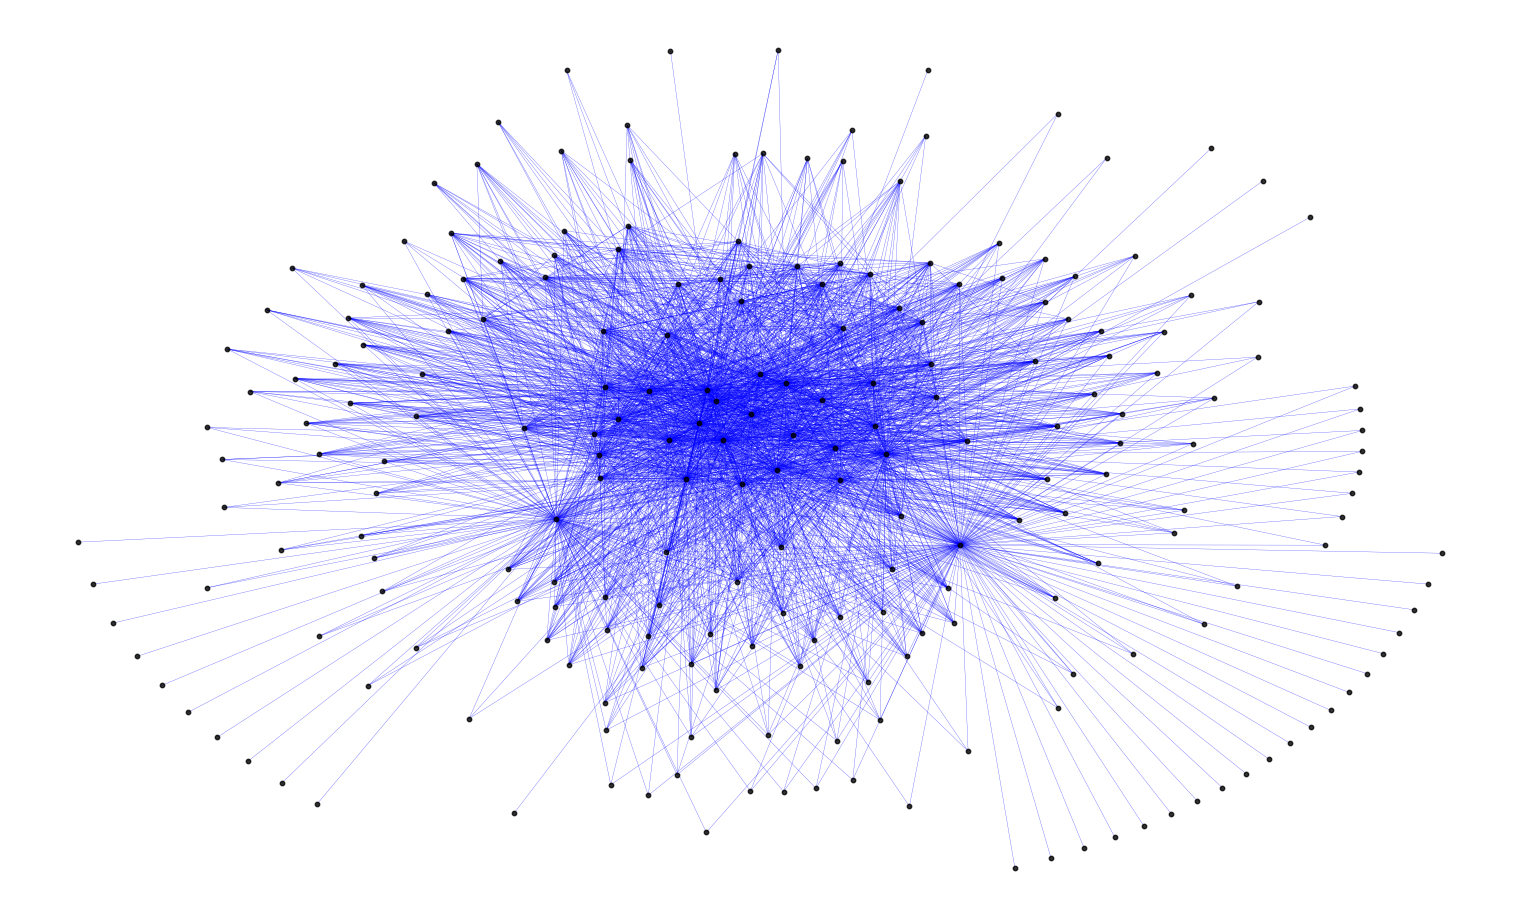

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'black', node_size = 10, 
        with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='blue')
fig.set_facecolor('#ffffff')

#plt.legend()
#plt.show()

plt.savefig("news_network_6.pdf")

In [73]:
################ Analyse ###############

# Calculation of the different coefficients of centrality and storage in a dataframe of independent nodes

# We will create an output dataframe with the nodes and their attributes to store the results of the analysis

# Degree of each node
for i in sorted(G.nodes()):
    G.nodes[i]['Degree'] = G.degree(i)


#extraction of network nodes in a dataframe
nodes_data = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
print(nodes_data.head)
nodes_data = nodes_data.sort_index(axis=1,ascending= False)
nodes_data.index.names=['ID']
nodes_data.reset_index(level=0, inplace=True)


# Betweenness centrality 
bet_cen = nx.betweenness_centrality(G)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen.columns = ['betweenness_centrality']
df_bet_cen.index.names = ['ID']
df_bet_cen.reset_index(level=0, inplace=True)
analyse= pd.merge(nodes_data,df_bet_cen, on = ['ID'])

# Clustering coefficient 
clust_coefficients = nx.clustering(G)
df_clust = pd.DataFrame.from_dict(clust_coefficients, orient='index')
df_clust.columns = ['clust_coefficient']
df_clust.index.names = ['ID']
df_clust.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clust, on = ['ID'])

# Closeness centrality 
clo_cen = nx.closeness_centrality(G)
df_clo = pd.DataFrame.from_dict(clo_cen, orient='index')
df_clo.columns = ['closeness_centrality']
df_clo.index.names = ['ID']
df_clo.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clo, on = ['ID'])

# Eigenvector centrality
#eig_cen = nx.eigenvector_centrality(G)
#eig_cen = nx.katz_centrality(G)
eig_cen = nx.eigenvector_centrality_numpy(G)
df_eig = pd.DataFrame.from_dict(eig_cen, orient='index')
df_eig.columns = ['eigenvector_centrality']
df_eig.index.names = ['ID']
df_eig.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_eig, on = ['ID'])


print(analyse)

<bound method NDFrame.head of              Degree
people          136
coronavirus     118
city             22
new             126
he              137
...             ...
finance           1
control           1
loss              1
turn              1
kong              1

[228 rows x 1 columns]>
              ID  Degree  betweenness_centrality  clust_coefficient  \
0         people     136                0.062991           0.208932   
1    coronavirus     118                0.023698           0.283935   
2           city      22                0.000038           0.943723   
3            new     126                0.036232           0.257016   
4             he     137                0.077746           0.204165   
..           ...     ...                     ...                ...   
223      finance       1                0.000000           0.000000   
224      control       1                0.000000           0.000000   
225         loss       1                0.000000           0.00000

In [74]:
analyse.to_csv("centralities.csv")

In [83]:
import powerlaw

deg = dict(nx.degree(G))
deg = list(deg.values())

fit = powerlaw.Fit(deg, discrete=True)

#If the likelihood (first value) is positive, then the first distribution is more likely. 
#If it is negative, the second distribution fits the data better. 
#The p-value (second value) tests whether the sign of the likelihood is significant.

#fit.distribution_compare('power_law', 'lognormal')#(-2.974100435315055, 0.2938919803163894)
#fit.distribution_compare('power_law', 'exponential')#(0.2516555935334268, 0.6258724344365261)
#fit.distribution_compare('power_law', 'lognormal_positive')#(0.03044685223625665, 0.7856856910974881)
fit.distribution_compare('power_law', 'stretched_exponential')#(0.03157608427197811, 0.8144349361053489)

Calculating best minimal value for power law fit


(0.03157608427197811, 0.8144349361053489)

In [84]:
nx.degree_assortativity_coefficient(G)

-0.6042420476340522

In [86]:
nx.sigma(G, niter=10, nrand=5)

0.9963313723766465

In [87]:
nx.omega(G, niter=10, nrand=5)

0.03668354348543623

In [ ]:
#A graph is commonly classified as small-world if sigma>1.
#Values close to 0 means the G features small-world characteristics. 
#Values close to -1 means G has a lattice shape whereas values close to 1 means G is a random graph.

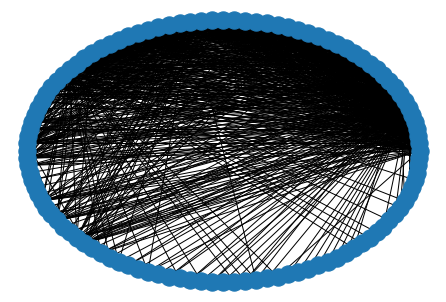

In [101]:
nx.draw_circular(G)

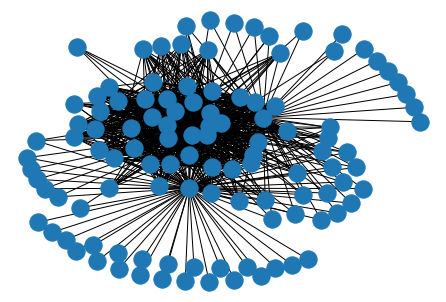

In [98]:
nx.draw_kamada_kawai(G)

In [13]:
import os

def writeDotFile(tuples_data_list, filename_graph, color_):

    fo = open(filename_graph, 'w')
    fo.write('graph G {\nnode [shape=ellipse, color='+ color_ + ', fontsize = 18];\n')
    fo.write('edge [color=blue, fontsize=18 ];\n')

    # loop through all the selected node pair data in tuples list
    for tup_ in tuples_data_list:
        node1 = tup_[0].replace("'", '_')
        node2 = tup_[1].replace("'", '_')
        weight = tup_[2]['pmi']
        # now let's add these nodes and their edge to the dot file
        fo.write(node1 + ' -- ' + node2 + ' [label=' + str(weight)[:5] + '];\n')

    fo.write('}')
    fo.close()
    
elarge=[(u,v,d) for (u,v,d) in G.edges(data=True) if d['pmi'] >=0.72]
#print(elarge)
filename_graph = 'network_weight_thresh_72.dot'
writeDotFile(elarge, filename_graph, 'black')

filename_fig = 'network_weight_thresh_72.png'
os.system(str('dot -Tpng ' + filename_graph + ' -o ' + filename_fig))

0